# Εγκατάσταση και ενημέρωση βιβλιοθηκών

In [ ]:
!pip install --upgrade pip #upgrade pip package installer
!pip install scikit-learn --upgrade #upgrade scikit-learn package
!pip install numpy --upgrade #upgrade numpy package
!pip install pandas --upgrade #--upgrade #upgrade pandas package
!pip install --upgrade imbalanced-learn

# Στοιχεία ομάδας

**Αριθμός ομάδας**: 22

**Πρώτο μέλος**:  
Ονοματεπώνυμο: Ψαρουδάκης Ανδρέας <br>
Αριθμός μητρώου: 03116001 <br>
Email:  andreaspsaroudakis@gmail.com <br>

**Δεύτερο μέλος**: <br>
Ονοματεπώνυμο: Τζε Χριστίνα-Ουρανία <br>
Αριθμός μητρώου: 03116079 <br>
Email: xristina.rania.tze@gmail.com

# Βασικές Πληροφορίες


## 1) Σύντομη παρουσίαση του dataset

Το μεγάλο dataset που αντιστοιχεί στην ομάδα μας είναι το [
EEG Eye State Data Set](http://archive.ics.uci.edu/ml/datasets/EEG+Eye+State) (B02). Περιέχει μετρήσεις που προέκυψαν από ένα ηλεκτροεγκεφαλογράφημα (EEG) που πραγματοποιήθηκε με χρήση ενός [Emotiv EEG Neuroheadset](https://www.emotiv.com/) σε έναν και μόνο άνθρωπο για διάρκεια 117 δευτερολέπτων, καθώς εκείνος άνοιγε και έκλεινε τα μάτια του. Η κατάσταση των ματιών του ανθρώπου (ανοιχτά ή κλειστά) ανιχνεύθηκε με μια βιντεοκάμερα, η οποία τον κατέγραφε για το χρονικό αυτό διάστημα, και προστέθηκε εκ των υστέρων χειροκίνητα στο αρχείο, μετά από ανάλυση των καρέ του βίντεο. To dataset αποτελείται συνολικά από 14.980 δείγματα, τα οποία κατηγοριοποιούνται σε 2 κλάσεις. Μεταξύ αυτών, τα 8.257 ανήκουν στην κατηγορία "0" ενώ τα υπόλοιπα 6.723 στην κατηγορία "1". Τα δείγματα με ετικέτα "0" αντιστοιχούν στην κατάσταση του ανθρώπου με ανοιχτά μάτια, σε αντίθεση με τα αυτά που έχουν ετικέτα "1" και αντιστοιχούν σε κατάσταση με κλειστά μάτια. Πρόκειται επομένως, για ένα **binary classification** πρόβλημα. Κάθε δείγμα αποτελείται από 14 χαρακτηριστικά, τα οποία αντιστοιχούν στις μετρήσεις 14 ηλεκτροδίων, καθώς και από την ετικέτα κλάσης. Τα ηλεκτρόδια που χρησιμοποιήθηκαν στο [Emotiv EEG Neuroheadset](https://www.emotiv.com/) για την καταγραφή των σημάτων του εγκεφάλου φαίνονται στην παρακάτω εικόνα:

<center>
<img src="https://i.ibb.co/mc1mgsG/eeg.png" alt="eeg" border="0"  height="350" width="350">
</center>

Όλες οι τιμές βρίσκονται αποθηκευμένες στο dataset με χρονολογική σειρά, με τη μέτρηση που λήφθηκε πρώτη να βρίσκεται στην κορυφή των δεδομένων.

### Μετατροπή αρχείου από .arff σε .csv

Μετατρέπουμε το αρχικό τύπου **.arff** αρχείο σε **.csv**, ακολουθώντας τη διαδικασία που προτείνεται στο [FAQ](https://docs.google.com/document/d/1hou1gWXQuHAB7J2aV44xm_CtAWJ63q6Cu1V6OwyL_n0/edit#heading=h.j7cfwshmi5na) για περιβάλλον windows. Έτσι, δημιουργούμε το αρχέιο **EEG Eye State.csv**

### Διαγραφή outliers 

Υπάρχουν ορισμένες μετρήσεις που προέκυψαν από το εγκεφαλογράφημα και οι οποίες είναι πολύ μεγαλύτερες από τις αναμενόμενες τιμές. Αυτές μπορούν να γίνουν εύκολα αντιληπτές αν απεικονίσουμε τα διαγράμματα τιμών όλων των χαρακτηριστικών. 




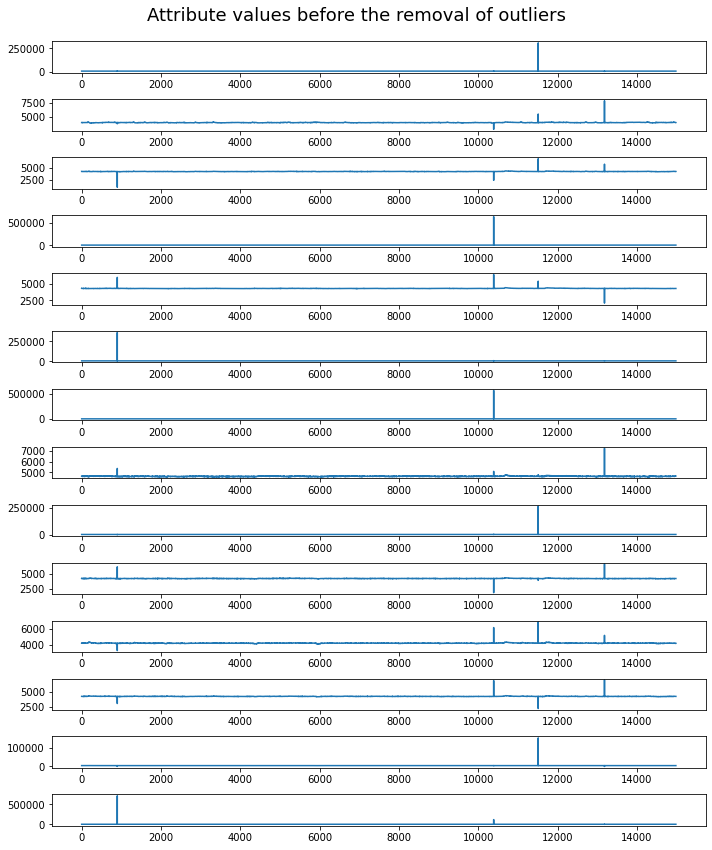

In [ ]:
from pandas import read_csv
import matplotlib.pyplot as plt

# load the dataset
data = read_csv('EEG Eye State.csv', header=None)
# retrieve data as numpy array
values = data.values

fig, axs = plt.subplots(14,figsize=(10,12))
fig.suptitle('Attribute values before the removal of outliers',fontsize=18)
for i in range(values.shape[1]-1):
    axs[i].plot(values[:, i])
fig.tight_layout()
fig.subplots_adjust(top=0.94)
plt.show()

Παρατηρούμε πως σε όλα τα attributes υπάρχουν ορισμένες έκτοπες τιμές (outliers), οι οποίες δεν αποτελούν αντιπροσωπευτικές μετρήσεις για τα δεδομένα μας και συνεπώς μπορούμε να τις διαγράψουμε. Δημιουργούμε λοιπόν ένα νέο csv αρχείο, το **EEG Eye State without outliers.csv**, το οποίο προκύπτει από το αρχικό αρχείο **EEG Eye State.csv** μετά από διαγραφή των γραμμών που περιέχουν outliers. Μια τιμή ενός χαρακτηριστικού θεωρούμε ότι αποτελεί outlier όταν αυτή απέχει από την μέση τιμή του χαρακτηριστικού αυτού τουλάχιστον το τετραπλάσιο της τυπικής απόκλισής του. Ο κώδικας που χρησιμοποιείται για την υλοποίηση της διαδικασίας αυτής λαμβάνεται από [εδώ](https://machinelearningmastery.com/how-to-predict-whether-eyes-are-open-or-closed-using-brain-waves/).

In [ ]:
# remove outliers from the EEG data
import pandas as pd    
from pandas import read_csv
from numpy import mean
from numpy import std
from numpy import delete
from numpy import savetxt

# load the dataset.
data = read_csv('EEG Eye State.csv', header=None)
values = data.values
# step over each EEG column
for i in range(values.shape[1] - 1):
	# calculate column mean and standard deviation
	data_mean, data_std = mean(values[:,i]), std(values[:,i])
	# define outlier bounds
	cut_off = data_std * 4
	lower, upper = data_mean - cut_off, data_mean + cut_off
	# remove too small
	too_small = [j for j in range(values.shape[0]) if values[j,i] < lower]
	values = delete(values, too_small, 0)
	print('>deleted %d rows' % len(too_small))
	# remove too large
	too_large = [j for j in range(values.shape[0]) if values[j,i] > upper]
	values = delete(values, too_large, 0)
	print('>deleted %d rows' % len(too_large))
# save the results to a new file
savetxt('EEG Eye State without outliers.csv', values, delimiter=',')

>deleted 0 rows
>deleted 1 rows
>deleted 2 rows
>deleted 1 rows
>deleted 0 rows
>deleted 142 rows
>deleted 0 rows
>deleted 48 rows
>deleted 0 rows
>deleted 153 rows
>deleted 0 rows
>deleted 43 rows
>deleted 0 rows
>deleted 0 rows
>deleted 0 rows
>deleted 15 rows
>deleted 0 rows
>deleted 5 rows
>deleted 10 rows
>deleted 0 rows
>deleted 21 rows
>deleted 53 rows
>deleted 0 rows
>deleted 12 rows
>deleted 58 rows
>deleted 53 rows
>deleted 0 rows
>deleted 59 rows


Διαβάζουμε τώρα το νέο αρχείο (χωρίς τα outliers) με το οποίο και θα δουλέψουμε.

In [ ]:
df = pd.read_csv("EEG Eye State without outliers.csv", header=None)   # Read dataset from file                                                              
df = df.astype({14: int})
df                                                                    # Show dataset

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,0
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,0
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,0
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,0
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14299,4281.03,3990.26,4245.64,4116.92,4333.85,4614.36,4074.87,4625.64,4203.08,4221.54,4171.28,4269.23,4593.33,4340.51,1
14300,4276.92,3991.79,4245.13,4110.77,4332.82,4615.38,4073.33,4621.54,4194.36,4217.44,4162.56,4259.49,4590.26,4333.33,1
14301,4277.44,3990.77,4246.67,4113.85,4333.33,4615.38,4072.82,4623.59,4193.33,4212.82,4160.51,4257.95,4591.79,4339.49,1
14302,4284.62,3991.79,4251.28,4122.05,4334.36,4616.41,4080.51,4628.72,4200.00,4220.00,4165.64,4267.18,4596.41,4350.77,1


Απεικονίζουμε και πάλι τις τιμές των attributes.

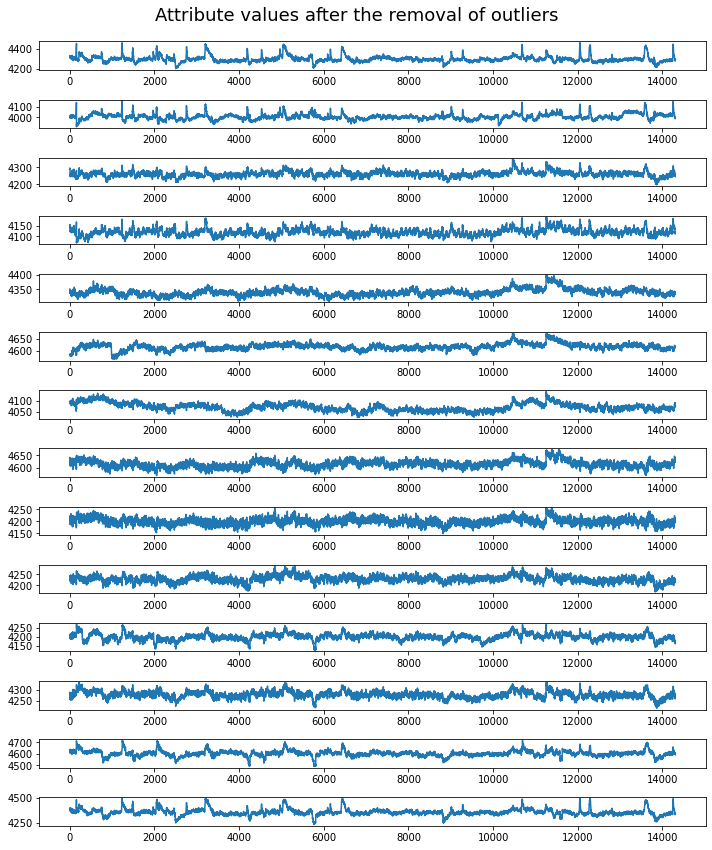

In [ ]:
fig, axs = plt.subplots(14,figsize=(10,12))
fig.suptitle('Attribute values after the removal of outliers',fontsize=18)
for i in range(df.values.shape[1]-1):
    axs[i].plot(df.values[:, i])
fig.tight_layout()
fig.subplots_adjust(top=0.94)
plt.show()

 Bλέπουμε ότι τώρα οι τιμές όλων των χαρακτηριστικών έχουν μικρό variance και επομένως κυμαίνονται σε φυσιολογικά επίπεδα.

## 2) Αριθμός δειγμάτων και χαρακτηριστικών, είδος χαρακτηριστικών

Αρχικά, βρίσκουμε το πλήθος των δειγμάτων του dataset ως το σύνολο των γραμμών του df που περιέχει όλα τα samples. Υπολογίζουμε επίσης το πλήθος των χαρακτηριστικών κάθε δείγματος, το οποίο ισούται με τον αριθμό των στηλών του df μειωμένο κατά 1 (καθώς η τελευταία στήλη αντιπροσωπεύει την ετικέτα κάθε δείγματος).

In [ ]:
print("\033[1mNumber of samples is: {}".format(df.shape[0]))
print("Number of features per sample is: {}\n".format(df.shape[1]-1))

Number of samples is: 14304
Number of features per sample is: 14



Στη συνέχεια τυπώνουμε τον τύπο και των 14 features κάθε δείγματος.

In [ ]:
print("\033[1mFeature Types\n")
print(df.iloc[:,:14].dtypes)

Feature Types

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
dtype: object


Παρατηρούμε ότι όλα τα χαρακτηριστικά του dataset είναι αριθμητικά (τύπου **float64**) καθώς αφορούν μετρήσεις που λήφθηκαν από τα 14 ηλεκτρόδια που χρησιμοποιήθηκαν στο εγκεφαλογράφημα. Τα χαρακτηριστικά αυτά είναι προφανώς **διατεταγμένα**.

## 3) Επικεφαλίδες και αρίθμηση γραμμών

Ανοίγοντας το αρχείο δεδομένων μας σε έναν text editor, παρατηρούμε πως αυτό δεν διαθέτει επικεφαλίδες, καθώς η πρώτη γραμμή του δεν περιέχει ονόματα για τα χαρακτηριστικά των δειγμάτων αλλά το πρώτο δείγμα του dataset. Για το λόγο αυτό, κατά το διάβασμα του αρχείου, μέσω της συνάρτησης **read_csv** θέτουμε το **header** σε **None**. 

```python
df = pd.read_csv("EEG Eye State without outliers.csv", header=None)   # Read dataset from file 
```

Αυτό είναι αναγκαίο ώστε το πρώτο δείγμα του αρχείο να μην διαβαστεί ως επικεφαλίδα. Επίσης, το αρχείο δεν διαθέτει αρίθμηση γραμμών, ωστόσο αυτή προκύπτει άμεσα από τη μετατροπή του συνόλου δεδομένων σε dataframe της βιβλιοθήκης pandas.

## 4) Ετικέτες κλάσεων

Σύμφωνα με το documentation, οι ετικέτες των κλάσεων βρίσκονται στην τελευταία κολόνα (κολόνα 14, δηλαδή στην 15η κολόνα αφού η αρίθμηση ξεκινάει από το 0) του dataframe και λαμβάνουν τιμές **"0"** και **"1"** ανάλογα με το αν ο άνθρωπος έχει τα μάτια του ανοιχτά ή κλειστά αντίστοιχα.

## 5) Προεπεξεργασία δεδομένων

Αρχικά, όπως είδαμε και στο πρώτο βήμα, μετατρέπουμε το αρχικό τύπου **.arff** αρχείο σε **.csv**, ακολουθώντας τη διαδικασία που προτείνεται στο [FAQ](https://docs.google.com/document/d/1hou1gWXQuHAB7J2aV44xm_CtAWJ63q6Cu1V6OwyL_n0/edit#heading=h.j7cfwshmi5na) για περιβάλλον windows. Στη συνέχεια, εφαρμόζουμε μια προεπεξεργασία των δεδομένων, έτσι ώστε να δημιουργήσουμε ένα νέο csv αρχείο που δεν περιέχει outliers. Η διαδικασία αυτή παρουσιάστηκε επίσης στο πρώτο βήμα και πραγματοποιήθηκε με χρήση του ακόλουθου κώδικα:

```python
# remove outliers from the EEG data
from pandas import read_csv
from numpy import mean
from numpy import std
from numpy import delete
from numpy import savetxt
# load the dataset.
data = read_csv('EEG Eye State.csv', header=None)
values = data.values
# step over each EEG column
for i in range(values.shape[1] - 1):
	# calculate column mean and standard deviation
	data_mean, data_std = mean(values[:,i]), std(values[:,i])
	# define outlier bounds
	cut_off = data_std * 4
	lower, upper = data_mean - cut_off, data_mean + cut_off
	# remove too small
	too_small = [j for j in range(values.shape[0]) if values[j,i] < lower]
	values = delete(values, too_small, 0)
	print('>deleted %d rows' % len(too_small))
	# remove too large
	too_large = [j for j in range(values.shape[0]) if values[j,i] > upper]
	values = delete(values, too_large, 0)
	print('>deleted %d rows' % len(too_large))
# save the results to a new file
savetxt('EEG Eye State without outliers.csv', values, delimiter=',')
```

## 6) Απουσιάζουσες τιμές

Στο σύνολο δεδομένων μας δεν υπάρχουν απουσιάζουσες τιμές χαρακτηριστικών. Για να το επιβεβαιώσουμε αυτό,με χρήση της συνάρτησης **DataFrame.isna** και της **DataFrame.any**, βρίσκουμε τις γραμμές εκείνες στις οποίες εμφανίζεται μια τουλάχιστον απουσιάζουσα τιμή (NaN) και έπειτα υπολογίζουμε το πλήθος τους (με χρήση της **sum**). Τέλος, διαιρούμε το πλήθος αυτό με τον συνολικό αριθμό γραμμών του df έτσι ώστε να λάβουμε το ποσοστό των δειγμάτων με missing values επί του συνόλου.

In [ ]:
rows_with_NaN = df.isna().any(axis=1).sum()    # Calculate number of rows with at least one 'NaN' value
print("\033[1mNumber of samples with at least one \'NaN\' feature value is {} out of {} ".format(rows_with_NaN,df.shape[0]))
print("Percentage of samples with at least one \'NaN\' features is: {} %".format((rows_with_NaN/df.shape[0])*100))

Number of samples with at least one 'NaN' feature value is 0 out of 14304 
Percentage of samples with at least one 'NaN' features is: 0.0 %


Παρατηρούμε πως πράγματι δεν έχουμε καθόλου απουσιάζουσες τιμές στο dataset. 

## 7) Αριθμός κλάσεων και ποσοστά δειγμάτων επί του συνόλου

Υπολογίζουμε τώρα τον αριθμό των κλάσεων με χρήση της συνάρτησης **unique**, μετρώντας το πλήθος των διαφορετικών τιμών που εμφανίζονται στην κολόνα 14 (δηλαδή στη στήλη με τις ετικέτες των κλάσεων). 

In [ ]:
classes = len(pd.unique(df[14]))
print("\033[1mNumber of classes is {}".format(classes))

Number of classes is 2


Παρατηρούμε πως, όπως ήταν αναμενόμενο, προκύπτουν συνολικά 2 κλάσεις, η **"0"** και η **"1"**. Aξιοποιούμε τη συνάρτηση **value_counts** ώστε να υπολογίσουμε το πλήθος των δειγμάτων κάθε κατηγορίας. Έπειτα, διαιρούμε κάθε πλήθος με το συνολικό αριθμό από samples, οπότε και λαμβάνουμε το ποσοστό δειγμάτων κάθε κλάσης.

In [ ]:
percentages = []
for val, cnt in df[14].value_counts().iteritems():
    print ('\033[1m','Class \'{}\''.format(val), 'has a total of', cnt, 'samples','(Percentage: {} %)'.format((cnt/df.shape[0])*100))
    percentages.append(cnt)

 Class '0' has a total of 7855 samples (Percentage: 54.91470917225951 %)
 Class '1' has a total of 6449 samples (Percentage: 45.085290827740494 %)


Τέλος, παίρνουμε το λόγο των δύο ποσοστών που προκύπτουν ώστε να εξετάσουμε κατά πόσο το dataset μας είναι ισορροπημένο ή όχι.

In [ ]:
print("\n\033[1m The ratio of number of samples between the two classes is: {}".format(max(percentages)/min(percentages)))


 The ratio of number of samples between the two classes is: 1.2180182974104512


Παρατηρούμε πως το dataset είναι **ισορροπημένο** καθώς ο λόγος του αριθμού δειγμάτων της πολυπληθέστερης κλάσης (**"0"**) προς τον αριθμό δειγμάτων της άλλης κλάσης (**"1"**) είναι μικρότερος του 1,5.  Αυτό σημαίνει πως καμία εκ των δύο κλάσεων δεν είναι τουλάχιστον 1,5 φορά πιο συχνή από την άλλη (60% - 40%). Κατά συνέπεια, δεν απαιτείται η εφαρμογή κάποιας διαδικασίας εξισορρόπησης του dataset (π.χ. oversampling).

## 8) Διαχωρισμός σε train και test set, διαχείριση απουσιάζουσων τιμών και μη διατεταγμένων χαρακτηριστικών

Χωρίζουμε το αρχικό dataframe (που περιέχει όλο το dataset) σε δύο επιμέρους, ένα που περιέχει τα features των δειγμάτων και ονομάζεται **features_df** (πρώτες 14 κολόνες) και ένα που περιέχει τις ετικέτες των κλάσεων και ονομάζεται **labels_df** (15η κολόνα).

In [ ]:
features_df = df.iloc[:, 0:14]
labels_df = df.iloc[:, [14]]

Δίνουμε τώρα τα 2 νέα dataframes ως όρισμα στη συνάρτηση **train_test_split** της βιβλιοθήκης sklearn, για το χωρισμό σε train και test set. Χρησιμοποιούμε **30%** των δειγμάτων για **test set** και **70%** για **train set**.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_df, labels_df, test_size=0.30)

Τέλος, εφαρμόζουμε τη μέθοδο **values** στα dataframes **X_train**,  **X_test**,  **y_train** και **y_test** για τη μετατροπή τους σε numpy πίνακες.

In [ ]:
X_train, X_test = X_train.values, X_test.values
y_train, y_test = y_train.values.flatten(), y_test.values.flatten()

Eπαληθεύμε ότι όλοι οι πίνακες έχουν τις επιθυμητές διαστάσεις.

In [ ]:
print("\033[1m X_train shape is: {}".format(X_train.shape))
print("\033[1m X_test shape is: {}".format(X_test.shape))
print("\033[1m y_train shape is: {}".format(y_train.shape))
print("\033[1m y_test shape is: {}".format(y_test.shape))

 X_train shape is: (10012, 14)
 X_test shape is: (4292, 14)
 y_train shape is: (10012,)
 y_test shape is: (4292,)


# Ταξινόμηση


Στο σημείο αυτό εξετάζουμε τους ταξινομητές **Dummy**, **Gaussian Naive Bayes**, **kNN**, **Multi-Layer Perceptron (MLP)** και **Support Vector Machines (SVM)**. Συγκεκριμένα, τους αρχικοποιούμε με τις default τιμές τους και τους εκπαιδεύουμε στο train dataset. Στη συνέχεια, κάνουμε την εκτίμηση στο test set και για κάθε έναν από αυτούς τυπώνουμε τα εξής: **confusion matrix**, **f1-micro average** και **f1-macro average**.

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
import itertools

### Υλοποίηση συνάρτησης απεικόνισης Πίνακα Σύγχυσης (Confusion Matrix)

Η βάση για τις μετρικές απόδοσης των ταξινομητών είναι ο πίνακας σύγχυσης $C$ (confusion matrix). Κάθε στοιχείο του $C_{i, j}$ είναι ίσο με τα δείγματα που ενώ ανήκουν στην κατηγορία $i$ ταξινομήθηκαν στην κατηγορία $j$. Για την απεικόνισή του ορίζουμε την συνάρτηση **custom_plot_confusion_matrix**. Για την κλήση της συνάρτησης, απαιτείται προηγουμένως η αξιοποίηση της **confusion_matrix** της sklearn για τον υπολογισμό του πίνακα σύγχυσης, ο οποίος δίνεται σαν πρώτο όρισμα στην **custom_plot_confusion_matrix**.

In [ ]:
def custom_plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=12)
    plt.yticks(tick_marks, classes,fontsize=12)

    fmt = 'd'
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="black")

    plt.ylabel('True label',fontsize=12)
    plt.xlabel('Predicted label',fontsize=12)
    plt.tight_layout()  
    plt.show()

Άλλες μετρικές που χρησιμοποιούνται συχνά για την αξιολόγηση των ταξινομητών είναι η ακρίβεια P (Precision), η ανάκληση R (Recall) και το F1 score. Αυτές ορίζονται ως εξής:



* Precision: είναι ο λόγος των true positives ($T_p$) ως προς τον αριθμό των true positives συν τον αριθμό των false positives ($F_p$). 

$$P = \frac{T_p}{T_p+F_p}$$

* Recall: είναι ο λόγος των true positives ($T_p$) ως προς τον αριθμό των true positives συν τον αριθμό των false negatives ($F_n$). 

$$R = \frac{T_p}{T_p + F_n}$$

* F1: είναι ο αρμονικός μέσος της ακρίβειας και της ανάκλησης. 

$$F1 = 2\frac{P \times R}{P+R}$$

Προτού ορίσουμε τα μοντέλα μας, αρχικοποιούμε τρία λεξικά, τα **accuracies**, **f1_micros** και **f1_macros**, τα οποία έχουν για κλειδιά τα ονόματα των ταξινομητών που μελετάμε και για τιμές την ακρίβεια, τη μετρική f1-micro average και την μετρική f1-macro average αντίστοιχα.

In [ ]:
# Ignore filter warnings 

from warnings import filterwarnings
filterwarnings('ignore')

# Initialize dictionaries 

accuracies = {}
f1_micros = {}
f1_macros = {}

## 1) **Dummy Classifier**

Η κλάση **DummyClassifier** δέχεται μια παράμετρο που καθορίζει την τακτική της ταξινόμησης ως εξής:


* **“uniform”**: προβλέπει τυχαία και ομοιόμορφα.

* **“constant”**: προβλέπει πάντα μία κατηγορία που τη διαλέγει ο χρήστης.

* **“most_frequent”**: προβλέπει πάντα την πιο συχνή κατηγορία στο training set.

* **“stratified”**: κάνει προβλέψεις διατηρώντας την κατανομή των κλάσεων στο training set.

### i) Uniform

Αρχικά, ορίζουμε το μοντέλο ταξινόμησης θέτοντας **uniform** την παράμετρο strategy. Με τη μέθοδο **fit** εκπαιδεύουμε τον ταξινομητή στο σύνολο εκπαίδευσης ενώ με την **predict** παράγουμε τις προβλέψεις για τα δεδομένα ελέγχου. Για τον υπολογισμό του accuracy χρησιμοποιούμε την μέθοδο **score** του αντικειμένου dummy classifier. Mέσω της συνάρτησης **precision_recall_fscore_support** και θέτοντας την παράμετρο **average** σε **'micro'** ή **'macro'** βρίσκουμε αντίστοιχα τα ζητούμενα f1-micro και f1-macro ως το τρίτο στοιχείο (βρίσκεται στη θέση 2 αφού η αρίθμηση ξεκινάει από το μηδέν) από την επιστρεφόμενη τούπλα (precision, recall, fscore, support). Στο τέλος, για μια πιο ωραία και συνοπτική παρουσίαση των αποτελεσμάτων χρησιμοποιούμε την **classification_report** η οποία τυπώνει τα παραπάνω πρώτα για κάθε κλάση και μετά με μέσους όρους. Ακριβώς η ίδια διαδικασία επαναλαμβάνεται και για τους υπόλοιπους dummy ταξινομητές αφού πρώτα θέσουμε κατάλληλα την παράμετρο strategy.

In [ ]:
dc_uniform = DummyClassifier(strategy="uniform")
dc_uniform.fit(X_train, y_train)
predictions = dc_uniform.predict(X_test)
accuracies['uniform (random)'] = dc_uniform.score(X_test, y_test)
f1_micros['uniform (random)'] = precision_recall_fscore_support(y_test, predictions, average='micro')[2]
f1_macros['uniform (random)'] = precision_recall_fscore_support(y_test, predictions, average='macro')[2]
print("F1-micro average score is: \033[1m{} %\033[0m".format(f1_micros['uniform (random)']*100))
print("F1-macro average score is: \033[1m{} %\033[0m".format(f1_macros['uniform (random)']*100))

F1-micro average score is: 50.09319664492078 %
F1-macro average score is: 50.003295602491605 %


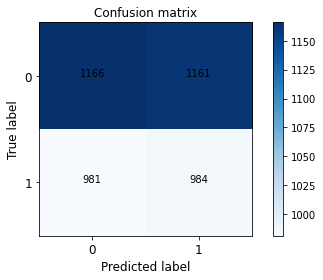

In [ ]:
cnf_matrix = confusion_matrix(y_test, predictions)
custom_plot_confusion_matrix(cnf_matrix, [0,1])

In [ ]:
print(classification_report(y_test, predictions, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.54      0.50      0.52      2327
           1       0.46      0.50      0.48      1965

    accuracy                           0.50      4292
   macro avg       0.50      0.50      0.50      4292
weighted avg       0.50      0.50      0.50      4292



Για τον συγκεκριμένο ταξινομητή δεν έχει ιδιαίτερο νόημα ο σχολιασμός των αποτελεσμάτων αφού η πρόβλεψη πραγματοποιείται τυχαία και ομοιόμορφα και επομένως σε κάθε τρέξιμο του κώδικα λαμβάνουμε διαφορετικές τιμές.

### ii) Constant 0

In [ ]:
dc_constant_0 = DummyClassifier(strategy="constant", constant=0)
dc_constant_0.fit(X_train, y_train)
predictions = dc_constant_0.predict(X_test)
accuracies['Constant 0'] = dc_constant_0.score(X_test, y_test)
f1_micros['Constant 0']=precision_recall_fscore_support(y_test, predictions, average='micro')[2]
f1_macros['Constant 0']=precision_recall_fscore_support(y_test, predictions, average='macro')[2]
print("F1-micro average score is: \033[1m{} %\033[0m".format(f1_micros['Constant 0']*100))
print("F1-macro average score is: \033[1m{} %\033[0m".format(f1_macros['Constant 0']*100))

F1-micro average score is: 54.21714818266542 %
F1-macro average score is: 35.156368031424684 %


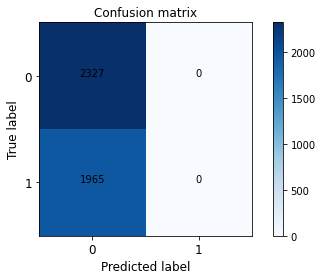

In [ ]:
cnf_matrix = confusion_matrix(y_test, predictions)
custom_plot_confusion_matrix(cnf_matrix, [0,1])

In [ ]:
print(classification_report(y_test, predictions, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.54      1.00      0.70      2327
           1       0.00      0.00      0.00      1965

    accuracy                           0.54      4292
   macro avg       0.27      0.50      0.35      4292
weighted avg       0.29      0.54      0.38      4292



Στους constant classifiers ισχύει ότι για το label που ταυτίζεται με την constant σταθερά (εδώ το '0') το recall είναι 1.00 . Επιπλέον, το precision είναι πάντα ίσο με τo ποσοστό των δειγμάτων του test set που ανήκουν στην συγκεκριμένη κατηγορία (εδώ το '0', δηλαδή την κατηγορία "+").

### iii) Constant 1

In [ ]:
dc_constant_1 = DummyClassifier(strategy="constant", constant=1)
dc_constant_1.fit(X_train, y_train)
predictions = dc_constant_1.predict(X_test)
accuracies['Constant 1'] = dc_constant_1.score(X_test, y_test)
f1_micros['Constant 1']=precision_recall_fscore_support(y_test, predictions, average='micro')[2]
f1_macros['Constant 1']=precision_recall_fscore_support(y_test, predictions, average='macro')[2]
print("F1-micro average score is: \033[1m{} %\033[0m".format(f1_micros['Constant 1']*100))
print("F1-macro average score is: \033[1m{} %\033[0m".format(f1_macros['Constant 1']*100))

F1-micro average score is: 45.782851817334574 %
F1-macro average score is: 31.40482659421448 %


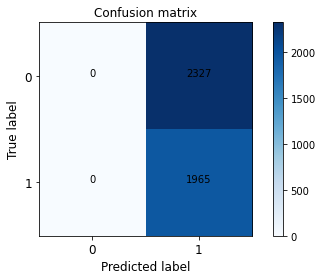

In [ ]:
cnf_matrix = confusion_matrix(y_test, predictions)
custom_plot_confusion_matrix(cnf_matrix, [0,1])

In [ ]:
print(classification_report(y_test, predictions, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2327
           1       0.46      1.00      0.63      1965

    accuracy                           0.46      4292
   macro avg       0.23      0.50      0.31      4292
weighted avg       0.21      0.46      0.29      4292



Ισχύουν τα ίδια με τον Constant 0 με την διαφορά ότι έχει αντιστραφεί ο ρόλος των labels. Πράγματι, εδώ για την κατηγορία 1 ("-") το recall είναι ίσο με 1.00 ενώ για την 0 ("+") είναι 0.00. 

### iv) Most frequent

In [ ]:
dc_most_frequent = DummyClassifier(strategy="most_frequent")
dc_most_frequent.fit(X_train, y_train)
predictions = dc_most_frequent.predict(X_test)
accuracies['Most frequent label'] = dc_most_frequent.score(X_test, y_test)
f1_micros['Most frequent label']=precision_recall_fscore_support(y_test, predictions, average='micro')[2]
f1_macros['Most frequent label']=precision_recall_fscore_support(y_test, predictions, average='macro')[2]
print("F1-micro average score is: \033[1m{} %\033[0m".format(f1_micros['Most frequent label']*100))
print("F1-macro average score is: \033[1m{} %\033[0m".format(f1_macros['Most frequent label']*100))

F1-micro average score is: 54.21714818266542 %
F1-macro average score is: 35.156368031424684 %


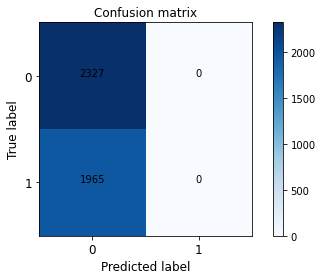

In [ ]:
cnf_matrix = confusion_matrix(y_test, predictions)
custom_plot_confusion_matrix(cnf_matrix, [0,1])

In [ ]:
print(classification_report(y_test, predictions, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.54      1.00      0.70      2327
           1       0.00      0.00      0.00      1965

    accuracy                           0.54      4292
   macro avg       0.27      0.50      0.35      4292
weighted avg       0.29      0.54      0.38      4292



Ο Most Frequent Dummy Classifier ταξινομεί τα δείγματα στην πιο συχνή κατηγορία στο training set. Αν αυτή είναι η '0' τότε ο Most Frequent ταξινομητής συμπίπτει με τον Constant 0, διαφορετικά με τον Constant 1. Παρατηρούμε εδώ ότι για το συγκεκριμένο dataset ο Most Frequent ταξινομητής συμπίπτει με τον Constant 0, γεγονός το οποίο δικαιολογείται καθώς η κατηγορία '0' έχει περισσότερα δείγματα από την κατηγορία '1'.

### v) Stratified

In [ ]:
dc_stratified = DummyClassifier(strategy="stratified")
dc_stratified.fit(X_train, y_train)
predictions = dc_stratified.predict(X_test)
accuracies['Stratified'] = dc_stratified.score(X_test, y_test)
f1_micros['Stratified']=precision_recall_fscore_support(y_test, predictions, average='micro')[2]
f1_macros['Stratified']=precision_recall_fscore_support(y_test, predictions, average='macro')[2]
print("F1-micro average score is: \033[1m{} %\033[0m".format(f1_micros['Stratified']*100))
print("F1-macro average score is: \033[1m{} %\033[0m".format(f1_macros['Stratified']*100))

F1-micro average score is: 52.05032618825722 %
F1-macro average score is: 51.55497960062103 %


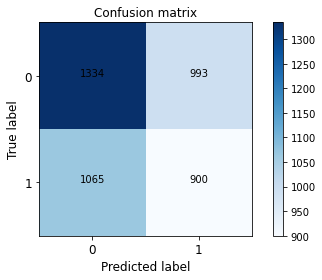

In [ ]:
cnf_matrix = confusion_matrix(y_test, predictions)
custom_plot_confusion_matrix(cnf_matrix, [0,1])

In [ ]:
print(classification_report(y_test, predictions, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.56      0.57      0.56      2327
           1       0.48      0.46      0.47      1965

    accuracy                           0.52      4292
   macro avg       0.52      0.52      0.52      4292
weighted avg       0.52      0.52      0.52      4292



Τα αποτελέσματα του recall και precision για τον stratified είναι πολύ κοντά στην ισορροπία του dataset, γεγονός αναμενόμενο αφού ο Stratified Dummy διαητρεί την κατανομή των κλάσεων στο training set (a-priori πιθανότητες).

## 2) **Gaussian Naive Bayes Classifier**

Θα μελετήσουμε τώρα τον **Gaussian Naive Bayes Classifier**. H βασική ιδέα λειτουργίας ενός μπευζιανού ταξινομητή είναι ο γνωστός νόμος του Bayes: \\

$$P(A\mid B)={\frac {P(B\mid A)\,P(A)}{P(B)}}$$


Αν επιπλέον υποθέσουμε ότι τα χαρακτηριστικά είναι όλα ανεξάρτητα μεταξύ τους τότε προκύπτει ο γνωστός μας **Naive Bayes Classifier**. 

Με δεδομένα μια μεταβλητή κατηγορίας (κλάσης) $y$ και ένα εξαρτώμενο διάνυσμα χαρακτηριστικών $x_1$ μέχρι $x_n$, σύμφωνα με το θεώρημα του Bayes θα ισχύει 

$$P(y \mid x_1, \dots, x_n) = \frac{P(y) P(x_1, \dots x_n \mid y)}{P(x_1, \dots, x_n)}$$


Ισχύει ότι $P(x_1, \dots, x_i, \dots, x_n \mid y) = \prod_{i=1}^{n} P(x_i | y, x_1, \dots, x_{i-1}, x_{i+1}, \dots, x_n)$ και κάνουμε την αφελή (naive) υπόθεση ότι το χαρακτηριστικό $x_i$ για κάθε $i$ εξαρτάται μόνο από την κλάση $y$ και όχι από οποιοδήποτε άλλο χαρακτηριστικό. Αυτό οδηγεί στην απλοποίηση

$$P(x_i | y, x_1, \dots, x_{i-1}, x_{i+1}, \dots, x_n) = P(x_i | y)$$

και επομένως

$$P(y \mid x_1, \dots, x_n) = \frac{P(y) \prod_{i=1}^{n} P(x_i \mid y)}{P(x_1, \dots, x_n)}$$

Με δεδομένη είσοδο, το $P(x_1, \dots, x_n)$ είναι σταθερό. Συνεπώς μπορούμε να χρησιμοποιήσουμε τον ακόλουθο κανόνα ταξινόμησης $$P(y \mid x_1, \dots, x_n) \propto P(y) \prod_{i=1}^{n} P(x_i \mid y)$$

$$\Downarrow$$

$$\hat{y} = \arg\max_y P(y) \prod_{i=1}^{n} P(x_i \mid y)$$

Το $P(y)$ είναι η υπόθεσή μας και ισούται με τη σχετική συχνότητα της κλάσης $y$ στο training set. To $P(x_i \mid y)$ είναι η πιθανοφάνεια δηλαδή η πιθανότητα του δείγματος με δεδομένη την υπόθεσή μας και μπορεί επίσης να υπολογιστεί απλά από το training set. Οι διάφοροι Naive Bayes classifiers διαφοροποιούνται κυρίως από τις υποθέσεις που κάνουν ως προς την κατανομή $P(x_i \mid y)$. Στην περίπτωση του **Gaussian Naive Bayes Classifier** θεωρούμε ότι τα χαρακτηριστικά $x_i$ $(i=1,2,\dots,n)$ ενός δείγματος, δεδομένης μιας κλάσης $y$, ακολουθούν μια μονοδιάστατη Γκαουσιανή κατανομή, δηλαδή θεωρούμε ότι ισχύει:
\begin{equation}
P(x_i \mid y) = \frac{1}{\sqrt{2\pi{\sigma_{y}}^2}}\cdot exp {\left( -\frac{\left(x_i-\mu_y\right)^2}{2{\sigma_y}^2}\right)}
\end{equation}


Τελικά, η κλάση $\hat{y}$ που ανατίθεται σε ένα νέο δείγμα είναι αυτή που μεγιστοποιεί το γινόμενο $$P(y) \prod_{i=1}^{n} P(x_i \mid y)$$Πολλές φορές για να μειώσουμε την πολυπλοκότητα των πράξεων, αξιοποιούμε τις ιδιότητες της λογαριθμικής συνάρτησης $ln$ και επομένως η κλάση $\hat{y}$ προκύπτει ως εξής:


$$\hat{y} = \arg\max_y (lnP(y) + \sum_{i=1}^{n} lnP(x_i \mid y))$$

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
# κάνουμε εκπαίδευση (fit) δηλαδή ουσιαστικά υπολογίζουμε μέση τιμή και διακύμανση για όλα τα χαρακτηριστικά και κλάσεις στο training set
gnb.fit(X_train, y_train)
# η GaussianNB έχει builtin μέθοδο υπολογισμό accuracy. Αποθηκεύουμε την τιμή της στον πίνακά μας με τα αποτελέσματα από τα άλλα classifiers
predictions = gnb.predict(X_test)
accuracies['GaussianNB'] = gnb.score(X_test, y_test)
f1_micros['GaussianNB']=precision_recall_fscore_support(y_test, predictions, average='micro')[2]
f1_macros['GaussianNB']=precision_recall_fscore_support(y_test, predictions, average='macro')[2]
print("F1-micro average score is: \033[1m{} %\033[0m".format(f1_micros['GaussianNB']*100))
print("F1-macro average score is: \033[1m{} %\033[0m".format(f1_macros['GaussianNB']*100))

F1-micro average score is: 62.34855545200373 %
F1-macro average score is: 60.80400737820537 %


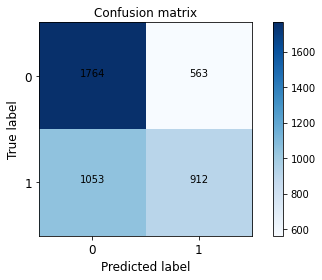

In [ ]:
cnf_matrix = confusion_matrix(y_test, predictions)
custom_plot_confusion_matrix(cnf_matrix, [0,1])

In [ ]:
print(classification_report(y_test, predictions, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.63      0.76      0.69      2327
           1       0.62      0.46      0.53      1965

    accuracy                           0.62      4292
   macro avg       0.62      0.61      0.61      4292
weighted avg       0.62      0.62      0.61      4292



Παρατηρούμε ότι ο Gaussian Naive Bayes δεν προβλέπει πολύ αποτελεσματικά καμία από τις δύο κλάσεις '0' και '1'. Το γεγονός αυτό ίσως οφείλεται στο ότι τα δείγματα είναι περισσότερo συσχετισμένα παρά ανεξάρτητα μεταξύ τους. Η ανεξαρτησία όμως των δεδομένων είναι απαραίτητη προϋπόθεση για την σωστή λειτουργία του συγκεκριμένου ταξινομητή ο οποίος στηρίζεται κατά κύριο λόγο σε αυτήν (αφελής υπόθεση).

## 3) **kNN Classifier**

O kNN είναι ένας ταξινομητής βασισμένος σε παραδείγματα (instance-based). Η αρχή λειτουργίας του είναι πολύ απλή. Για ένα νέο δείγμα προς ταξινόμηση, πρώτα υπολογίζουμε τους k πλησιέστερους γείτονές του (στον ν-διάστατο χώρο των χαρακτηριστικών εισόδου) με βάση κάποια συνάρτηση απόστασης, συνήθως την ευκλείδεια:


$$d(x, x') = \sqrt{\left(x_1 - x'_1 \right)^2 + \left(x_2 - x'_2 \right)^2 + \dotsc + \left(x_n - x'_n \right)^2}$$


Η κλάση του νέου δείγματος θα είναι η κλάση της πλειοψηφίας των k γειτόνων (διαλέγουμε k περιττό γενικά για να αποφύγουμε τυχόν 'ισοπαλίες'), είτε απλά υπολογισμένη (άθροισμα) είτε (αντίστροφα) ζυγισμένη με βάση την απόσταση του κάθε γείτονα. 


Ο kNN δεν έχει πρακτικά φάση εκπαίδευσης. Ωστόσο, για να ταξινομήσουμε ένα νέο δείγμα στην φάση test, πρέπει να συγκρίνουμε την απόστασή του με κάθε δείγμα του train set. Αυτό σημαίνει ότι για την ταξινόμηση είναι απαραίτητα όλα τα δείγματα εκπαίδευσης (εξού και η ονομασία "instance-based", ενώ στον Naive Bayes χρειαζόμαστε μόνο τις παραμέτρους $μ$ και $σ^2$). Αυτό σημαίνει ότι ο kNN είναι πιο απαιτητικός και σε χώρο (αποθήκευση όλων των δειγμάτων) και σε χρόνο (υπολογισμός όλων των αποστάσεων για κάθε νέο δείγμα).

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
accuracies['Knn'] = knn.score(X_test, y_test)
f1_micros['Knn']=precision_recall_fscore_support(y_test, predictions, average='micro')[2]
f1_macros['Knn']=precision_recall_fscore_support(y_test, predictions, average='macro')[2]
print("F1-micro average score is: \033[1m{} %\033[0m".format(f1_micros['Knn']*100))
print("F1-macro average score is: \033[1m{} %\033[0m".format(f1_macros['Knn']*100))

F1-micro average score is: 95.99254426840633 %
F1-macro average score is: 95.96415066447754 %


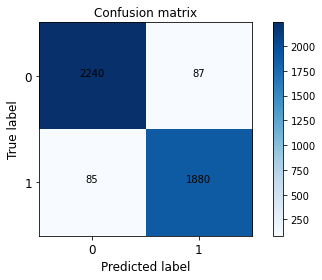

In [ ]:
cnf_matrix = confusion_matrix(y_test, predictions)
custom_plot_confusion_matrix(cnf_matrix, [0,1])

In [ ]:
print(classification_report(y_test, predictions, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2327
           1       0.96      0.96      0.96      1965

    accuracy                           0.96      4292
   macro avg       0.96      0.96      0.96      4292
weighted avg       0.96      0.96      0.96      4292



Σε αντίθεση με τον Gaussian Naive Bayes Classifier, ο Knn ταξινομητής λειτουργεί πάρα πολύ αποτελεσματικά και για τις δύο κλάσεις και πετυχαίνει πολύ υψηλό accuracy και μετρικές f1-score.

## 4) **MLP**

Στη συνέχεια πραγματοποιούμε εκπαίδευση σε ένα **Multi Layer Perceptron** (**MLP**) με παραμέτρους σταθερές και ίσες με τις default.

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier()

mlp.fit(X_train, y_train)
predictions = mlp.predict(X_test)
accuracies['Mlp'] = mlp.score(X_test, y_test)
f1_micros['Mlp']=precision_recall_fscore_support(y_test, predictions, average='micro')[2]
f1_macros['Mlp']=precision_recall_fscore_support(y_test, predictions, average='macro')[2]
print("F1-micro average score is: \033[1m{} %\033[0m".format(f1_micros['Mlp']*100))
print("F1-macro average score is: \033[1m{} %\033[0m".format(f1_macros['Mlp']*100))

F1-micro average score is: 45.782851817334574 %
F1-macro average score is: 31.40482659421448 %


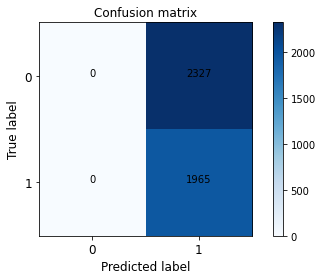

In [ ]:
cnf_matrix = confusion_matrix(y_test, predictions)
custom_plot_confusion_matrix(cnf_matrix, [0,1])

In [ ]:
print(classification_report(y_test, predictions, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2327
           1       0.46      1.00      0.63      1965

    accuracy                           0.46      4292
   macro avg       0.23      0.50      0.31      4292
weighted avg       0.21      0.46      0.29      4292



Παρατηρούμε ότι το μοντέλο δεν λειτουργεί πολύ ικανοποιητικά. Αυτό ενδεχομένως να οφείλεται στο γεγονός ότι το MLP έχει ένα πάρα πολύ μεγάλο πλήθος υπερπαραμέτρων, όπως ο αριθμός των νευρώνων του κρυμμένου επιπέδου, η συνάρτηση ενεργοποίησης, ο ρυθμός εκμάθησης κτλ., οι οποίες δεν είναι βελτιστοποιημένες. 

## 5) **SVM**

Με τον Αφελή Μπεϋζιανό ταξινομητή είδαμε ένα παράδειγμα μοντέλου το οποίο περιγράφει τις υποκείμενες κατανομές των δεδομένων προκειμένου να τα αποδώσει σε κλάσεις. Αυτή η κατηγορία ταξινομητών είναι η παραγωγική ή δημιουργική (**generative**). Τα **SVM** ανήκουν σε μία διαφορετική κατηγορία, στους μη-παραμετρικούς, διαχωριστικούς (**discriminative**) ταξινομητές οι οποίοι αντί να προσπαθούν να βρουν τις υποκείμενες κατανομές (δηλαδή τις παραμέτρους τους) επιδιώκουν να βρουν μια ευθεία ή καμπύλη σε δύο διαστάσεις ή πολύπτυχο (manifold) σε περισσότερες τα οποία να διαχωρίζουν / διακρίνουν τις κατηγορίες μεταξύ τους. Τα SVM είναι εγγενώς δυαδικοί ταξινομητές σε αντιδιαστολή π.χ. με τα MLP, ωστόσο μπορούν με κατάλληλες τεχνικές και επεκτάσεις να εφαρμοστούν και σε προβλήματα πολλών κλάσεων. Η γενική ιδέα τους συνοψίζεται στην επιλογή της βέλτιστης διαχωριστικής ευθείας μεταξύ των κλάσεων. Συγκεκριμένα, η γραμμή που μεγιστοποιεί το περιθώριο ταξινόμησης είναι αυτή η οποία επιλέγεται ως το βέλτιστο μοντέλο.  

### i) **LinearSVC**

In [ ]:
from sklearn.svm import LinearSVC

linearSVC = LinearSVC()
linearSVC.fit(X_train, y_train)
predictions = linearSVC.predict(X_test)
accuracies['LinearSVC'] = linearSVC.score(X_test, y_test)
f1_micros['LinearSVC'] = precision_recall_fscore_support(y_test, predictions, average='micro')[2]
f1_macros['LinearSVC'] = precision_recall_fscore_support(y_test, predictions, average='macro')[2]
print("F1-micro average score is: \033[1m{} %\033[0m".format(f1_micros['LinearSVC']*100))
print("F1-macro average score is: \033[1m{} %\033[0m".format(f1_macros['LinearSVC']*100))

F1-micro average score is: 46.34203168685928 %
F1-macro average score is: 32.617920629450836 %


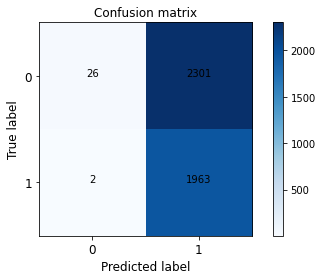

In [ ]:
cnf_matrix = confusion_matrix(y_test, predictions)
custom_plot_confusion_matrix(cnf_matrix, [0,1])

In [ ]:
print(classification_report(y_test, predictions, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.93      0.01      0.02      2327
           1       0.46      1.00      0.63      1965

    accuracy                           0.46      4292
   macro avg       0.69      0.51      0.33      4292
weighted avg       0.71      0.46      0.30      4292



### ii) **SVC**

In [ ]:
from sklearn.svm import SVC            # "Support vector classifier"

svc = SVC()
svc.fit(X_train, y_train)
predictions = svc.predict(X_test)
accuracies['SVC'] = svc.score(X_test, y_test)
f1_micros['SVC'] = precision_recall_fscore_support(y_test, predictions, average='micro')[2]
f1_macros['SVC'] = precision_recall_fscore_support(y_test, predictions, average='macro')[2]
print("F1-micro average score is: \033[1m{} %\033[0m".format(f1_micros['SVC']*100))
print("F1-macro average score is: \033[1m{} %\033[0m".format(f1_macros['SVC']*100))

F1-micro average score is: 59.97204100652377 %
F1-macro average score is: 51.52099934253781 %


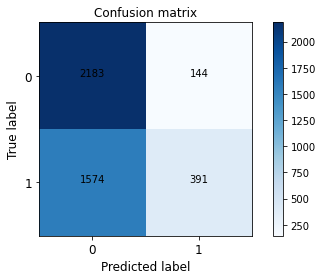

In [ ]:
cnf_matrix = confusion_matrix(y_test, predictions)
custom_plot_confusion_matrix(cnf_matrix, [0,1])

In [ ]:
print(classification_report(y_test, predictions, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.58      0.94      0.72      2327
           1       0.73      0.20      0.31      1965

    accuracy                           0.60      4292
   macro avg       0.66      0.57      0.52      4292
weighted avg       0.65      0.60      0.53      4292



Σε αντιστοιχία με τον MLP, o SVM έχει και αυτός ένα μεγάλο αριθμό υπερπαραμέτρων όπως η σκληρότητα του περιθωρίου, πιο συχνά γνωστή ως $C$ (από το "Cost"). Μάλιστα η κατάλληλη επιλογή της υπερπαραμέτρου $C$ καθορίζει σε μεγάλο βαθμό τα αποτελέσματα και πρέπει να γίνεται μόνο με cross-validation. Συνεπώς, η μέτρια επίδοση του συγκεκριμένου ταξινομητή μπορεί να δικαιολογηθεί από τον απλοϊκό συνδυασμό παραμέτρων και αναμένεται να αυξηθεί κατά την διαδικασία της βελτιστοποίησης.

## Μετρικές **f1-micro average** και **f1-macro average**

Τα λεξικά **f1_micros** και **f1_macros** περιέχουν τώρα τo f1 score για κάθε ταξινομητή με average micro και macro αντίστοιχα. Για τη διαδικασία σύγκρισης τυπώνουμε το όνομα του κάθε ταξινομητή καθώς και το αντίστοιχο score του, ταξινομώντας τους σε φθίνουσα σειρά ακρίβειας.

In [ ]:
print("\033[1mClassification on the Japanese Credit Screening Data Set\n")
print("------------------------ f1 micro average ------------------------\n")
sorted_f1_micros = [(k, f1_micros[k]) for k in sorted(f1_micros, key=f1_micros.get, reverse=True)]
for k, v in sorted_f1_micros:
  print("\033[1m",k,":\033[0m",v)
print()
print("\033[1m------------------------ f1 macro average ------------------------\n")
sorted_f1_macros = [(k, f1_macros[k]) for k in sorted(f1_macros, key=f1_macros.get, reverse=True)]
for m, n in sorted_f1_macros:
  print("\033[1m",m,":\033[0m",n)

Classification on the Japanese Credit Screening Data Set

------------------------ f1 micro average ------------------------

 Knn : 0.9599254426840633
 GaussianNB : 0.6234855545200373
 SVC : 0.5997204100652377
 Constant 0 : 0.5421714818266542
 Most frequent label : 0.5421714818266542
 Stratified : 0.5205032618825722
 uniform (random) : 0.5009319664492078
 LinearSVC : 0.4634203168685928
 Constant 1 : 0.45782851817334574
 Mlp : 0.45782851817334574

------------------------ f1 macro average ------------------------

 Knn : 0.9596415066447754
 GaussianNB : 0.6080400737820537
 Stratified : 0.5155497960062103
 SVC : 0.5152099934253781
 uniform (random) : 0.500032956024916
 Constant 0 : 0.35156368031424684
 Most frequent label : 0.35156368031424684
 LinearSVC : 0.32617920629450836
 Constant 1 : 0.3140482659421448
 Mlp : 0.3140482659421448


## Bar plot σύγκρισης ταξινομητών

Για λόγους σύγκρισης και πάλι τυπώνουμε στο ίδιο bar plot τις τιμές του f1-score για κάθε averaged metric (micro / macro) όλων των ταξινομητών που μελετήσαμε προηγουμένως. 

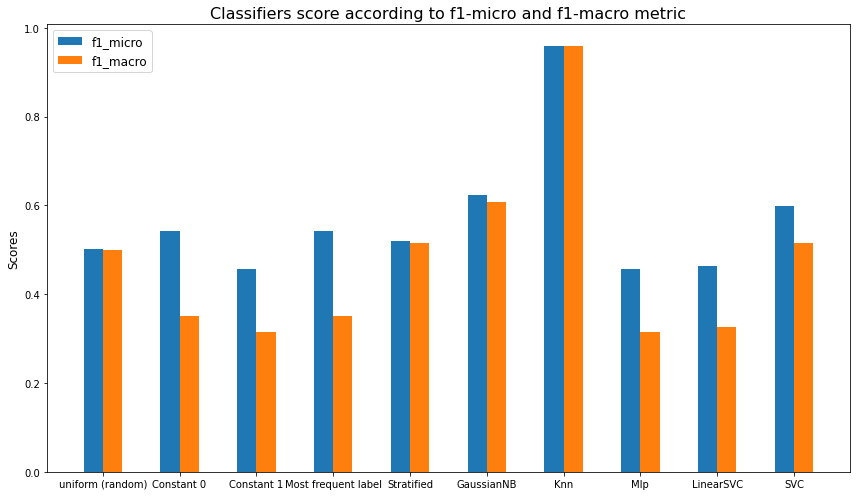

In [ ]:
classifiers = list(accuracies.keys())
x = np.arange(len(classifiers))
width = 0.25

fig, ax = plt.subplots(figsize=(12,7))
rects1 = ax.bar(x - width/2, list(f1_micros.values()), width, label='f1_micro')
rects2 = ax.bar(x + width/2, list(f1_macros.values()), width, label='f1_macro')

ax.set_ylabel('Scores',fontsize=12)
ax.set_title('Classifiers score according to f1-micro and f1-macro metric',fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(classifiers,fontsize=10)
ax.legend(loc='upper left',fontsize=12)

fig.tight_layout()
plt.show()

Παρατηρούμε ότι ο ταξινομητής Knn παρά την απλότητα του τρόπου λειτουργίας του κατηγοριοποιεί με πολύ μικρό σφάλμα τα test δεδομένα. Επομένως, αναμένουμε μικρή βελτίωση κατά την διαδικασία εύρεσης βέλτιστων παραμέτρων σε επόμενο βήμα. Την δεύτερη υψηλότερη ακρίβεια εμφανίζει ο μη-παραμετρικός Gaussian Naive Bayes ο οποίος ωστόσο απέχει σημαντικά από τον Knn λόγω της αφελής υπόθεσης που κάνει για την ανεξαρτησία των χαρακτηριστικών. Ακολουθούν ο μη-γραμμικός SVM και ο Mlp μαζί με τον LinearSVC. Οι ταξινομητές αυτοί, όπως αναφέρθηκε ήδη, έχουν μεγάλο αριθμό υπερπαραμέτρων προς βελτιστοποίηση και συνεπώς εκτιμούμε ότι θα παρουσιάσουν σημαντική αύξηση στην ακρίβεια κατηγοριοποίησης κατά την διαδικασία του gridsearch. Τέλος, αναφορικά με τους dummy classifiers, την καλύτερη επίδοση φαίνεται να έχει η στρατηγική Most frequent label (η οποία εδώ συμπίπτει με την Constant 0) κατά την οποία κάθε φορά επιλέγεται η πιο συχνή κλάση.

# Βελτιστοποίηση ταξινομητών

Για την βελτιστοποίηση των ταξινομητών και την ρύθμιση των υπερπαραμέτρων τους (εφόσον αυτοί έχουν) χρησιμοποιούμε τη μέθοδο της διασταυρούμενης επικύρωσης (**Cross Validation**). Στο Cross Validation αρχικά χωρίζουμε το training set σε έναν αριθμό "πτυχών" (folds). Για το συγκεκριμένο dataset δουλεύουμε με σχήμα **5-fold**. Στη συνέχεια, για κάθε k-fold, θεωρούμε ότι τα k μείον 1 folds είναι training set και ότι το fold που αφήσαμε έξω είναι το test set. Υπολογίζουμε τη μετρική σφάλματός μας στο test set που ορίζει το fold. Επαναλαμβάνουμε τη διαδικασία για τα k folds για κάθε τιμή των υπερπαραμέτρων και υπολογίζουμε τη μέση τιμή της μετρικής του σφάλματος. Με αυτό τον τρόπο, αφενός είμαστε αμερόληπτοι στην αξιολόγηση αφήνοντας τελείως έξω το test set και αφετέρου χρησιμοποιούμε αποτελεσματικά τα δεδομένα εκπαίδευσης: τα χρησιμοποιούμε όλα και παίρνοντας τη μέση τιμή εξαλείφουμε πιθανές ανωμαλίες στα δεδομένα.


<center>
<img src="https://i.ibb.co/xYGyQy9/kfolds.png" alt="kfolds" border="0"  height="350" width="600">
</center>

Για κάθε ταξινομητή, με εξαίρεση τους dummy, βελτιστοποιούμε την απόδοσή του στο training set μέσω της διαδικασίας προεπεξεργασίας και εύρεσης βέλτιστων υπερπαραμέτρων (τόσο των ταξινομητών όσο και των μετασχηματιστών). Συγκεκριμένα οι παράμετροι που βελτιστοποιούμε είναι:

1. **Παράμετροι μετασχηματιστών**: Το κατώφλι **threshold** για τον **VarianceThreshold** selector και ο αριθμός **n_components** για τον **PCA**.

2. **Παράμετροι ταξινομητών**:  

  Οι υπερπαράμετροι προς βελτιστοποίηση είναι:

* Για τον **kNN**: 
 1. Ο αριθμός **n_neighbors** των κοντινότερων γειτόνων στο training set που λαμβάνουμε υπόψην για την ταξινόμηση ενός νέου δείγματος στο test set
 2. η συνάρτηση απόστασης **metric** 
 3. η συνάρτηση βάρους **weights** που χρησιμοποιείται κατά την πρόβλεψη για την επιλογή των σημαντικότερων γειτόνων.

*  Για τον **MLP**: 
 1. o αριθμός των νευρώνων **hidden_layer_sizes** σε κάθε hidden layer (σύμφωνα με την εκφώνηση της εργαστηριακής άσκησης χρησιμοποιούμε μόνο **ένα επίπεδο** κρυμμένων νευρώνων)
 2. η συνάρτηση ενεργοποίησης **activation**
 3. ο **solver** για την βελτιστοποίηση των βαρών
 4. ο μέγιστος αριθμός **max_iter** των επαναλήψεων
 5. ο ρυθμός εκμάθησης **learning_rate** 
 6. η παράμετρος **alpha** για την αποφυγή του overfitting μέσω της επιβολής ποινής σε βάρη με μεγάλες τιμές. 

*  Για τον **LinearSVC**:
 1. η συνάρτηση απώλειας (loss function) **loss** 
 2. η παράμετρος **tol** που καθορίζει την ανοχή που θέλουμε να έχουμε ως προς το κριτήριο τερματισμού
 3. η παράμετρος κανονικοποίησης **C** η οποία είναι υποχρεωτικά θετική και η τιμή της εκφράζει τη σκληρότητα του περιθωρίου ταξινόμησης. Για πολύ μεγάλα C, δεν μπορούν να βρεθούν καθόλου σημεία εντός του περιθωρίου ενώ για μικρότερα C, το περιθώριο είναι πιο μαλακό και μπορεί να συμπεριλάβει εντός του κάποια σημεία.

*  Για τον **SVC**:
 1. ο τύπος της συνάρτησης πυρήνα **kernel** που χρησιμοποιείται στον αλγόριθμο (πειραματιζόμαστε μόνο με πυρήνες **poly** και **rbf** με βάση την εκφώνηση)
 2. η συνάρτηση απώλειας (loss function) **loss** 
 3. η παράμετρος κανονικοποίησης **C** η οποία είναι υποχρεωτικά θετική και η τιμή της εκφράζει τη σκληρότητα του περιθωρίου ταξινόμησης. Για πολύ μεγάλα C, δεν μπορούν να βρεθούν καθόλου σημεία εντός του περιθωρίου ενώ για μικρότερα C, το περιθώριο είναι πιο μαλακό και μπορεί να συμπεριλάβει εντός του κάποια σημεία.
 3. ο βαθμός **degree** του πολυωνύμου σε περίπτωση που ο πυρήνας που χρησιμοποιούμε έιναι ο **poly** (δεν λαμβάνεται υπόψη για όλους τους υπόλοιπους πυρήνες)
 4. η παράμετρος **gamma** που αξιοποιείται σε περιπτώσεις μη-γραμμικού τύπου πυρήνα. Όσο μεγαλύτερη είναι η τιμή της τόσο καλύτερα προσαρμόζεται το μοντέλο στα train δεδομένα, με αποτέλεσμα για πολύ μεγάλες τιμές να εμφανίζεται το πρόβλημα του overfitting.  
  5. η παράμετρος **tol** που καθορίζει την ανοχή που θέλουμε να έχουμε ως προς το κριτήριο τερματισμού

In [ ]:
from imblearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

# φέρνουμε τις γνωστές μας κλάσεις για preprocessing
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

import time
import re

# αρχικοποιούμε τον εκτιμητή (ταξινομητής) και τους μετασχηματιστές χωρίς υπερ-παραμέτρους
var_selector = VarianceThreshold()
standard_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()
pca = PCA()
knn = KNeighborsClassifier()
gnb = GaussianNB()


Για την εύρεση των βέλτιστων παραμέτρων που αναφέραμε, ορίζουμε τη συνάρτηση **gridsearch**. Η συνάρτηση αυτή δέχεται ως όρισμα τον εκάστοτε ταξινομητή,  τους όποιους μετασχηματιστές επιθυμούμε (μεταξύ των MinMax scaler, Standard scaler, Variance Threshold και PCA) μαζί με τις αντίστοιχες παραμέτρους, καθώς επίσης και τη μετρική απόδοσης. Ανάλογα με τα δοθέντα ορίσματα, η συνάρτηση δημιουργεί την αρχιτεκτονική του pipeline μετασχηματιστών-εκτιμητή και αποθηκεύει σε ένα dictionary (grid_components) τις αντίστοιχες τιμές παραμέτρων. Με χρήση της συνάρτησης **Pipeline** της imblearn κατασκευάζεται το τελικό pipe, το οποίο μαζί με το dictionary παραμέτρων δίνονται ως ορίσματα στην **GridSearchCV** της βιβλιοθήκης sklearn. Στη συνάρτηση επίσης μεταβιβάζεται η μετρική απόδοσης scoring, ο αριθμός των folds του cv ενώ τίθεται η παράμετρος n_jobs=-1 ώστε να χρησιμοποιούνται όλοι οι πυρήνες του υπολογιστή (το default είναι 1). Η συνάρτηση εξετάζει όλους τους δυνατούς συνδυασμούς υπερπαραμέτρων εντοπίζοντας το καλύτερο μοντέλο. Τελικά, η **gridsearch** επιστρέφει ένα λεξικό με τα ονόματα και τις αντίστοιχες τιμές των βέλτιστων υπερπαραμέτρων. 

In [ ]:
def gridsearch(clf,selector = None,selector_components = [],scaler = None,dim_reduct = None,dim_reduct_components = [], 
               n_neighbors_components = [], metric_components =[] , weights_components =[],
               hidden_layer_sizes_components = [], activation_components = [], solver_components = [], max_iter_components = [], learning_rate_components = [], alpha_components = [], 
               loss_components = [] , tol_components = [], C_components = [], kernel_components = [], degree_components = [], 
               gamma_components=[], scoring_metric = 'f1_macro'):     
    pipe_arch = []
    grid_components = {}
    if selector is not None:
       pipe_arch.append(('selector',selector))
       grid_components['selector__threshold'] = selector_components
    if scaler is not None:
       pipe_arch.append(('scaler',scaler))
       if scaler == min_max_scaler: pipe_arch.reverse()
    if dim_reduct is not None:
       pipe_arch.append(('dim_reduct',dim_reduct))
       grid_components['dim_reduct__n_components'] = dim_reduct_components
    pipe_arch.append(('clf',clf))
    if str(clf) == "KNeighborsClassifier()":
        grid_components['clf__n_neighbors'] = n_neighbors_components
        grid_components['clf__metric'] = metric_components
        grid_components['clf__weights'] = weights_components
    if str(clf) == "MLPClassifier()" :
        grid_components['clf__hidden_layer_sizes'] = hidden_layer_sizes_components
        grid_components['clf__activation'] = activation_components
        grid_components['clf__solver'] = solver_components
        grid_components['clf__max_iter'] = max_iter_components
        grid_components['clf__learning_rate'] = learning_rate_components
        grid_components['clf__alpha'] = alpha_components
    if str(clf) == "LinearSVC()":
        grid_components['clf__loss'] = loss_components
        grid_components['clf__tol'] = tol_components
        grid_components['clf__C'] = C_components
    if str(clf) == "SVC()":
        grid_components['clf__kernel'] = kernel_components
        grid_components['clf__C'] = C_components
        grid_components['clf__degree'] = degree_components
        grid_components['clf__gamma'] = gamma_components
        grid_components['clf__tol'] = tol_components
    pipe = Pipeline(steps=pipe_arch)
    estimator = GridSearchCV(pipe, grid_components, cv=5, scoring=scoring_metric, n_jobs=-1)
    start_time = time.time()
    estimator.fit(X_train, y_train)
    print("Best parameters for optimal estimator are: \033[1m{}\033[0m".format(estimator.best_params_))
    print("Best mean cross validation score for optimal estimator is \033[1m{} %".format(estimator.best_score_*100))
    pipeline_arch = '-'.join([str(elem[1]) for elem in pipe_arch]) 
    pipeline_arch = re.sub('[()]', '', pipeline_arch)
    f1_scores[pipeline_arch] = estimator.best_score_*100
    best_parameters[pipeline_arch] = estimator.best_params_
    return estimator.best_params_


Οι μετρικές απόδοσης που χρησιμοποιούνται στο cross-validation για την εύρεση των βέλτιστων τιμών των υπερπαραμέτρων (ταξινομητών και μετασχηματιστών) είναι οι f1-micro και f1-macro. Ανάλογα με την μετρική προκύπτει διαφορετικό βέλτιστο μοντέλο. Βέβαια για μικρά datasets αναμένουμε να καταλήξουμε σε παραπλήσιες (αν όχι ίδιες) βέλτιστες τιμές. Για κάθε μετρική ορίζουμε αρχικά δύο λεξικά **f1_scores** και **best_parameters** με κλειδιά όλες τις αρχιτεκτονικές pipeline που εξετάζουμε και τιμές τις μέσες τιμές των μετρικών απόδοσης των βέλτιστων ταξινομητών και τις παραμέτρους τους αντίστοιχα. Η συμπλήρωση των λεξικών αυτών γίνεται εντός της συνάρτησης **gridsearch** που περιγράφουμε παραπάνω. Επιπλέον, ορίζουμε για κάθε συνδυασμό μετρικής απόδοσης (f1-micro / f1-macro) και ταξινομητή (Gaussian, kNN, MLP και SVM) μία λίστα, η οποία αρχικοποιείται ως κενή μαζί με τα f1_scores, best_parameters και πρόκειται να περιέχει τις τιμές των βέλτιστων υπερπαραμέτρων που θα προκύψουν.

Στη συνέχεια, ακολουθείται μια **bottom-up** διαδικασία η οποία είναι ίδια για κάθε ταξινομητή και περιλαμβάνει τα ακόλουθα βήματα. Αρχικά, ξεκινάμε μόνο με τον εκτιμητή και στη συνέχεια προσθέτουμε μετασχηματιστές παρακολουθώντας την επίδραση τους στις επιδόσεις, πάντα με αναζήτηση πλέγματος με διασταυρούμενη επικύρωση. Eπομένως, για κάθε μετρική απόδοσης (f1-micro/macro) επιλέγουμε διαφορετικές αρχιτεκτονικές pipeline τις οποίες εξετάζουμε σειριακά μέσω της gridsearch προκειμένου να βρούμε τις βέλτιστες παραμέτρους τους και το αντίστοιχο cross validation score. Στο πεδίο ορισμού των παραμέτρων, ξεκινάμε με μεγάλα διαστήματα και σχετικά μεγάλο βήμα. Για τις αρχιτεκτονικές εκείνες οι οποίες εμφανίζουν τα πιο υψηλά crossvalidation scores μικραίνουμε το διάστημα του grid search γύρω από τις προηγούμενες βέλτιστες τιμές και εφαρμόζουμε ένα σχετικά μικρό βήμα. Οι τιμές αυτές λαμβάνονται **παραμετρικά** από το λεξικό επιστροφής της αμέσως προηγούμενης κλήσης της συνάρτησης gridsearch. Με τον τρόπο αυτό εξασφαλίζουμε ότι είτε θα βελτιστοποιήσουμε περαιτέρω τον εκτιμητή είτε σε περίπτωση που αυτός δεν βελτιστοποιηθεί θα είμαστε σίγουροι ότι βρισκόμαστε σε ένα καλό τοπικό μέγιστο της συνάρτησης αξιολόγησης.

Η διαδικασία εύρεσης των βέλτιστων υπερπαραμέτρων μέσω της gridsearch είναι εκ γενετής μια χρονοβόρα διαδικασία πειραματισμών. Για το λόγο αυτό, στους ταξινομητές με μεγάλο αριθμό υπερπαραμέτρων προς βελτιστοποίηση, όπως ο **MLP** και ο **SVM**, εκμεταλλεύομαστε το μεγάλο μέγεθος του dataset και πραγματοποιούμε μία σταδιακή αναζήτηση. Συγκεκριμένα, εφαρμόζουμε gridsearch σε ένα υποσύνολο των διαθέσιμων δειγμάτων του train dataset (20%) για τον εντοπισμό ορισμένων αρχικά καλών τιμών. Για τον σκοπό αυτό, ορίζουμε την συνάρτηση **gridsearch_reduced** η οποία είναι όμοια με την **gridsearch**, με μοναδική διαφορά ότι εκπαιδεύει το μοντέλο πάνω στο τυχαίο train subset. Κατόπιν, εφαρμόζουμε hyperparameter tuning στο σύνολο όλων των δεδομένων μας σε ένα μικρό διάστημα γύρω από τις βέλτιστες τιμές που προσδιορίσαμε προηγουμένως. 

Σημειώνουμε πως **δεν** προσδιορίσαμε κάποιο **random_state** κατά την κλήση της συνάρτησης **train_test_split**. Επομένως σε κάθε τρέξιμο του κώδικα γίνεται διαφορετικός διαμοιρασμός δειγμάτων σε train και test set και άρα ενδέχεται να διαφέρουν οι βέλτιστες αρχιτεκτονικές και οι υπερπαράμετροί τους.

## 1) **Dummy Classifier**

Στην ενότητα αυτή δεν θα ασχοληθούμε με τους Dummy Classifiers καθώς πραγματοποιούν μια "αφελή" διαδικασία ταξινόμησης η οποία δεν επιδέχεται κάποιου είδους βελτιστοποίηση.

## 2) **Gaussian Naive Bayes Classifier**

Ο Gaussian Naive Bayes ταξινομητής **δεν** έχει υπερπαραμέτρους. Συνεπώς, στις αρχιτεκτονικές εκείνες οι οποίες περιέχουν μόνο τον ταξινομητή ή τον ταξινομητή μαζί με κάποιο μετασχηματιστή κανονικοποίησης των δεδομένων (Standrard / MinMax Scaler) **δεν** χρησιμοποιούμε την **gridsearch** καθώς δεν υπάρχουν υπερπαράμετροι προς βελτιστοποίηση. Ωστόσο, εφαρμόζουμε **cross- validation** μέσω της έτοιμης συνάρτησης **cross_val_score** της **sklearn** προκειμένου να λάβουμε μια πιο αντιπροσωπευτική τιμή για την απόδοση του μοντέλου μας καθώς αυτό αξιολογείται σε 5 διαφορετικά σύνολα δοκιμής. Αντιθέτως, όταν αξιολογούμε το μοντέλο σε ένα test set (το αρχικό που προκύπτει κατά τον διαχωρισμό των δεδομένων) λαμβάνουμε μία μετρική απόδοσης η οποία δεν είναι πλήρως αντιπροσωπευτική. Το αποτέλεσμα αυτό μπορεί να είναι τυχαίο ή να επηρεάζεται από bias των test δεδομένων. Επομένως, με χρήση του **cross-validation** επιτυγχάνουμε μία μεγαλύτερη συνοχή και ισορροπία στα δεδομένα μας και κατά συνέπεια εξασφαλίζουμε ένα μοντέλο που μπορεί να λύνει πιο αποτελεσματικά το γενικό πρόβλημα κατηγοριοποίησης. 

### Βελτιστοποίηση ταξινομητή με βάση τη μετρική F1-micro average

In [ ]:
f1_scores = {}
best_parameters = {}
best_gnb_f1_micro_parameters = []

#### Gaussian Naive Bayes

In [ ]:
gnb = GaussianNB()
scores = cross_val_score(gnb, X_train, y_train, cv=5, scoring='f1_micro')
f1_scores['GaussianNB'] = scores.mean()*100
print("Best mean cross validation score for estimator is \033[1m{} % \033[0m".format(scores.mean()*100))

Best mean cross validation score for estimator is 62.56478419234285 % 


#### StandardScaler - Gaussian Naive Bayes

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
scores = cross_val_score(GaussianNB(), X_train_scaled, y_train, cv=5, scoring='f1_micro')
f1_scores['StandardScaler-GaussianNB'] = scores.mean() * 100
print("Best mean cross validation score for estimator is \033[1m{} % \033[0m".format(scores.mean()*100))

Best mean cross validation score for estimator is 62.56478419234285 % 


#### MinMaxScaler - Gaussian Naive Bayes

In [ ]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
scores = cross_val_score(GaussianNB(), X_train_scaled, y_train, cv=5, scoring='f1_micro')
f1_scores['MinMaxScaler-GaussianNB'] = scores.mean() * 100
print("Best mean cross validation score for estimator is \033[1m{} % \033[0m".format(scores.mean()*100))

Best mean cross validation score for estimator is 62.56478419234285 % 


#### VarianceThreshold - Gaussian Naive Bayes

In [ ]:
best_param = gridsearch(clf = GaussianNB(),
                        selector = var_selector,
                        selector_components = [200,300,400,700,800],
                        scoring_metric = 'f1_micro')

Best parameters for optimal estimator are: {'selector__threshold': 300}
Best mean cross validation score for optimal estimator is 61.96546838084532 %


#### StandardScaler - PCA - Gaussian Naive Bayes

In [ ]:
best_param = gridsearch(clf = GaussianNB(),
                        scaler = standard_scaler, 
                        dim_reduct = pca, 
                        dim_reduct_components = [3,6,9,12],
                        scoring_metric = 'f1_micro')

Best parameters for optimal estimator are: {'dim_reduct__n_components': 12}
Best mean cross validation score for optimal estimator is 66.6299701297205 %


##### Progressive search

In [ ]:
dim = best_param['dim_reduct__n_components']

best_param = gridsearch(clf = GaussianNB(),
                        scaler = standard_scaler, 
                        dim_reduct = pca, 
                        dim_reduct_components = list(dict.fromkeys([max(dim-3,2),max(dim-2,2),max(dim-1,2),dim,min(dim+1,14),min(dim+2,14),min(dim+3,14)])),
                        scoring_metric = 'f1_micro')

Best parameters for optimal estimator are: {'dim_reduct__n_components': 14}
Best mean cross validation score for optimal estimator is 67.12934594112826 %


#### MinMaxScaler - PCA - Gaussian Naive Bayes

In [ ]:
best_param = gridsearch(clf = GaussianNB(),
                        scaler = min_max_scaler, 
                        dim_reduct = pca, 
                        dim_reduct_components = [3,6,9,12],
                        scoring_metric = 'f1_micro')

Best parameters for optimal estimator are: {'dim_reduct__n_components': 9}
Best mean cross validation score for optimal estimator is 66.500174812706 %


##### Progressive search

In [ ]:
dim = best_param['dim_reduct__n_components']

best_param = gridsearch(clf = GaussianNB(),
                        scaler = min_max_scaler, 
                        dim_reduct = pca, 
                        dim_reduct_components = list(dict.fromkeys([max(dim-3,2),max(dim-2,2),max(dim-1,2),dim,min(dim+1,14),min(dim+2,14),min(dim+3,14)])),
                        scoring_metric = 'f1_micro')

Best parameters for optimal estimator are: {'dim_reduct__n_components': 11}
Best mean cross validation score for optimal estimator is 66.66989026949088 %


#### VarianceThreshold - StandardScaler - Gaussian Naive Bayes

In [ ]:
best_param = gridsearch(clf = GaussianNB(),
                        selector = var_selector,
                        selector_components = [200,300,400,700,800],
                        scaler = standard_scaler,
                        scoring_metric = 'f1_micro')

Best parameters for optimal estimator are: {'selector__threshold': 300}
Best mean cross validation score for optimal estimator is 61.96546838084532 %


#### MinMaxScaler- VarianceThreshold  - Gaussian Naive Bayes

In [ ]:
best_param = gridsearch(clf = GaussianNB(),
                        selector = var_selector,
                        selector_components = np.round(np.linspace(0.01,0.018,10),3),
                        scaler = min_max_scaler, 
                        scoring_metric = 'f1_micro')

Best parameters for optimal estimator are: {'selector__threshold': 0.013}
Best mean cross validation score for optimal estimator is 63.57366048828854 %


#### VarianceThreshold - StandardScaler - PCA - Gaussian Naive Bayes

In [ ]:
best_param = gridsearch(clf = GaussianNB(),
                        selector = var_selector,
                        selector_components = [200,300,400,700,800],
                        scaler = standard_scaler, 
                        dim_reduct = pca, 
                        dim_reduct_components = [3,6,9,12],
                        scoring_metric = 'f1_micro')

Best parameters for optimal estimator are: {'dim_reduct__n_components': 6, 'selector__threshold': 300}
Best mean cross validation score for optimal estimator is 65.35157304004035 %


#### MinMaxScaler- VarianceThreshold - PCA - Gaussian Naive Bayes

In [ ]:
best_param = gridsearch(clf = GaussianNB(),
                        selector = var_selector,
                        selector_components = np.round(np.linspace(0.01,0.018,10),3),
                        scaler = min_max_scaler, 
                        dim_reduct = pca, 
                        dim_reduct_components = [3,6,9,12],
                        scoring_metric = 'f1_micro')

Best parameters for optimal estimator are: {'dim_reduct__n_components': 12, 'selector__threshold': 0.013}
Best mean cross validation score for optimal estimator is 67.79854693484249 %


In [ ]:
dim = best_param['dim_reduct__n_components']
thresh = best_param['selector__threshold']

best_param = gridsearch(clf = GaussianNB(),
                        selector = var_selector,
                        selector_components = np.round(np.linspace(thresh-0.005,thresh+0.005,10),3), 
                        scaler = min_max_scaler, 
                        dim_reduct = pca, 
                        dim_reduct_components = list(dict.fromkeys([max(dim-3,2),max(dim-2,2),max(dim-1,2),dim,min(dim+1,14),min(dim+2,14),min(dim+3,14)])),
                        scoring_metric = 'f1_micro')

Best parameters for optimal estimator are: {'dim_reduct__n_components': 14, 'selector__threshold': 0.008}
Best mean cross validation score for optimal estimator is 67.5588116327008 %


#### Επιλογή βέλτιστου ταξινομητή 

Για την επιλογή του βέλτιστου ταξινομητή βρίσκουμε αρχικά την μέγιστη τιμή απόδοσης που περιέχεται στο λεξικό **f1_scores**. Στη συνέχεια, αποθηκεύουμε στην λίστα με τις καλύτερες αρχιτεκτονικές για τον συγκεκριμένο ταξινομητή όλα εκείνα τα pipelines για τα οποία η απόδοση ισούται με την τιμή αυτή. Για κάθε ένα από τα βέλτιστα αυτά pipelines τυπώνουμε τις παραμέτρους τους, οι οποίες βρίσκονται στο dictionary **best_parameters**.

In [ ]:
best_f1_micro = max(f1_scores.values())            
best_gnb_f1_micro_pipelines = [pipe for pipe,score in f1_scores.items() if score == best_f1_micro]    # getting all pipelines containing the maximum score
print("The best pipeline/pipelines with \033[1mf1_micro average {}% \033[0mis/are:\033[1m\n".format(best_f1_micro)) 
for pipeline in best_gnb_f1_micro_pipelines:
    best_gnb_f1_micro_parameters.append(best_parameters[pipeline])
    print(pipeline,"\033[0mwith parameters:\033[1m",best_parameters[pipeline])

The best pipeline/pipelines with f1_micro average 67.5588116327008% is/are:

MinMaxScaler-VarianceThreshold-PCA-GaussianNB with parameters: {'dim_reduct__n_components': 14, 'selector__threshold': 0.008}


### Βελτιστοποίηση ταξινομητή με βάση τη μετρική F1-macro average

In [ ]:
f1_scores = {}
best_parameters = {}
best_gnb_f1_macro_parameters = []

#### Gaussian Naive Bayes

In [ ]:
gnb = GaussianNB()
scores = cross_val_score(gnb, X_train, y_train, cv=5, scoring='f1_macro')
f1_scores['GaussianNB'] = scores.mean()*100
print("Best mean cross validation score for estimator is \033[1m{} % \033[0m".format(scores.mean()*100))

Best mean cross validation score for estimator is 60.859313690348 % 


#### StandardScaler - Gaussian Naive Bayes

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
scores = cross_val_score(GaussianNB(), X_train_scaled, y_train, cv=5, scoring='f1_macro')
f1_scores['StandardScaler-GaussianNB'] = scores.mean() * 100
print("Best mean cross validation score for estimator is \033[1m{} % \033[0m".format(scores.mean()*100))

Best mean cross validation score for estimator is 60.859313690348 % 


#### MinMaxScaler - Gaussian Naive Bayes

In [ ]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
scores = cross_val_score(GaussianNB(), X_train_scaled, y_train, cv=5, scoring='f1_macro')
f1_scores['MinMaxScaler-GaussianNB'] = scores.mean() * 100
print("Best mean cross validation score for estimator is \033[1m{} % \033[0m".format(scores.mean()*100))

Best mean cross validation score for estimator is 60.859313690348 % 


#### VarianceThreshold - Gaussian Naive Bayes

In [ ]:
best_param = gridsearch(clf = GaussianNB(),
                        selector = var_selector,
                        selector_components = [200,300,400,700,800],
                        scoring_metric = 'f1_macro')

Best parameters for optimal estimator are: {'selector__threshold': 300}
Best mean cross validation score for optimal estimator is 59.63665317535867 %


#### StandardScaler - PCA - Gaussian Naive Bayes

In [ ]:
best_param = gridsearch(clf = GaussianNB(),
                        scaler = standard_scaler, 
                        dim_reduct = pca, 
                        dim_reduct_components = [3,6,9,12],
                        scoring_metric = 'f1_macro')

Best parameters for optimal estimator are: {'dim_reduct__n_components': 12}
Best mean cross validation score for optimal estimator is 64.79765910206848 %


##### Progressive search


In [ ]:
dim = best_param['dim_reduct__n_components']

best_param = gridsearch(clf = GaussianNB(),
                        scaler = standard_scaler, 
                        dim_reduct = pca, 
                        dim_reduct_components = list(dict.fromkeys([max(dim-3,2),max(dim-2,2),max(dim-1,2),dim,min(dim+1,14),min(dim+2,14),min(dim+3,14)])),
                        scoring_metric = 'f1_macro')

Best parameters for optimal estimator are: {'dim_reduct__n_components': 14}
Best mean cross validation score for optimal estimator is 65.33186674725592 %


#### MinMaxScaler - PCA - Gaussian Naive Bayes

In [ ]:
best_param = gridsearch(clf = GaussianNB(),
                        scaler = min_max_scaler, 
                        dim_reduct = pca, 
                        dim_reduct_components = [3,6,9,12],
                        scoring_metric = 'f1_macro')

Best parameters for optimal estimator are: {'dim_reduct__n_components': 9}
Best mean cross validation score for optimal estimator is 64.57219436039422 %


##### Progressive search


In [ ]:
dim = best_param['dim_reduct__n_components']

best_param = gridsearch(clf = GaussianNB(),
                        scaler = min_max_scaler, 
                        dim_reduct = pca, 
                        dim_reduct_components = list(dict.fromkeys([max(dim-3,2),max(dim-2,2),max(dim-1,2),dim,min(dim+1,14),min(dim+2,14),min(dim+3,14)])),
                        scoring_metric = 'f1_macro')

Best parameters for optimal estimator are: {'dim_reduct__n_components': 11}
Best mean cross validation score for optimal estimator is 64.84340637835884 %


#### VarianceThreshold - StandardScaler - Gaussian Naive Bayes

In [ ]:
best_param = gridsearch(clf = GaussianNB(),
                        selector = var_selector,
                        selector_components = [200,300,400,700,800],
                        scaler = standard_scaler,
                        scoring_metric = 'f1_macro')

Best parameters for optimal estimator are: {'selector__threshold': 300}
Best mean cross validation score for optimal estimator is 59.63665317535867 %


#### MinMaxScaler- VarianceThreshold  - Gaussian Naive Bayes

In [ ]:
best_param = gridsearch(clf = GaussianNB(),
                        selector = var_selector,
                        selector_components = np.round(np.linspace(0.01,0.018,10),3),
                        scaler = min_max_scaler, 
                        scoring_metric = 'f1_macro')

Best parameters for optimal estimator are: {'selector__threshold': 0.013}
Best mean cross validation score for optimal estimator is 61.988066283055 %


#### VarianceThreshold - StandardScaler - PCA - Gaussian Naive Bayes

In [ ]:
best_param = gridsearch(clf = GaussianNB(),
                        selector = var_selector,
                        selector_components = [200,300,400,700,800],
                        scaler = standard_scaler, 
                        dim_reduct = pca, 
                        dim_reduct_components = [3,6,9,12],
                        scoring_metric = 'f1_macro')

Best parameters for optimal estimator are: {'dim_reduct__n_components': 6, 'selector__threshold': 300}
Best mean cross validation score for optimal estimator is 62.38791595946574 %


#### MinMaxScaler- VarianceThreshold - PCA - Gaussian Naive Bayes

In [ ]:
best_param = gridsearch(clf = GaussianNB(),
                        selector = var_selector,
                        selector_components = np.round(np.linspace(0.01,0.018,10),3),
                        scaler = min_max_scaler, 
                        dim_reduct = pca, 
                        dim_reduct_components = [3,6,9,12],
                        scoring_metric = 'f1_macro')

Best parameters for optimal estimator are: {'dim_reduct__n_components': 12, 'selector__threshold': 0.013}
Best mean cross validation score for optimal estimator is 66.07006592974606 %


##### Progressive search

In [ ]:
dim = best_param['dim_reduct__n_components']
thresh = best_param['selector__threshold']

best_param = gridsearch(clf = GaussianNB(),
                        selector = var_selector,
                        selector_components = np.round(np.linspace(thresh-0.005,thresh+0.005,10),3),
                        scaler = min_max_scaler, 
                        dim_reduct = pca, 
                        dim_reduct_components =  list(dict.fromkeys([max(dim-3,2),max(dim-2,2),max(dim-1,2),dim,min(dim+1,14),min(dim+2,14),min(dim+3,14)])),
                        scoring_metric = 'f1_macro')

Best parameters for optimal estimator are: {'dim_reduct__n_components': 14, 'selector__threshold': 0.008}
Best mean cross validation score for optimal estimator is 65.86627978823657 %


#### Επιλογή βέλτιστου ταξινομητή 

In [ ]:
best_f1_macro = max(f1_scores.values())          
best_gnb_f1_macro_pipelines = [pipe for pipe,score in f1_scores.items() if score == best_f1_macro]                          # getting all pipelines containing the maximum score
print("The best pipeline/pipelines with \033[1mf1_macro average {}% \033[0mis/are:\033[1m\n".format(best_f1_macro)) 
for pipeline in best_gnb_f1_macro_pipelines:
    best_gnb_f1_macro_parameters.append(best_parameters[pipeline])
    print(pipeline,"\033[0mwith parameters:\033[1m",best_parameters[pipeline])

The best pipeline/pipelines with f1_macro average 65.86627978823657% is/are:

MinMaxScaler-VarianceThreshold-PCA-GaussianNB with parameters: {'dim_reduct__n_components': 14, 'selector__threshold': 0.008}


## 3) **kNN**

### Βελτιστοποίηση ταξινομητή με βάση τη μετρική F1-micro average

In [ ]:
f1_scores = {}
best_parameters = {}
best_knn_f1_micro_parameters = []

#### kNN

In [ ]:
best_param = gridsearch(clf = KNeighborsClassifier(),
                        n_neighbors_components = list(range(1,54,6)),
                        metric_components = ['euclidean', 'manhattan','chebyshev','mahalanobis'],
                        weights_components = ['uniform','distance'],
                        scoring_metric = 'f1_micro')

Best parameters for optimal estimator are: {'clf__metric': 'euclidean', 'clf__n_neighbors': 1, 'clf__weights': 'uniform'}
Best mean cross validation score for optimal estimator is 96.58415473692558 %


##### Progressive search 

In [ ]:
n = best_param['clf__n_neighbors']

best_param = gridsearch(clf = KNeighborsClassifier(),
                        n_neighbors_components = list(dict.fromkeys([max(n-6,1),max(n-4,1),max(n-2,1),n,n+2,n+4,n+6])),
                        metric_components = ['euclidean', 'manhattan','chebyshev','mahalanobis'],
                        weights_components = ['uniform','distance'],
                        scoring_metric = 'f1_micro')

Best parameters for optimal estimator are: {'clf__metric': 'euclidean', 'clf__n_neighbors': 1, 'clf__weights': 'uniform'}
Best mean cross validation score for optimal estimator is 96.58415473692558 %


#### StandardScaler - kNN

In [ ]:
best_param = gridsearch(clf = KNeighborsClassifier(),
                        scaler = standard_scaler,
                        n_neighbors_components = list(range(1,54,6)),
                        metric_components = ['euclidean', 'manhattan','chebyshev','mahalanobis'],
                        weights_components = ['uniform','distance'],
                        scoring_metric = 'f1_micro')

Best parameters for optimal estimator are: {'clf__metric': 'euclidean', 'clf__n_neighbors': 1, 'clf__weights': 'uniform'}
Best mean cross validation score for optimal estimator is 95.79497886038077 %


##### Progressive search

In [ ]:
n = best_param['clf__n_neighbors']

best_param = gridsearch(clf = KNeighborsClassifier(),
                        scaler = standard_scaler, 
                        n_neighbors_components = list(dict.fromkeys([max(n-6,1),max(n-4,1),max(n-2,1),n,n+2,n+4,n+6])),
                        metric_components = ['euclidean', 'manhattan','chebyshev','mahalanobis'],
                        weights_components = ['uniform','distance'],
                        scoring_metric = 'f1_micro')

Best parameters for optimal estimator are: {'clf__metric': 'euclidean', 'clf__n_neighbors': 1, 'clf__weights': 'uniform'}
Best mean cross validation score for optimal estimator is 95.79497886038077 %


#### MinMaxScaler - kNN

In [ ]:
best_param = gridsearch(clf = KNeighborsClassifier(),
                        scaler = min_max_scaler, 
                        n_neighbors_components = list(range(1,54,6)),
                        metric_components = ['euclidean', 'manhattan','chebyshev','mahalanobis'],
                        weights_components = ['uniform','distance'],
                        scoring_metric = 'f1_micro')

Best parameters for optimal estimator are: {'clf__metric': 'manhattan', 'clf__n_neighbors': 1, 'clf__weights': 'uniform'}
Best mean cross validation score for optimal estimator is 95.60529834618701 %


##### Progressive search

In [ ]:
n = best_param['clf__n_neighbors']

best_param = gridsearch(clf = KNeighborsClassifier(),
           scaler = min_max_scaler, 
           n_neighbors_components = list(dict.fromkeys([max(n-6,1),max(n-4,1),max(n-2,1),n,n+2,n+4,n+6])),
           metric_components = ['euclidean', 'manhattan','chebyshev','mahalanobis'],
           weights_components = ['uniform','distance'],
           scoring_metric = 'f1_micro')

Best parameters for optimal estimator are: {'clf__metric': 'manhattan', 'clf__n_neighbors': 1, 'clf__weights': 'uniform'}
Best mean cross validation score for optimal estimator is 95.60529834618701 %


#### VarianceThreshold - kNN

In [ ]:
best_param = gridsearch(clf = KNeighborsClassifier(),
                        selector = var_selector,
                        selector_components = [200,300,400,700,800],
                        n_neighbors_components = list(range(1,54,6)),
                        metric_components = ['euclidean', 'manhattan','chebyshev','mahalanobis'],
                        weights_components = ['uniform','distance'],
                        scoring_metric = 'f1_micro')

Best parameters for optimal estimator are: {'clf__metric': 'euclidean', 'clf__n_neighbors': 1, 'clf__weights': 'uniform', 'selector__threshold': 200}
Best mean cross validation score for optimal estimator is 95.30566787181864 %


##### Progressive search

In [ ]:
thresh = best_param['selector__threshold']
n = best_param['clf__n_neighbors']

best_param = gridsearch(clf = KNeighborsClassifier(),
                        selector = var_selector,
                        selector_components = list(np.arange(max(thresh-100,150),thresh+101,50)),
                        n_neighbors_components = list(dict.fromkeys([max(n-6,1),max(n-4,1),max(n-2,1),n,n+2,n+4,n+6])),
                        metric_components = ['euclidean', 'manhattan','chebyshev','mahalanobis'],
                        weights_components = ['uniform','distance'],
                        scoring_metric = 'f1_micro')

Best parameters for optimal estimator are: {'clf__metric': 'euclidean', 'clf__n_neighbors': 1, 'clf__weights': 'uniform', 'selector__threshold': 150}
Best mean cross validation score for optimal estimator is 96.19460419759972 %


#### StandardScaler - PCA - kNN

In [ ]:
best_param = gridsearch(clf = KNeighborsClassifier(),
                        scaler = standard_scaler, 
                        dim_reduct = pca, 
                        dim_reduct_components = [3,6,9,12],
                        n_neighbors_components = list(range(1,54,6)),
                        metric_components = ['euclidean', 'manhattan','chebyshev','mahalanobis'],
                        weights_components = ['uniform','distance'],
                        scoring_metric = 'f1_micro')

Best parameters for optimal estimator are: {'clf__metric': 'manhattan', 'clf__n_neighbors': 1, 'clf__weights': 'uniform', 'dim_reduct__n_components': 12}
Best mean cross validation score for optimal estimator is 95.04597748731548 %


##### Progressive search

In [ ]:
dim = best_param['dim_reduct__n_components']
n = best_param['clf__n_neighbors']

best_param = gridsearch(clf = KNeighborsClassifier(),
                        scaler = standard_scaler, 
                        dim_reduct = pca, 
                        dim_reduct_components = list(dict.fromkeys([max(dim-3,2),max(dim-2,2),max(dim-1,2),dim,min(dim+1,14),min(dim+2,14),min(dim+3,14)])),
                        n_neighbors_components = list(dict.fromkeys([max(n-6,1),max(n-4,1),max(n-2,1),n,n+2,n+4,n+6])),
                        metric_components = ['euclidean', 'manhattan','chebyshev','mahalanobis'],
                        weights_components = ['uniform','distance'],
                        scoring_metric = 'f1_micro')

Best parameters for optimal estimator are: {'clf__metric': 'manhattan', 'clf__n_neighbors': 1, 'clf__weights': 'uniform', 'dim_reduct__n_components': 14}
Best mean cross validation score for optimal estimator is 96.25449936982639 %


#### MinMaxScaler - PCA - kNN

In [ ]:
best_param = gridsearch(clf = KNeighborsClassifier(),
                        scaler = min_max_scaler, 
                        dim_reduct = pca, 
                        dim_reduct_components = [3,6,9,12],
                        n_neighbors_components = list(range(1,54,6)),
                        metric_components = ['euclidean', 'manhattan','chebyshev','mahalanobis'],
                        weights_components = ['uniform','distance'],
                        scoring_metric = 'f1_micro')

Best parameters for optimal estimator are: {'clf__metric': 'manhattan', 'clf__n_neighbors': 1, 'clf__weights': 'uniform', 'dim_reduct__n_components': 12}
Best mean cross validation score for optimal estimator is 94.646481825713 %


##### Progressive search

In [ ]:
dim = best_param['dim_reduct__n_components']
n = best_param['clf__n_neighbors']

best_param = gridsearch(clf = KNeighborsClassifier(),
                        scaler = min_max_scaler, 
                        dim_reduct = pca, 
                        dim_reduct_components = list(dict.fromkeys([max(dim-3,2),max(dim-2,2),max(dim-1,2),dim,min(dim+1,14),min(dim+2,14),min(dim+3,14)])),
                        n_neighbors_components = list(dict.fromkeys([max(n-6,1),max(n-4,1),max(n-2,1),n,n+2,n+4,n+6])),
                        metric_components = ['euclidean', 'manhattan','chebyshev','mahalanobis'],
                        weights_components = ['uniform','distance'],
                        scoring_metric = 'f1_micro')

Best parameters for optimal estimator are: {'clf__metric': 'manhattan', 'clf__n_neighbors': 1, 'clf__weights': 'uniform', 'dim_reduct__n_components': 14}
Best mean cross validation score for optimal estimator is 95.96483895535319 %


#### VarianceThreshold - StandardScaler - kNN

In [ ]:
best_param = gridsearch(clf = KNeighborsClassifier(),
                        selector = var_selector,
                        selector_components = [200,300,400,700,800],
                        scaler = standard_scaler, 
                        n_neighbors_components = list(range(1,54,6)),
                        metric_components = ['euclidean', 'manhattan','chebyshev','mahalanobis'],
                        weights_components = ['uniform','distance'],
                        scoring_metric = 'f1_micro')

Best parameters for optimal estimator are: {'clf__metric': 'euclidean', 'clf__n_neighbors': 1, 'clf__weights': 'uniform', 'selector__threshold': 200}
Best mean cross validation score for optimal estimator is 94.12708609413552 %


##### Progressive search

In [ ]:
thresh = best_param['selector__threshold']
n = best_param['clf__n_neighbors']

best_param = gridsearch(clf = KNeighborsClassifier(),
                        selector = var_selector,
                        selector_components = list(np.arange(max(thresh-100,150),thresh+101,50)),
                        scaler = standard_scaler, 
                        n_neighbors_components = list(dict.fromkeys([max(n-6,1),max(n-4,1),max(n-2,1),n,n+2,n+4,n+6])),
                        metric_components = ['euclidean', 'manhattan','chebyshev','mahalanobis'],
                        weights_components = ['uniform','distance'],
                        scoring_metric = 'f1_micro')

Best parameters for optimal estimator are: {'clf__metric': 'euclidean', 'clf__n_neighbors': 1, 'clf__weights': 'uniform', 'selector__threshold': 150}
Best mean cross validation score for optimal estimator is 94.81614740726073 %


#### MinMaxScaler- VarianceThreshold  - kNN

In [ ]:
best_param = gridsearch(clf = KNeighborsClassifier(),
                        selector = var_selector,
                        selector_components = np.round(np.linspace(0.01,0.018,10),3),
                        scaler = min_max_scaler, 
                        n_neighbors_components = list(range(1,54,6)),
                        metric_components = ['euclidean', 'manhattan','chebyshev','mahalanobis'],
                        weights_components = ['uniform','distance'],
                        scoring_metric = 'f1_micro')

Best parameters for optimal estimator are: {'clf__metric': 'manhattan', 'clf__n_neighbors': 1, 'clf__weights': 'uniform', 'selector__threshold': 0.01}
Best mean cross validation score for optimal estimator is 95.60529834618701 %


##### Progressive search

In [ ]:
thresh = best_param['selector__threshold']
n = best_param['clf__n_neighbors']

best_param = gridsearch(clf = KNeighborsClassifier(),
                        selector = var_selector,
                        selector_components = np.round(np.linspace(thresh-0.005,thresh+0.005,10),3),
                        scaler = min_max_scaler, 
                        n_neighbors_components = list(dict.fromkeys([max(n-6,1),max(n-4,1),max(n-2,1),n,n+2,n+4,n+6])),
                        metric_components = ['euclidean', 'manhattan','chebyshev','mahalanobis'],
                        weights_components = ['uniform','distance'],
                        scoring_metric = 'f1_micro')

Best parameters for optimal estimator are: {'clf__metric': 'manhattan', 'clf__n_neighbors': 1, 'clf__weights': 'uniform', 'selector__threshold': 0.005}
Best mean cross validation score for optimal estimator is 95.60529834618701 %


#### VarianceThreshold - StandardScaler - PCA - kNN

In [ ]:
best_param = gridsearch(clf = KNeighborsClassifier(),
                        selector = var_selector,
                        selector_components = [200,300,400,700,800],
                        scaler = standard_scaler, 
                        dim_reduct = pca, 
                        dim_reduct_components = [3,6,9,12],
                        n_neighbors_components = list(range(1,54,6)),
                        metric_components = ['euclidean', 'manhattan','chebyshev','mahalanobis'],
                        weights_components = ['uniform','distance'],
                        scoring_metric = 'f1_micro')

Best parameters for optimal estimator are: {'clf__metric': 'manhattan', 'clf__n_neighbors': 1, 'clf__weights': 'uniform', 'dim_reduct__n_components': 9, 'selector__threshold': 200}
Best mean cross validation score for optimal estimator is 91.76982278829507 %


##### Progressive search

In [ ]:
thresh = best_param['selector__threshold']
dim = best_param['dim_reduct__n_components']
n = best_param['clf__n_neighbors']

best_param = gridsearch(clf = KNeighborsClassifier(),
                        selector = var_selector,
                        selector_components = list(np.arange(max(thresh-100,150),thresh+101,50)),
                        scaler = standard_scaler, 
                        dim_reduct = pca, 
                        dim_reduct_components = list(dict.fromkeys([max(dim-3,2),max(dim-2,2),max(dim-1,2),dim,min(dim+1,14),min(dim+2,14),min(dim+3,14)])),
                        n_neighbors_components = list(dict.fromkeys([max(n-6,1),max(n-4,1),max(n-2,1),n,n+2,n+4,n+6])),
                        metric_components = ['euclidean', 'manhattan','chebyshev','mahalanobis'],
                        weights_components = ['uniform','distance'],
                        scoring_metric = 'f1_micro')

Best parameters for optimal estimator are: {'clf__metric': 'manhattan', 'clf__n_neighbors': 1, 'clf__weights': 'uniform', 'dim_reduct__n_components': 12, 'selector__threshold': 150}
Best mean cross validation score for optimal estimator is 94.61647688307698 %


#### MinMaxScaler- VarianceThreshold - PCA - kNN

In [ ]:
best_param = gridsearch(clf = KNeighborsClassifier(),
                        selector = var_selector,
                        selector_components = np.round(np.linspace(0.01,0.018,10),3),
                        scaler = min_max_scaler, 
                        dim_reduct = pca, 
                        dim_reduct_components = [3,6,9,12],
                        n_neighbors_components = list(range(1,54,6)),
                        metric_components = ['euclidean', 'manhattan','chebyshev','mahalanobis'],
                        weights_components = ['uniform','distance'],
                        scoring_metric = 'f1_micro')

Best parameters for optimal estimator are: {'clf__metric': 'manhattan', 'clf__n_neighbors': 1, 'clf__weights': 'uniform', 'dim_reduct__n_components': 12, 'selector__threshold': 0.012}
Best mean cross validation score for optimal estimator is 94.73634204038596 %


##### Progressive search 

In [ ]:
thresh = best_param['selector__threshold']
dim = best_param['dim_reduct__n_components']
n = best_param['clf__n_neighbors']

best_param = gridsearch(clf = KNeighborsClassifier(),
                        selector = var_selector,
                        selector_components = np.round(np.linspace(thresh-0.005,thresh+0.005,10),3),
                        scaler = min_max_scaler, 
                        dim_reduct = pca, 
                        dim_reduct_components = list(dict.fromkeys([max(dim-3,2),max(dim-2,2),max(dim-1,2),dim,min(dim+1,14),min(dim+2,14),min(dim+3,14)])),
                        n_neighbors_components = list(dict.fromkeys([max(n-6,1),max(n-4,1),max(n-2,1),n,n+2,n+4,n+6])),
                        metric_components = ['euclidean', 'manhattan','chebyshev','mahalanobis'],
                        weights_components = ['uniform','distance'],
                        scoring_metric = 'f1_micro')

Best parameters for optimal estimator are: {'clf__metric': 'manhattan', 'clf__n_neighbors': 1, 'clf__weights': 'uniform', 'dim_reduct__n_components': 14, 'selector__threshold': 0.007}
Best mean cross validation score for optimal estimator is 95.96483895535319 %


#### Επιλογή βέλτιστου ταξινομητή 

In [ ]:
best_f1_micro = max(f1_scores.values())          
best_knn_f1_micro_pipelines = [pipe for pipe,score in f1_scores.items() if score == best_f1_micro]                          # getting all pipelines containing the maximum score
print("The best pipeline/pipelines with \033[1mf1_micro average {}% \033[0mis/are:\033[1m\n".format(best_f1_micro)) 
for pipeline in best_knn_f1_micro_pipelines:
    best_knn_f1_micro_parameters.append(best_parameters[pipeline])
    print(pipeline,"\033[0mwith parameters:\033[1m",best_parameters[pipeline])

The best pipeline/pipelines with f1_micro average 96.58415473692558% is/are:

KNeighborsClassifier with parameters: {'clf__metric': 'euclidean', 'clf__n_neighbors': 1, 'clf__weights': 'uniform'}


### Βελτιστοποίηση ταξινομητή με βάση τη μετρική F1-macro average

In [ ]:
f1_scores = {}
best_parameters = {}
best_knn_f1_macro_parameters = []

#### kNN

In [ ]:
best_param = gridsearch(clf = KNeighborsClassifier(),
                        n_neighbors_components = list(range(1,54,6)),
                        metric_components = ['euclidean', 'manhattan','chebyshev','mahalanobis'],
                        weights_components = ['uniform','distance'],
                        scoring_metric = 'f1_macro')

Best parameters for optimal estimator are: {'clf__metric': 'euclidean', 'clf__n_neighbors': 1, 'clf__weights': 'uniform'}
Best mean cross validation score for optimal estimator is 96.54736965176266 %


##### Progressive search

In [ ]:
n = best_param['clf__n_neighbors']

best_param = gridsearch(clf = KNeighborsClassifier(),
                        n_neighbors_components = list(dict.fromkeys([max(n-6,1),max(n-4,1),max(n-2,1),n,n+2,n+4,n+6])),
                        metric_components = ['euclidean', 'manhattan','chebyshev','mahalanobis'],
                        weights_components = ['uniform','distance'],
                        scoring_metric = 'f1_macro')

Best parameters for optimal estimator are: {'clf__metric': 'euclidean', 'clf__n_neighbors': 1, 'clf__weights': 'uniform'}
Best mean cross validation score for optimal estimator is 96.54736965176266 %


#### StandardScaler - kNN

In [ ]:
best_param = gridsearch(clf = KNeighborsClassifier(),
                        scaler = standard_scaler, 
                        n_neighbors_components = list(range(1,54,6)),
                        metric_components = ['euclidean', 'manhattan','chebyshev','mahalanobis'],
                        weights_components = ['uniform','distance'],
                        scoring_metric = 'f1_macro')

Best parameters for optimal estimator are: {'clf__metric': 'euclidean', 'clf__n_neighbors': 1, 'clf__weights': 'uniform'}
Best mean cross validation score for optimal estimator is 95.74803277339278 %


##### Progressive search

In [ ]:
n = best_param['clf__n_neighbors']

best_param = gridsearch(clf = KNeighborsClassifier(),
                        scaler = standard_scaler, 
                        n_neighbors_components = list(dict.fromkeys([max(n-6,1),max(n-4,1),max(n-2,1),n,n+2,n+4,n+6])),
                        metric_components = ['euclidean', 'manhattan','chebyshev','mahalanobis'],
                        weights_components = ['uniform','distance'],
                        scoring_metric = 'f1_macro')

Best parameters for optimal estimator are: {'clf__metric': 'euclidean', 'clf__n_neighbors': 1, 'clf__weights': 'uniform'}
Best mean cross validation score for optimal estimator is 95.74803277339278 %


#### MinMaxScaler - kNN

In [ ]:
best_param = gridsearch(clf = KNeighborsClassifier(),
                        scaler = min_max_scaler, 
                        n_neighbors_components = list(range(1,54,6)),
                        metric_components = ['euclidean', 'manhattan','chebyshev','mahalanobis'],
                        weights_components = ['uniform','distance'],
                        scoring_metric = 'f1_macro')

Best parameters for optimal estimator are: {'clf__metric': 'manhattan', 'clf__n_neighbors': 1, 'clf__weights': 'uniform'}
Best mean cross validation score for optimal estimator is 95.55686724030548 %


##### Progressive search

In [ ]:
n = best_param['clf__n_neighbors']

best_param = gridsearch(clf = KNeighborsClassifier(),
           scaler = min_max_scaler, 
           n_neighbors_components = list(dict.fromkeys([max(n-6,1),max(n-4,1),max(n-2,1),n,n+2,n+4,n+6])),
           metric_components = ['euclidean', 'manhattan','chebyshev','mahalanobis'],
           weights_components = ['uniform','distance'],
           scoring_metric = 'f1_macro')

Best parameters for optimal estimator are: {'clf__metric': 'manhattan', 'clf__n_neighbors': 1, 'clf__weights': 'uniform'}
Best mean cross validation score for optimal estimator is 95.55686724030548 %


#### VarianceThreshold - kNN

In [ ]:
best_param = gridsearch(clf = KNeighborsClassifier(),
                        selector = var_selector,
                        selector_components = [200,300,400,700,800],
                        n_neighbors_components = list(range(1,54,6)),
                        metric_components = ['euclidean', 'manhattan','chebyshev','mahalanobis'],
                        weights_components = ['uniform','distance'],
                        scoring_metric = 'f1_macro')

Best parameters for optimal estimator are: {'clf__metric': 'euclidean', 'clf__n_neighbors': 1, 'clf__weights': 'uniform', 'selector__threshold': 200}
Best mean cross validation score for optimal estimator is 95.25456491776832 %


##### Progressive search

In [ ]:
thresh = best_param['selector__threshold']
n = best_param['clf__n_neighbors']

best_param = gridsearch(clf = KNeighborsClassifier(),
                        selector = var_selector,
                        selector_components = list(np.arange(max(thresh-100,150),thresh+101,50)),
                        n_neighbors_components = list(dict.fromkeys([max(n-6,1),max(n-4,1),max(n-2,1),n,n+2,n+4,n+6])),
                        metric_components = ['euclidean', 'manhattan','chebyshev','mahalanobis'],
                        weights_components = ['uniform','distance'],
                        scoring_metric = 'f1_macro')

Best parameters for optimal estimator are: {'clf__metric': 'euclidean', 'clf__n_neighbors': 1, 'clf__weights': 'uniform', 'selector__threshold': 150}
Best mean cross validation score for optimal estimator is 96.15277303484412 %


#### StandardScaler - PCA - kNN

In [ ]:
best_param = gridsearch(clf = KNeighborsClassifier(),
                        scaler = standard_scaler, 
                        dim_reduct = pca, 
                        dim_reduct_components = [3,6,9,12],
                        n_neighbors_components = list(range(1,54,6)),
                        metric_components = ['euclidean', 'manhattan','chebyshev','mahalanobis'],
                        weights_components = ['uniform','distance'],
                        scoring_metric = 'f1_macro')

Best parameters for optimal estimator are: {'clf__metric': 'manhattan', 'clf__n_neighbors': 1, 'clf__weights': 'uniform', 'dim_reduct__n_components': 12}
Best mean cross validation score for optimal estimator is 94.99089191527187 %


##### Progressive search

In [ ]:
dim = best_param['dim_reduct__n_components']
n = best_param['clf__n_neighbors']

best_param = gridsearch(clf = KNeighborsClassifier(),
                        scaler = standard_scaler, 
                        dim_reduct = pca, 
                        dim_reduct_components = list(dict.fromkeys([max(dim-3,2),max(dim-2,2),max(dim-1,2),dim,min(dim+1,14),min(dim+2,14),min(dim+3,14)])),
                        n_neighbors_components = list(dict.fromkeys([max(n-6,1),max(n-4,1),max(n-2,1),n,n+2,n+4,n+6])),
                        metric_components = ['euclidean', 'manhattan','chebyshev','mahalanobis'],
                        weights_components = ['uniform','distance'],
                        scoring_metric = 'f1_macro')

Best parameters for optimal estimator are: {'clf__metric': 'manhattan', 'clf__n_neighbors': 1, 'clf__weights': 'uniform', 'dim_reduct__n_components': 14}
Best mean cross validation score for optimal estimator is 96.21244349749405 %


#### MinMaxScaler - PCA - kNN

In [ ]:
best_param = gridsearch(clf = KNeighborsClassifier(),
                        scaler = min_max_scaler, 
                        dim_reduct = pca, 
                        dim_reduct_components = [3,6,9,12],
                        n_neighbors_components = list(range(1,54,6)),
                        metric_components = ['euclidean', 'manhattan','chebyshev','mahalanobis'],
                        weights_components = ['uniform','distance'],
                        scoring_metric = 'f1_macro')

Best parameters for optimal estimator are: {'clf__metric': 'manhattan', 'clf__n_neighbors': 1, 'clf__weights': 'uniform', 'dim_reduct__n_components': 12}
Best mean cross validation score for optimal estimator is 94.5841389077309 %


##### Progressive search

In [ ]:
dim = best_param['dim_reduct__n_components']
n = best_param['clf__n_neighbors']

best_param = gridsearch(clf = KNeighborsClassifier(),
                        scaler = min_max_scaler, 
                        dim_reduct = pca, 
                        dim_reduct_components = list(dict.fromkeys([max(dim-3,2),max(dim-2,2),max(dim-1,2),dim,min(dim+1,14),min(dim+2,14),min(dim+3,14)])),
                        n_neighbors_components = list(dict.fromkeys([max(n-6,1),max(n-4,1),max(n-2,1),n,n+2,n+4,n+6])),
                        metric_components = ['euclidean', 'manhattan','chebyshev','mahalanobis'],
                        weights_components = ['uniform','distance'],
                        scoring_metric = 'f1_macro')

Best parameters for optimal estimator are: {'clf__metric': 'manhattan', 'clf__n_neighbors': 1, 'clf__weights': 'uniform', 'dim_reduct__n_components': 14}
Best mean cross validation score for optimal estimator is 95.9196198489633 %


#### VarianceThreshold - StandardScaler - kNN

In [ ]:
best_param = gridsearch(clf = KNeighborsClassifier(),
                        selector = var_selector,
                        selector_components = [200,300,400,700,800],
                        scaler = standard_scaler, 
                        n_neighbors_components = list(range(1,54,6)),
                        metric_components = ['euclidean', 'manhattan','chebyshev','mahalanobis'],
                        weights_components = ['uniform','distance'],
                        scoring_metric = 'f1_macro')

Best parameters for optimal estimator are: {'clf__metric': 'euclidean', 'clf__n_neighbors': 1, 'clf__weights': 'uniform', 'selector__threshold': 200}
Best mean cross validation score for optimal estimator is 94.05897932655257 %


##### Progressive search

In [ ]:
thresh = best_param['selector__threshold']
n = best_param['clf__n_neighbors']

best_param = gridsearch(clf = KNeighborsClassifier(),
                        selector = var_selector,
                        selector_components = list(np.arange(max(thresh-100,150),thresh+101,50)),
                        scaler = standard_scaler, 
                        n_neighbors_components = list(dict.fromkeys([max(n-6,1),max(n-4,1),max(n-2,1),n,n+2,n+4,n+6])),
                        metric_components = ['euclidean', 'manhattan','chebyshev','mahalanobis'],
                        weights_components = ['uniform','distance'],
                        scoring_metric = 'f1_macro')

Best parameters for optimal estimator are: {'clf__metric': 'euclidean', 'clf__n_neighbors': 1, 'clf__weights': 'uniform', 'selector__threshold': 150}
Best mean cross validation score for optimal estimator is 94.75702096223137 %


#### MinMaxScaler- VarianceThreshold  - kNN

In [ ]:
best_param = gridsearch(clf = KNeighborsClassifier(),
                        selector = var_selector,
                        selector_components = np.round(np.linspace(0.01,0.018,10),3),
                        scaler = min_max_scaler, 
                        n_neighbors_components = list(range(1,54,6)),
                        metric_components = ['euclidean', 'manhattan','chebyshev','mahalanobis'],
                        weights_components = ['uniform','distance'],
                        scoring_metric = 'f1_macro')

Best parameters for optimal estimator are: {'clf__metric': 'manhattan', 'clf__n_neighbors': 1, 'clf__weights': 'uniform', 'selector__threshold': 0.01}
Best mean cross validation score for optimal estimator is 95.55686724030548 %


##### Progressive search

In [ ]:
thresh = best_param['selector__threshold']
n = best_param['clf__n_neighbors']

best_param = gridsearch(clf = KNeighborsClassifier(),
                        selector = var_selector,
                        selector_components = np.round(np.linspace(thresh-0.005,thresh+0.005,10),3),
                        scaler = min_max_scaler, 
                        n_neighbors_components = list(dict.fromkeys([max(n-6,1),max(n-4,1),max(n-2,1),n,n+2,n+4,n+6])),
                        metric_components = ['euclidean', 'manhattan','chebyshev','mahalanobis'],
                        weights_components = ['uniform','distance'],
                        scoring_metric = 'f1_macro')

Best parameters for optimal estimator are: {'clf__metric': 'manhattan', 'clf__n_neighbors': 1, 'clf__weights': 'uniform', 'selector__threshold': 0.005}
Best mean cross validation score for optimal estimator is 95.55686724030548 %


#### VarianceThreshold - StandardScaler - PCA - kNN

In [ ]:
best_param = gridsearch(clf = KNeighborsClassifier(),
                        selector = var_selector,
                        selector_components = [200,300,400,700,800],
                        scaler = standard_scaler, 
                        dim_reduct = pca, 
                        dim_reduct_components = [3,6,9,12],
                        n_neighbors_components = list(range(1,54,6)),
                        metric_components = ['euclidean', 'manhattan','chebyshev','mahalanobis'],
                        weights_components = ['uniform','distance'],
                        scoring_metric = 'f1_macro')

Best parameters for optimal estimator are: {'clf__metric': 'manhattan', 'clf__n_neighbors': 1, 'clf__weights': 'uniform', 'dim_reduct__n_components': 9, 'selector__threshold': 200}
Best mean cross validation score for optimal estimator is 91.67277467586027 %


##### Progressive search

In [ ]:
thresh = best_param['selector__threshold']
dim = best_param['dim_reduct__n_components']
n = best_param['clf__n_neighbors']

best_param = gridsearch(clf = KNeighborsClassifier(),
                        selector = var_selector,
                        selector_components = list(np.arange(max(thresh-100,150),thresh+101,50)),
                        scaler = standard_scaler, 
                        dim_reduct = pca, 
                        dim_reduct_components = list(dict.fromkeys([max(dim-3,2),max(dim-2,2),max(dim-1,2),dim,min(dim+1,14),min(dim+2,14),min(dim+3,14)])),
                        n_neighbors_components = list(dict.fromkeys([max(n-6,1),max(n-4,1),max(n-2,1),n,n+2,n+4,n+6])),
                        metric_components = ['euclidean', 'manhattan','chebyshev','mahalanobis'],
                        weights_components = ['uniform','distance'],
                        scoring_metric = 'f1_macro')

Best parameters for optimal estimator are: {'clf__metric': 'manhattan', 'clf__n_neighbors': 1, 'clf__weights': 'uniform', 'dim_reduct__n_components': 12, 'selector__threshold': 150}
Best mean cross validation score for optimal estimator is 94.55280799504881 %


#### MinMaxScaler- VarianceThreshold - PCA - kNN

In [ ]:
best_param = gridsearch(clf = KNeighborsClassifier(),
                        selector = var_selector,
                        selector_components = np.round(np.linspace(0.01,0.018,10),3),
                        scaler = min_max_scaler, 
                        dim_reduct = pca, 
                        dim_reduct_components = [3,6,9,12],
                        n_neighbors_components = list(range(1,54,6)),
                        metric_components = ['euclidean', 'manhattan','chebyshev','mahalanobis'],
                        weights_components = ['uniform','distance'],
                        scoring_metric = 'f1_macro')

Best parameters for optimal estimator are: {'clf__metric': 'manhattan', 'clf__n_neighbors': 1, 'clf__weights': 'uniform', 'dim_reduct__n_components': 12, 'selector__threshold': 0.012}
Best mean cross validation score for optimal estimator is 94.67488584558022 %


##### Progressive search

In [ ]:
thresh = best_param['selector__threshold']
dim = best_param['dim_reduct__n_components']
n = best_param['clf__n_neighbors']

best_param = gridsearch(clf = KNeighborsClassifier(),
                        selector = var_selector,
                        selector_components = np.round(np.linspace(0.01,0.018,10),3),
                        scaler = min_max_scaler, 
                        dim_reduct = pca, 
                        dim_reduct_components = list(dict.fromkeys([max(dim-3,2),max(dim-2,2),max(dim-1,2),dim,min(dim+1,14),min(dim+2,14),min(dim+3,14)])),
                        n_neighbors_components = list(range(1,54,6)),
                        metric_components = ['euclidean', 'manhattan','chebyshev','mahalanobis'],
                        weights_components = ['uniform','distance'],
                        scoring_metric = 'f1_macro')

Best parameters for optimal estimator are: {'clf__metric': 'manhattan', 'clf__n_neighbors': 1, 'clf__weights': 'uniform', 'dim_reduct__n_components': 14, 'selector__threshold': 0.01}
Best mean cross validation score for optimal estimator is 95.9196198489633 %


#### Επιλογή βέλτιστου ταξινομητή 

In [ ]:
best_f1_macro = max(f1_scores.values())          
best_knn_f1_macro_pipelines = [pipe for pipe,score in f1_scores.items() if score == best_f1_macro]                          # getting all pipelines containing the maximum score
print("The best pipeline/pipelines with \033[1mf1_macro average {}% \033[0mis/are:\033[1m\n".format(best_f1_macro)) 
for pipeline in best_knn_f1_macro_pipelines:
    best_knn_f1_macro_parameters.append(best_parameters[pipeline])
    print(pipeline,"\033[0mwith parameters:\033[1m",best_parameters[pipeline])

The best pipeline/pipelines with f1_macro average 96.54736965176266% is/are:

KNeighborsClassifier with parameters: {'clf__metric': 'euclidean', 'clf__n_neighbors': 1, 'clf__weights': 'uniform'}


## 4) **MLP**

Λαμβάνουμε τυχαία το 20% του train dataset για τον εντοπισμό κάποιων αρχικά καλών τιμών των παραμέτρων προς βελτιστοποίηση μέσω της **gridsearch_reduced**.

In [ ]:
X_train_reduced, _, y_train_reduced, _ = train_test_split(X_train, y_train, test_size=0.8)

In [ ]:
def gridsearch_reduced(clf,selector = None,selector_components = [],scaler = None,dim_reduct = None,dim_reduct_components = [], 
               n_neighbors_components = [], metric_components =[] , weights_components =[],
               hidden_layer_sizes_components = [], activation_components = [], solver_components = [], max_iter_components = [], learning_rate_components = [], alpha_components = [], 
               loss_components = [] , tol_components = [], C_components = [], kernel_components = [], degree_components = [], 
               gamma_components=[], scoring_metric = 'f1_macro'):     
    pipe_arch = []
    grid_components = {}
    if selector is not None:
       pipe_arch.append(('selector',selector))
       grid_components['selector__threshold'] = selector_components
    if scaler is not None:
       pipe_arch.append(('scaler',scaler))
       if scaler == min_max_scaler: pipe_arch.reverse()
    if dim_reduct is not None:
       pipe_arch.append(('dim_reduct',dim_reduct))
       grid_components['dim_reduct__n_components'] = dim_reduct_components
    pipe_arch.append(('clf',clf))
    if str(clf) == "KNeighborsClassifier()":
        grid_components['clf__n_neighbors'] = n_neighbors_components
        grid_components['clf__metric'] = metric_components
        grid_components['clf__weights'] = weights_components
    if str(clf) == "MLPClassifier()" :
        grid_components['clf__hidden_layer_sizes'] = hidden_layer_sizes_components
        grid_components['clf__activation'] = activation_components
        grid_components['clf__solver'] = solver_components
        grid_components['clf__max_iter'] = max_iter_components
        grid_components['clf__learning_rate'] = learning_rate_components
        grid_components['clf__alpha'] = alpha_components
    if str(clf) == "LinearSVC()":
        grid_components['clf__loss'] = loss_components
        grid_components['clf__tol'] = tol_components
        grid_components['clf__C'] = C_components
    if str(clf) == "SVC()":
        grid_components['clf__kernel'] = kernel_components
        grid_components['clf__C'] = C_components
        grid_components['clf__degree'] = degree_components
        grid_components['clf__gamma'] = gamma_components
        grid_components['clf__tol'] = tol_components
    pipe = Pipeline(steps=pipe_arch,memory = 'tmp')
    estimator = GridSearchCV(pipe, grid_components, cv=5, scoring=scoring_metric, n_jobs=-1)
    start_time = time.time()
    estimator.fit(X_train_reduced, y_train_reduced)
    print("Best parameters for optimal estimator are: \033[1m{}\033[0m".format(estimator.best_params_))
    print("Best mean cross validation score for optimal estimator is \033[1m{} %".format(estimator.best_score_*100))
    pipeline_arch = '-'.join([str(elem[1]) for elem in pipe_arch]) 
    pipeline_arch = re.sub('[()]', '', pipeline_arch)
    f1_scores[pipeline_arch] = estimator.best_score_*100
    best_parameters[pipeline_arch] = estimator.best_params_
    return estimator.best_params_

### Βελτιστοποίηση ταξινομητή με βάση τη μετρική F1-micro average

In [ ]:
f1_scores = {}
best_parameters = {}
best_mlp_f1_micro_parameters = []

#### MLP

In [ ]:
best_param = gridsearch_reduced(clf = MLPClassifier(),
                        hidden_layer_sizes_components = [(200,), (300,), (400,)],
                        activation_components = ['logistic', 'tanh', 'relu'],
                        solver_components = ['sgd','adam'],
                        max_iter_components = [300,400,500],
                        learning_rate_components = ['constant','invscaling','adaptive'],
                        alpha_components = [0.0001, 0.001, 0.01],
                        scoring_metric = 'f1_micro')

Best parameters for optimal estimator are: {'clf__activation': 'relu', 'clf__alpha': 0.0001, 'clf__hidden_layer_sizes': (200,), 'clf__learning_rate': 'adaptive', 'clf__max_iter': 300, 'clf__solver': 'adam'}
Best mean cross validation score for optimal estimator is 55.94426433915211 %


#### StandardScaler - MLP

In [ ]:
best_param = gridsearch_reduced(clf = MLPClassifier(),
                        scaler = standard_scaler,
                        hidden_layer_sizes_components = [(200,), (300,), (400,)],
                        activation_components = ['logistic', 'tanh', 'relu'],
                        solver_components = ['sgd','adam'],
                        max_iter_components = [300,400,500],
                        learning_rate_components = ['constant','invscaling','adaptive'],
                        alpha_components = [0.0001, 0.001, 0.01],
                        scoring_metric = 'f1_micro')

Best parameters for optimal estimator are: {'clf__activation': 'relu', 'clf__alpha': 0.0001, 'clf__hidden_layer_sizes': (400,), 'clf__learning_rate': 'constant', 'clf__max_iter': 500, 'clf__solver': 'adam'}
Best mean cross validation score for optimal estimator is 84.81720698254364 %


#### Progressive search

In [ ]:
hidden_layer_sizes = best_param['clf__hidden_layer_sizes']
activation = best_param['clf__activation']
solver = best_param['clf__solver']
max_iter = best_param['clf__max_iter']
learning_rate = best_param['clf__learning_rate']
alpha = best_param['clf__alpha']

best_param = gridsearch(clf = MLPClassifier(),
                        scaler = standard_scaler,
                        hidden_layer_sizes_components = [(hidden_layer_sizes - 50,), (hidden_layer_sizes,), (hidden_layer_sizes + 50,)],
                        activation_components = [activation],
                        solver_components = [solver],
                        max_iter_components = [max_iter - 50, max_iter, max_iter + 50],
                        learning_rate_components = [learning_rate],
                        alpha_components = [alpha - (alpha/2), alpha, alpha + (alpha/2)],
                        scoring_metric = 'f1_micro')

Best parameters for optimal estimator are: {'clf__activation': 'relu', 'clf__alpha': 0.0001, 'clf__hidden_layer_sizes': (400,), 'clf__learning_rate': 'constant', 'clf__max_iter': 450, 'clf__solver': 'adam'}
Best mean cross validation score for optimal estimator is 96.41431957957171 %


#### MinMaxScaler - MLP

In [ ]:
best_param = gridsearch_reduced(clf = MLPClassifier(),
                        scaler = min_max_scaler,
                        hidden_layer_sizes_components = [(200,), (300,), (400,)],
                        activation_components = ['logistic', 'tanh', 'relu'],
                        solver_components = ['sgd','adam'],
                        max_iter_components = [300,400,500],
                        learning_rate_components = ['constant','invscaling','adaptive'],
                        alpha_components = [0.0001, 0.001, 0.01],
                        scoring_metric = 'f1_micro')

Best parameters for optimal estimator are: {'clf__activation': 'relu', 'clf__alpha': 0.0001, 'clf__hidden_layer_sizes': (400,), 'clf__learning_rate': 'invscaling', 'clf__max_iter': 500, 'clf__solver': 'adam'}
Best mean cross validation score for optimal estimator is 72.93029925187034 %


#### VarianceThreshold - MLP

In [ ]:
best_param = gridsearch_reduced(clf = MLPClassifier(),
                        selector = var_selector,
                        selector_components = [200,400,700],
                        hidden_layer_sizes_components = [(200,), (300,), (400,)],
                        activation_components = ['logistic', 'tanh', 'relu'],
                        solver_components = ['sgd','adam'],
                        max_iter_components = [300,400,500],
                        learning_rate_components = ['constant','invscaling','adaptive'],
                        alpha_components = [0.0001, 0.001, 0.01],
                        scoring_metric = 'f1_micro')

Best parameters for optimal estimator are: {'clf__activation': 'relu', 'clf__alpha': 0.001, 'clf__hidden_layer_sizes': (200,), 'clf__learning_rate': 'invscaling', 'clf__max_iter': 500, 'clf__solver': 'adam', 'selector__threshold': 700}
Best mean cross validation score for optimal estimator is 56.39426433915212 %


#### StandardScaler - PCA - MLP

In [ ]:
best_param = gridsearch_reduced(clf = MLPClassifier(),
                        scaler = standard_scaler, 
                        dim_reduct = pca, 
                        dim_reduct_components = [4,7,10],
                        hidden_layer_sizes_components = [(200,), (300,), (400,)],
                        activation_components = ['logistic', 'tanh', 'relu'],
                        solver_components = ['sgd','adam'],
                        max_iter_components = [300,400,500],
                        learning_rate_components = ['constant','invscaling','adaptive'],
                        alpha_components = [0.0001, 0.001, 0.01],
                        scoring_metric = 'f1_micro')

Best parameters for optimal estimator are: {'clf__activation': 'relu', 'clf__alpha': 0.0001, 'clf__hidden_layer_sizes': (200,), 'clf__learning_rate': 'invscaling', 'clf__max_iter': 400, 'clf__solver': 'adam', 'dim_reduct__n_components': 10}
Best mean cross validation score for optimal estimator is 81.81932668329178 %


#### MinMaxScaler - PCA - MLP

In [ ]:
best_param = gridsearch_reduced(clf = MLPClassifier(),
                        scaler = min_max_scaler, 
                        dim_reduct = pca, 
                        dim_reduct_components = [4,7,10],
                        hidden_layer_sizes_components = [(200,), (300,), (400,)],
                        activation_components = ['logistic', 'tanh', 'relu'],
                        solver_components = ['sgd','adam'],
                        max_iter_components = [300,400,500],
                        learning_rate_components = ['constant','invscaling','adaptive'],
                        alpha_components = [0.0001, 0.001, 0.01],
                        scoring_metric = 'f1_micro')

Best parameters for optimal estimator are: {'clf__activation': 'relu', 'clf__alpha': 0.0001, 'clf__hidden_layer_sizes': (300,), 'clf__learning_rate': 'adaptive', 'clf__max_iter': 400, 'clf__solver': 'adam', 'dim_reduct__n_components': 10}
Best mean cross validation score for optimal estimator is 80.67019950124688 %


#### VarianceThreshold - StandardScaler - MLP

In [ ]:
best_param = gridsearch_reduced(clf = MLPClassifier(),
                        selector = var_selector,
                        selector_components = [200,400,700],
                        scaler = standard_scaler,
                        hidden_layer_sizes_components = [(200,), (300,), (400,)],
                        activation_components = ['logistic', 'tanh', 'relu'],
                        solver_components = ['sgd','adam'],
                        max_iter_components = [300,400,500],
                        learning_rate_components = ['constant','invscaling','adaptive'],
                        alpha_components = [0.0001, 0.001, 0.01],
                        scoring_metric = 'f1_micro')

Best parameters for optimal estimator are: {'clf__activation': 'relu', 'clf__alpha': 0.001, 'clf__hidden_layer_sizes': (400,), 'clf__learning_rate': 'adaptive', 'clf__max_iter': 400, 'clf__solver': 'adam', 'selector__threshold': 200}
Best mean cross validation score for optimal estimator is 81.91932668329176 %


#### MinMaxScaler- VarianceThreshold  - MLP

In [ ]:
best_param = gridsearch_reduced(clf = MLPClassifier(),
                        selector = var_selector,
                        selector_components = [0.01, 0.014, 0.018],
                        scaler = min_max_scaler, 
                        hidden_layer_sizes_components = [(200,), (300,), (400,)],
                        activation_components = ['logistic', 'tanh', 'relu'],
                        solver_components = ['sgd','adam'],
                        max_iter_components = [300,400,500],
                        learning_rate_components = ['constant','invscaling','adaptive'],
                        alpha_components = [0.0001, 0.001, 0.01],
                        scoring_metric = 'f1_micro')

Best parameters for optimal estimator are: {'clf__activation': 'relu', 'clf__alpha': 0.0001, 'clf__hidden_layer_sizes': (400,), 'clf__learning_rate': 'constant', 'clf__max_iter': 500, 'clf__solver': 'adam', 'selector__threshold': 0.014}
Best mean cross validation score for optimal estimator is 73.2788029925187 %


#### VarianceThreshold - StandardScaler - PCA - MLP

In [ ]:
best_param = gridsearch_reduced(clf = MLPClassifier(),
                        selector = var_selector,
                        selector_components = [200,400,700],
                        scaler = standard_scaler, 
                        dim_reduct = pca, 
                        dim_reduct_components = [4,7,10],
                        hidden_layer_sizes_components = [(200,), (300,), (400,)],
                        activation_components = ['logistic', 'tanh', 'relu'],
                        solver_components = ['sgd','adam'],
                        max_iter_components = [300,400,500],
                        learning_rate_components = ['constant','invscaling','adaptive'],
                        alpha_components = [0.0001, 0.001, 0.01],
                        scoring_metric = 'f1_micro')

Best parameters for optimal estimator are: {'clf__activation': 'relu', 'clf__alpha': 0.0001, 'clf__hidden_layer_sizes': (400,), 'clf__learning_rate': 'constant', 'clf__max_iter': 500, 'clf__solver': 'adam', 'dim_reduct__n_components': 10, 'selector__threshold': 200}
Best mean cross validation score for optimal estimator is 83.06683291770571 %


#### Progressive search

In [ ]:
dim = best_param['dim_reduct__n_components']
thresh = best_param['selector__threshold']
hidden_layer_sizes = best_param['clf__hidden_layer_sizes']
activation = best_param['clf__activation']
solver = best_param['clf__solver']
max_iter = best_param['clf__max_iter']
learning_rate = best_param['clf__learning_rate']
alpha = best_param['clf__alpha']

best_param = gridsearch(clf = MLPClassifier(),
                        selector = var_selector,
                        selector_components = [thresh - 100, thresh, thresh + 100],
                        scaler = standard_scaler, 
                        dim_reduct = pca, 
                        dim_reduct_components = [dim - 1, dim, dim + 1],
                        hidden_layer_sizes_components = [(hidden_layer_sizes - 50,), (hidden_layer_sizes,), (hidden_layer_sizes + 50,)],
                        activation_components = [activation],
                        solver_components = [solver],
                        max_iter_components = [max_iter - 50, max_iter, max_iter + 50],
                        learning_rate_components = [learning_rate],
                        alpha_components = [alpha - (alpha/2), alpha, alpha + (alpha/2)],
                        scoring_metric = 'f1_micro')

Best parameters for optimal estimator are: {'clf__activation': 'relu', 'clf__alpha': 0.0001, 'clf__hidden_layer_sizes': (450,), 'clf__learning_rate': 'constant', 'clf__max_iter': 550, 'clf__solver': 'adam', 'dim_reduct__n_components': 11, 'selector__threshold': 200}
Best mean cross validation score for optimal estimator is 95.71513359331632 %


#### MinMaxScaler- VarianceThreshold - PCA - MLP

In [ ]:
best_param = gridsearch_reduced(clf = MLPClassifier(),
                        selector = var_selector,
                        selector_components = [0.01, 0.014, 0.018],
                        scaler = min_max_scaler, 
                        dim_reduct = pca, 
                        dim_reduct_components = [4,7,10],
                        hidden_layer_sizes_components = [(200,), (300,), (400,)],
                        activation_components = ['logistic', 'tanh', 'relu'],
                        solver_components = ['sgd','adam'],
                        max_iter_components = [300,400,500],
                        learning_rate_components = ['constant','invscaling','adaptive'],
                        alpha_components = [0.0001, 0.001, 0.01],
                        scoring_metric = 'f1_micro')

Best parameters for optimal estimator are: {'clf__activation': 'relu', 'clf__alpha': 0.001, 'clf__hidden_layer_sizes': (400,), 'clf__learning_rate': 'invscaling', 'clf__max_iter': 400, 'clf__solver': 'adam', 'dim_reduct__n_components': 10, 'selector__threshold': 0.014}
Best mean cross validation score for optimal estimator is 81.07069825436409 %


#### Επιλογή βέλτιστου ταξινομητή 

In [ ]:
best_f1_micro = max(f1_scores.values())          
best_mlp_f1_micro_pipelines = [pipe for pipe,score in f1_scores.items() if score == best_f1_micro]                          # getting all pipelines containing the maximum score
print("The best pipeline/pipelines with \033[1mf1_micro average {}% \033[0mis/are:\033[1m\n".format(best_f1_micro)) 
for pipeline in best_mlp_f1_micro_pipelines:
    best_mlp_f1_micro_parameters.append(best_parameters[pipeline])
    print(pipeline,"\033[0mwith parameters:\033[1m",best_parameters[pipeline])

The best pipeline/pipelines with f1_micro average 96.41431957957171% is/are:

StandardScaler-MLPClassifier with parameters: {'clf__activation': 'relu', 'clf__alpha': 0.0001, 'clf__hidden_layer_sizes': (400,), 'clf__learning_rate': 'constant', 'clf__max_iter': 450, 'clf__solver': 'adam'}


### Βελτιστοποίηση ταξινομητή με βάση τη μετρική F1-macro average

In [ ]:
f1_scores = {}
best_parameters = {}
best_mlp_f1_macro_parameters = []

#### MLP

In [ ]:
best_param = gridsearch_reduced(clf = MLPClassifier(),
                        hidden_layer_sizes_components = [(200,), (300,), (400,)],
                        activation_components = ['logistic', 'tanh', 'relu'],
                        solver_components = ['sgd','adam'],
                        max_iter_components = [300,400,500],
                        learning_rate_components = ['constant','invscaling','adaptive'],
                        alpha_components = [0.0001, 0.001, 0.01],
                        scoring_metric = 'f1_macro')

Best parameters for optimal estimator are: {'clf__activation': 'relu', 'clf__alpha': 0.001, 'clf__hidden_layer_sizes': (300,), 'clf__learning_rate': 'adaptive', 'clf__max_iter': 500, 'clf__solver': 'adam'}
Best mean cross validation score for optimal estimator is 40.90140152477356 %


#### StandardScaler - MLP

In [ ]:
best_param = gridsearch_reduced(clf = MLPClassifier(),
                        scaler = standard_scaler,
                        hidden_layer_sizes_components = [(200,), (300,), (400,)],
                        activation_components = ['logistic', 'tanh', 'relu'],
                        solver_components = ['sgd','adam'],
                        max_iter_components = [300,400,500],
                        learning_rate_components = ['constant','invscaling','adaptive'],
                        alpha_components = [0.0001, 0.001, 0.01],
                        scoring_metric = 'f1_macro')

Best parameters for optimal estimator are: {'clf__activation': 'relu', 'clf__alpha': 0.0001, 'clf__hidden_layer_sizes': (400,), 'clf__learning_rate': 'invscaling', 'clf__max_iter': 400, 'clf__solver': 'adam'}
Best mean cross validation score for optimal estimator is 85.64218497557512 %


##### Progressive search

In [ ]:
hidden_layer_sizes = best_param['clf__hidden_layer_sizes']
activation = best_param['clf__activation']
solver = best_param['clf__solver']
max_iter = best_param['clf__max_iter']
learning_rate = best_param['clf__learning_rate']
alpha = best_param['clf__alpha']

best_param = gridsearch(clf = MLPClassifier(),
                        scaler = standard_scaler,
                        hidden_layer_sizes_components = [(hidden_layer_sizes - 50,), (hidden_layer_sizes,), (hidden_layer_sizes + 50,)],
                        activation_components = [activation],
                        solver_components = [solver],
                        max_iter_components = [max_iter - 50, max_iter, max_iter + 50],
                        learning_rate_components = [learning_rate],
                        alpha_components = [alpha - (alpha/2), alpha, alpha + (alpha/2)],
                        scoring_metric = 'f1_macro')

Best parameters for optimal estimator are: {'clf__activation': 'relu', 'clf__alpha': 5e-05, 'clf__hidden_layer_sizes': (450,), 'clf__learning_rate': 'invscaling', 'clf__max_iter': 400, 'clf__solver': 'adam'}
Best mean cross validation score for optimal estimator is 96.5882631363358 %


#### MinMaxScaler - MLP

In [ ]:
best_param = gridsearch_reduced(clf = MLPClassifier(),
                        scaler = min_max_scaler,
                        hidden_layer_sizes_components = [(200,), (300,), (400,)],
                        activation_components = ['logistic', 'tanh', 'relu'],
                        solver_components = ['sgd','adam'],
                        max_iter_components = [300,400,500],
                        learning_rate_components = ['constant','invscaling','adaptive'],
                        alpha_components = [0.0001, 0.001, 0.01],
                        scoring_metric = 'f1_macro')

Best parameters for optimal estimator are: {'clf__activation': 'relu', 'clf__alpha': 0.0001, 'clf__hidden_layer_sizes': (400,), 'clf__learning_rate': 'constant', 'clf__max_iter': 500, 'clf__solver': 'adam'}
Best mean cross validation score for optimal estimator is 72.25123638378314 %


#### VarianceThreshold - MLP

In [ ]:
best_param = gridsearch_reduced(clf = MLPClassifier(),
                        selector = var_selector,
                        selector_components = [200,400,700],
                        hidden_layer_sizes_components = [(200,), (300,), (400,)],
                        activation_components = ['logistic', 'tanh', 'relu'],
                        solver_components = ['sgd','adam'],
                        max_iter_components = [300,400,500],
                        learning_rate_components = ['constant','invscaling','adaptive'],
                        alpha_components = [0.0001, 0.001, 0.01],
                        scoring_metric = 'f1_macro')

Best parameters for optimal estimator are: {'clf__activation': 'relu', 'clf__alpha': 0.01, 'clf__hidden_layer_sizes': (300,), 'clf__learning_rate': 'invscaling', 'clf__max_iter': 300, 'clf__solver': 'adam', 'selector__threshold': 700}
Best mean cross validation score for optimal estimator is 41.491737445567125 %


#### StandardScaler - PCA - MLP

In [ ]:
best_param = gridsearch_reduced(clf = MLPClassifier(),
                        scaler = standard_scaler, 
                        dim_reduct = pca, 
                        dim_reduct_components = [4,7,10],
                        hidden_layer_sizes_components = [(200,), (300,), (400,)],
                        activation_components = ['logistic', 'tanh', 'relu'],
                        solver_components = ['sgd','adam'],
                        max_iter_components = [300,400,500],
                        learning_rate_components = ['constant','invscaling','adaptive'],
                        alpha_components = [0.0001, 0.001, 0.01],
                        scoring_metric = 'f1_macro')

Best parameters for optimal estimator are: {'clf__activation': 'relu', 'clf__alpha': 0.001, 'clf__hidden_layer_sizes': (300,), 'clf__learning_rate': 'adaptive', 'clf__max_iter': 400, 'clf__solver': 'adam', 'dim_reduct__n_components': 10}
Best mean cross validation score for optimal estimator is 83.1717446680177 %


##### Progressive search

In [ ]:
dim = best_param['dim_reduct__n_components']
hidden_layer_sizes = best_param['clf__hidden_layer_sizes']
activation = best_param['clf__activation']
solver = best_param['clf__solver']
max_iter = best_param['clf__max_iter']
learning_rate = best_param['clf__learning_rate']
alpha = best_param['clf__alpha']

best_param = gridsearch(clf = MLPClassifier(),
                        scaler = standard_scaler, 
                        dim_reduct = pca, 
                        dim_reduct_components = [dim - 1, dim, dim + 1],
                        hidden_layer_sizes_components = [(hidden_layer_sizes - 50,), (hidden_layer_sizes,), (hidden_layer_sizes + 50,)],
                        activation_components = [activation],
                        solver_components = [solver],
                        max_iter_components = [max_iter - 50, max_iter, max_iter + 50],
                        learning_rate_components = [learning_rate],
                        alpha_components = [alpha - (alpha/2), alpha, alpha + (alpha/2)],
                        scoring_metric = 'f1_macro')

Best parameters for optimal estimator are: {'clf__activation': 'relu', 'clf__alpha': 0.0015, 'clf__hidden_layer_sizes': (250,), 'clf__learning_rate': 'adaptive', 'clf__max_iter': 450, 'clf__solver': 'adam', 'dim_reduct__n_components': 11}
Best mean cross validation score for optimal estimator is 94.78635208756374 %


#### MinMaxScaler - PCA - MLP

In [ ]:
best_param = gridsearch_reduced(clf = MLPClassifier(),
                        scaler = min_max_scaler, 
                        dim_reduct = pca, 
                        dim_reduct_components = [4,7,10],
                        hidden_layer_sizes_components = [(200,), (300,), (400,)],
                        activation_components = ['logistic', 'tanh', 'relu'],
                        solver_components = ['sgd','adam'],
                        max_iter_components = [300,400,500],
                        learning_rate_components = ['constant','invscaling','adaptive'],
                        alpha_components = [0.0001, 0.001, 0.01],
                        scoring_metric = 'f1_macro')

Best parameters for optimal estimator are: {'clf__activation': 'relu', 'clf__alpha': 0.001, 'clf__hidden_layer_sizes': (300,), 'clf__learning_rate': 'adaptive', 'clf__max_iter': 500, 'clf__solver': 'adam', 'dim_reduct__n_components': 10}
Best mean cross validation score for optimal estimator is 81.63521961626928 %


#### VarianceThreshold - StandardScaler - MLP

In [ ]:
best_param = gridsearch_reduced(clf = MLPClassifier(),
                        selector = var_selector,
                        selector_components = [200,400,700],
                        scaler = standard_scaler,
                        hidden_layer_sizes_components = [(200,), (300,), (400,)],
                        activation_components = ['logistic', 'tanh', 'relu'],
                        solver_components = ['sgd','adam'],
                        max_iter_components = [300,400,500],
                        learning_rate_components = ['constant','invscaling','adaptive'],
                        alpha_components = [0.0001, 0.001, 0.01],
                        scoring_metric = 'f1_macro')

Best parameters for optimal estimator are: {'clf__activation': 'relu', 'clf__alpha': 0.0001, 'clf__hidden_layer_sizes': (300,), 'clf__learning_rate': 'constant', 'clf__max_iter': 300, 'clf__solver': 'adam', 'selector__threshold': 200}
Best mean cross validation score for optimal estimator is 82.2945914946088 %


#### MinMaxScaler- VarianceThreshold  - MLP

In [ ]:
best_param = gridsearch_reduced(clf = MLPClassifier(),
                        selector = var_selector,
                        selector_components = [0.01, 0.014, 0.018],
                        scaler = min_max_scaler, 
                        hidden_layer_sizes_components = [(200,), (300,), (400,)],
                        activation_components = ['logistic', 'tanh', 'relu'],
                        solver_components = ['sgd','adam'],
                        max_iter_components = [300,400,500],
                        learning_rate_components = ['constant','invscaling','adaptive'],
                        alpha_components = [0.0001, 0.001, 0.01],
                        scoring_metric = 'f1_macro')

Best parameters for optimal estimator are: {'clf__activation': 'relu', 'clf__alpha': 0.0001, 'clf__hidden_layer_sizes': (400,), 'clf__learning_rate': 'adaptive', 'clf__max_iter': 300, 'clf__solver': 'adam', 'selector__threshold': 0.01}
Best mean cross validation score for optimal estimator is 71.55834031429922 %


#### VarianceThreshold - StandardScaler - PCA - MLP

In [ ]:
best_param = gridsearch_reduced(clf = MLPClassifier(),
                        selector = var_selector,
                        selector_components = [200,400,700],
                        scaler = standard_scaler, 
                        dim_reduct = pca, 
                        dim_reduct_components = [4,7,10],
                        hidden_layer_sizes_components = [(200,), (300,), (400,)],
                        activation_components = ['logistic', 'tanh', 'relu'],
                        solver_components = ['sgd','adam'],
                        max_iter_components = [300,400,500],
                        learning_rate_components = ['constant','invscaling','adaptive'],
                        alpha_components = [0.0001, 0.001, 0.01],
                        scoring_metric = 'f1_macro')

Best parameters for optimal estimator are: {'clf__activation': 'relu', 'clf__alpha': 0.001, 'clf__hidden_layer_sizes': (400,), 'clf__learning_rate': 'constant', 'clf__max_iter': 300, 'clf__solver': 'adam', 'dim_reduct__n_components': 10, 'selector__threshold': 200}
Best mean cross validation score for optimal estimator is 82.82082304415998 %


#### MinMaxScaler- VarianceThreshold - PCA - MLP

In [ ]:
best_param = gridsearch_reduced(clf = MLPClassifier(),
                        selector = var_selector,
                        selector_components = [0.01, 0.014, 0.018],
                        scaler = min_max_scaler, 
                        dim_reduct = pca, 
                        dim_reduct_components = [4,7,10],
                        hidden_layer_sizes_components = [(200,), (300,), (400,)],
                        activation_components = ['logistic', 'tanh', 'relu'],
                        solver_components = ['sgd','adam'],
                        max_iter_components = [300,400,500],
                        learning_rate_components = ['constant','invscaling','adaptive'],
                        alpha_components = [0.0001, 0.001, 0.01],
                        scoring_metric = 'f1_macro')

Best parameters for optimal estimator are: {'clf__activation': 'relu', 'clf__alpha': 0.0001, 'clf__hidden_layer_sizes': (400,), 'clf__learning_rate': 'invscaling', 'clf__max_iter': 500, 'clf__solver': 'adam', 'dim_reduct__n_components': 10, 'selector__threshold': 0.014}
Best mean cross validation score for optimal estimator is 81.6084162179042 %


#### Επιλογή βέλτιστου ταξινομητή 

In [ ]:
best_f1_macro = max(f1_scores.values())          
best_mlp_f1_macro_pipelines = [pipe for pipe,score in f1_scores.items() if score == best_f1_macro]                          # getting all pipelines containing the maximum score
print("The best pipeline/pipelines with \033[1mf1_macro average {}% \033[0mis/are:\033[1m\n".format(best_f1_macro)) 
for pipeline in best_mlp_f1_macro_pipelines:
    best_mlp_f1_macro_parameters.append(best_parameters[pipeline])
    print(pipeline,"\033[0mwith parameters:\033[1m",best_parameters[pipeline])

The best pipeline/pipelines with f1_macro average 96.5882631363358% is/are:

StandardScaler-MLPClassifier with parameters: {'clf__activation': 'relu', 'clf__alpha': 5e-05, 'clf__hidden_layer_sizes': (450,), 'clf__learning_rate': 'invscaling', 'clf__max_iter': 400, 'clf__solver': 'adam'}


## 5 i) **LinearSVC**

### Βελτιστοποίηση ταξινομητή με βάση τη μετρική F1-micro average

In [ ]:
f1_scores = {}
best_parameters = {}
best_linearSVC_f1_micro_parameters = []

#### LinearSVC

In [ ]:
best_param = gridsearch(clf = LinearSVC(),
                        loss_components = ['hinge', 'squared_hinge'],
                        tol_components = [1e-2,1e-3,1e-4],
                        C_components = [0.1,1,5,10,50,100],
                        scoring_metric = 'f1_micro')

Best parameters for optimal estimator are: {'clf__C': 5, 'clf__loss': 'squared_hinge', 'clf__tol': 0.01}
Best mean cross validation score for optimal estimator is 55.26369287227999 %


#### StandardScaler - LinearSVC

In [ ]:
best_param = gridsearch(clf = LinearSVC(),
                        scaler = standard_scaler, 
                        loss_components = ['hinge', 'squared_hinge'],
                        tol_components = [1e-2,1e-3,1e-4],
                        C_components = [0.1,1,5,10,50,100],
                        scoring_metric = 'f1_micro')

Best parameters for optimal estimator are: {'clf__C': 10, 'clf__loss': 'hinge', 'clf__tol': 0.0001}
Best mean cross validation score for optimal estimator is 64.78229209632104 %


##### Progressive search

In [ ]:
tol = best_param['clf__tol']
C = best_param['clf__C']

best_param = gridsearch(clf = LinearSVC(),
                        scaler = standard_scaler, 
                        loss_components = ['hinge', 'squared_hinge'],
                        tol_components = [tol/10,tol,10*tol],
                        C_components = [C-C/2,C-C/4,C,C+C/4,C+C/2],
                        scoring_metric = 'f1_micro')

Best parameters for optimal estimator are: {'clf__C': 12.5, 'clf__loss': 'hinge', 'clf__tol': 1e-05}
Best mean cross validation score for optimal estimator is 64.91219215133344 %


#### MinMaxScaler - LinearSVC

In [ ]:
best_param = gridsearch(clf = LinearSVC(),
                        scaler = min_max_scaler, 
                        loss_components = ['hinge', 'squared_hinge'],
                        tol_components = [1e-2,1e-3,1e-4],
                        C_components = [0.1,1,5,10,50,100],
                        scoring_metric = 'f1_micro')

Best parameters for optimal estimator are: {'clf__C': 50, 'clf__loss': 'hinge', 'clf__tol': 0.0001}
Best mean cross validation score for optimal estimator is 65.07205724879215 %


##### Progressive search

In [ ]:
tol = best_param['clf__tol']
C = best_param['clf__C']

best_param = gridsearch(clf = LinearSVC(),
                        scaler = min_max_scaler, 
                        loss_components = ['hinge', 'squared_hinge'],
                        tol_components = [tol/10,tol,10*tol],
                        C_components = [C-C/2,C-C/4,C,C+C/4,C+C/2],
                        scoring_metric = 'f1_micro')

Best parameters for optimal estimator are: {'clf__C': 50, 'clf__loss': 'hinge', 'clf__tol': 0.001}
Best mean cross validation score for optimal estimator is 65.11194746342025 %


#### VarianceThreshold - LinearSVC

In [ ]:
best_param = gridsearch(clf = LinearSVC(),
                        selector = var_selector,
                        selector_components = [200,300,400,700,800],
                        loss_components = ['hinge', 'squared_hinge'],
                        tol_components = [1e-2,1e-3,1e-4],
                        C_components = [0.1,1,5,10,50,100],
                        scoring_metric = 'f1_micro')

Best parameters for optimal estimator are: {'clf__C': 5, 'clf__loss': 'hinge', 'clf__tol': 0.001, 'selector__threshold': 200}
Best mean cross validation score for optimal estimator is 56.142813751400865 %


#### StandardScaler - PCA - LinearSVC

In [ ]:
best_param = gridsearch(clf = LinearSVC(),
                        scaler = standard_scaler, 
                        dim_reduct = pca, 
                        dim_reduct_components = [3,6,9,12],
                        loss_components = ['hinge', 'squared_hinge'],
                        tol_components = [1e-2,1e-3,1e-4],
                        C_components = [0.1,1,5,10,50,100],
                        scoring_metric = 'f1_micro')

Best parameters for optimal estimator are: {'clf__C': 10, 'clf__loss': 'hinge', 'clf__tol': 0.01, 'dim_reduct__n_components': 12}
Best mean cross validation score for optimal estimator is 64.88219718374486 %


##### Progressive search

In [ ]:
dim = best_param['dim_reduct__n_components']
tol = best_param['clf__tol']
C = best_param['clf__C']

best_param = gridsearch(clf = LinearSVC(),
                        scaler = standard_scaler, 
                        dim_reduct = pca, 
                        dim_reduct_components = list(dict.fromkeys([max(dim-3,2),max(dim-2,2),max(dim-1,2),dim,min(dim+1,14),min(dim+2,14),min(dim+3,14)])),
                        loss_components = ['hinge', 'squared_hinge'],
                        tol_components = [tol/10,tol,10*tol],
                        C_components = [C-C/2,C-C/4,C,C+C/4,C+C/2],
                        scoring_metric = 'f1_micro')

Best parameters for optimal estimator are: {'clf__C': 5.0, 'clf__loss': 'hinge', 'clf__tol': 0.1, 'dim_reduct__n_components': 14}
Best mean cross validation score for optimal estimator is 65.04198746834793 %


#### MinMaxScaler - PCA - LinearSVC

In [ ]:
best_param = gridsearch(clf = LinearSVC(),
                        scaler = min_max_scaler, 
                        dim_reduct = pca, 
                        dim_reduct_components = [3,6,9,12],
                        loss_components = ['hinge', 'squared_hinge'],
                        tol_components = [1e-2,1e-3,1e-4],
                        C_components = [0.1,1,5,10,50,100],
                        scoring_metric = 'f1_micro')

Best parameters for optimal estimator are: {'clf__C': 100, 'clf__loss': 'hinge', 'clf__tol': 0.01, 'dim_reduct__n_components': 12}
Best mean cross validation score for optimal estimator is 64.87223211137339 %


##### Progressive search

In [ ]:
dim = best_param['dim_reduct__n_components']
tol = best_param['clf__tol']
C = best_param['clf__C']

best_param = gridsearch(clf = LinearSVC(),
                        scaler = min_max_scaler, 
                        dim_reduct = pca, 
                        dim_reduct_components = list(dict.fromkeys([max(dim-3,2),max(dim-2,2),max(dim-1,2),dim,min(dim+1,14),min(dim+2,14),min(dim+3,14)])),
                        loss_components = ['hinge', 'squared_hinge'],
                        tol_components = [tol/10,tol,10*tol],
                        C_components = [C-C/2,C-C/4,C,C+C/4,C+C/2],
                        scoring_metric = 'f1_micro')

Best parameters for optimal estimator are: {'clf__C': 125.0, 'clf__loss': 'hinge', 'clf__tol': 0.01, 'dim_reduct__n_components': 14}
Best mean cross validation score for optimal estimator is 65.03202738350016 %


#### VarianceThreshold - StandardScaler - LinearSVC

In [ ]:
best_param = gridsearch(clf = LinearSVC(),
                        selector = var_selector,
                        selector_components = [200,300,400,700,800],
                        scaler = standard_scaler, 
                        loss_components = ['hinge', 'squared_hinge'],
                        tol_components = [1e-2,1e-3,1e-4],
                        C_components = [0.1,1,5,10,50,100],
                        scoring_metric = 'f1_micro')

Best parameters for optimal estimator are: {'clf__C': 10, 'clf__loss': 'hinge', 'clf__tol': 0.01, 'selector__threshold': 300}
Best mean cross validation score for optimal estimator is 61.53606752708101 %


#### MinMaxScaler- VarianceThreshold  - LinearSVC

In [ ]:
best_param = gridsearch(clf = LinearSVC(),
                        selector = var_selector,
                        selector_components = np.round(np.linspace(0.01,0.018,10),3),
                        scaler = min_max_scaler, 
                        loss_components = ['hinge', 'squared_hinge'],
                        tol_components = [1e-2,1e-3,1e-4],
                        C_components = [0.1,1,5,10,50,100],
                        scoring_metric = 'f1_micro')

Best parameters for optimal estimator are: {'clf__C': 50, 'clf__loss': 'hinge', 'clf__tol': 0.001, 'selector__threshold': 0.012}
Best mean cross validation score for optimal estimator is 65.48152297028982 %


##### Progressive search

In [ ]:
thresh = best_param['selector__threshold']
tol = best_param['clf__tol']
C = best_param['clf__C']

best_param = gridsearch(clf = LinearSVC(),
                        selector = var_selector,
                        selector_components = np.round(np.linspace(thresh-0.005,thresh+0.005,10),3),
                        scaler = min_max_scaler, 
                        loss_components = ['hinge', 'squared_hinge'],
                        tol_components = [tol/10,tol,10*tol],
                        C_components = [C-C/2,C-C/4,C,C+C/4,C+C/2],
                        scoring_metric = 'f1_micro')

Best parameters for optimal estimator are: {'clf__C': 62.5, 'clf__loss': 'hinge', 'clf__tol': 0.0001, 'selector__threshold': 0.008}
Best mean cross validation score for optimal estimator is 65.40160289036973 %


#### VarianceThreshold - StandardScaler - PCA - LinearSVC

In [ ]:
best_param = gridsearch(clf = LinearSVC(),
                        selector = var_selector,
                        selector_components = [200,300,400,700,800],
                        scaler = standard_scaler, 
                        dim_reduct = pca, 
                        dim_reduct_components = [3,6,9,12],
                        loss_components = ['hinge', 'squared_hinge'],
                        tol_components = [1e-2,1e-3,1e-4],
                        C_components = [0.1,1,5,10,50,100],
                        scoring_metric = 'f1_micro')

Best parameters for optimal estimator are: {'clf__C': 10, 'clf__loss': 'hinge', 'clf__tol': 0.001, 'dim_reduct__n_components': 6, 'selector__threshold': 300}
Best mean cross validation score for optimal estimator is 61.47611250456981 %


#### MinMaxScaler- VarianceThreshold - PCA - LinearSVC

In [ ]:
best_param = gridsearch(clf = LinearSVC(),
                        selector = var_selector,
                        selector_components = np.round(np.linspace(0.01,0.018,10),3),
                        scaler = min_max_scaler, 
                        dim_reduct = pca, 
                        dim_reduct_components = [3,6,9,12],
                        loss_components = ['hinge', 'squared_hinge'],
                        tol_components = [1e-2,1e-3,1e-4],
                        C_components = [0.1,1,5,10,50,100],
                        scoring_metric = 'f1_micro')

Best parameters for optimal estimator are: {'clf__C': 100, 'clf__loss': 'hinge', 'clf__tol': 0.01, 'dim_reduct__n_components': 12, 'selector__threshold': 0.013}
Best mean cross validation score for optimal estimator is 65.13200229625592 %


##### Progressive search 

In [ ]:
thresh = best_param['selector__threshold']
dim = best_param['dim_reduct__n_components']
tol = best_param['clf__tol']
C = best_param['clf__C']

best_param = gridsearch(clf = LinearSVC(),
                        selector = var_selector,
                        selector_components = np.round(np.linspace(thresh-0.005,thresh+0.005,10),3),
                        scaler = min_max_scaler, 
                        dim_reduct = pca, 
                        dim_reduct_components = list(dict.fromkeys([max(dim-3,2),max(dim-2,2),max(dim-1,2),dim,min(dim+1,14),min(dim+2,14),min(dim+3,14)])),
                        loss_components = ['hinge', 'squared_hinge'],
                        tol_components = [tol/10,tol,10*tol],
                        C_components = [C-C/2,C-C/4,C,C+C/4,C+C/2],
                        scoring_metric = 'f1_micro')

Best parameters for optimal estimator are: {'clf__C': 150.0, 'clf__loss': 'hinge', 'clf__tol': 0.1, 'dim_reduct__n_components': 13, 'selector__threshold': 0.012}
Best mean cross validation score for optimal estimator is 65.27180258583154 %


#### Επιλογή βέλτιστου ταξινομητή

In [ ]:
best_f1_micro = max(f1_scores.values())          
best_linearSVC_f1_micro_pipelines = [pipe for pipe,score in f1_scores.items() if score == best_f1_micro]                          # getting all pipelines containing the maximum score
print("The best pipeline/pipelines with \033[1mf1_micro average {}% \033[0mis/are:\033[1m\n".format(best_f1_micro)) 
for pipeline in best_linearSVC_f1_micro_pipelines:
    best_linearSVC_f1_micro_parameters.append(best_parameters[pipeline])
    print(pipeline,"\033[0mwith parameters:\033[1m",best_parameters[pipeline])

The best pipeline/pipelines with f1_micro average 65.40160289036973% is/are:

MinMaxScaler-VarianceThreshold-LinearSVC with parameters: {'clf__C': 62.5, 'clf__loss': 'hinge', 'clf__tol': 0.0001, 'selector__threshold': 0.008}


### Βελτιστοποίηση ταξινομητή με βάση τη μετρική F1-macro average

In [ ]:
f1_scores = {}
best_parameters = {}
best_linearSVC_f1_macro_parameters = []

#### LinearSVC

In [ ]:
best_param = gridsearch(clf = LinearSVC(),
                        loss_components = ['hinge', 'squared_hinge'],
                        tol_components = [1e-2,1e-3,1e-4],
                        C_components = [0.1,1,5,10,50,100],
                        scoring_metric = 'f1_macro')

Best parameters for optimal estimator are: {'clf__C': 50, 'clf__loss': 'hinge', 'clf__tol': 0.001}
Best mean cross validation score for optimal estimator is 38.31241253577811 %


#### StandardScaler - LinearSVC

In [ ]:
best_param = gridsearch(clf = LinearSVC(),
                        scaler = standard_scaler, 
                        loss_components = ['hinge', 'squared_hinge'],
                        tol_components = [1e-2,1e-3,1e-4],
                        C_components = [0.1,1,5,10,50,100],
                        scoring_metric = 'f1_macro')

Best parameters for optimal estimator are: {'clf__C': 10, 'clf__loss': 'hinge', 'clf__tol': 0.001}
Best mean cross validation score for optimal estimator is 62.397723830035766 %


##### Progressive search

In [ ]:
tol = best_param['clf__tol']
C = best_param['clf__C']

best_param = gridsearch(clf = LinearSVC(),
                        scaler = standard_scaler, 
                        loss_components = ['hinge', 'squared_hinge'],
                        tol_components = [tol/10,tol,10*tol],
                        C_components = [C-C/2,C-C/4,C,C+C/4,C+C/2],
                        scoring_metric = 'f1_macro')

Best parameters for optimal estimator are: {'clf__C': 10, 'clf__loss': 'hinge', 'clf__tol': 0.0001}
Best mean cross validation score for optimal estimator is 62.67800612153266 %


#### MinMaxScaler - LinearSVC

In [ ]:
best_param = gridsearch(clf = LinearSVC(),
                        scaler = min_max_scaler, 
                        loss_components = ['hinge', 'squared_hinge'],
                        tol_components = [1e-2,1e-3,1e-4],
                        C_components = [0.1,1,5,10,50,100],
                        scoring_metric = 'f1_macro')

Best parameters for optimal estimator are: {'clf__C': 100, 'clf__loss': 'hinge', 'clf__tol': 0.001}
Best mean cross validation score for optimal estimator is 62.303116905585924 %


##### Progressive search

In [ ]:
tol = best_param['clf__tol']
C = best_param['clf__C']

best_param = gridsearch(clf = LinearSVC(),
                        scaler = min_max_scaler, 
                        loss_components = ['hinge', 'squared_hinge'],
                        tol_components = [tol/10,tol,10*tol],
                        C_components = [C-C/2,C-C/4,C,C+C/4,C+C/2],
                        scoring_metric = 'f1_macro')

Best parameters for optimal estimator are: {'clf__C': 150.0, 'clf__loss': 'hinge', 'clf__tol': 0.0001}
Best mean cross validation score for optimal estimator is 63.121365601349645 %


#### VarianceThreshold - LinearSVC

In [ ]:
best_param = gridsearch(clf = LinearSVC(),
                        selector = var_selector,
                        selector_components = [200,300,400,700,800],
                        loss_components = ['hinge', 'squared_hinge'],
                        tol_components = [1e-2,1e-3,1e-4],
                        C_components = [0.1,1,5,10,50,100],
                        scoring_metric = 'f1_macro')

Best parameters for optimal estimator are: {'clf__C': 100, 'clf__loss': 'squared_hinge', 'clf__tol': 0.0001, 'selector__threshold': 200}
Best mean cross validation score for optimal estimator is 38.97918378275772 %


#### StandardScaler - PCA - LinearSVC

In [ ]:
best_param = gridsearch(clf = LinearSVC(),
                        scaler = standard_scaler, 
                        dim_reduct = pca, 
                        dim_reduct_components = [3,6,9,12],
                        loss_components = ['hinge', 'squared_hinge'],
                        tol_components = [1e-2,1e-3,1e-4],
                        C_components = [0.1,1,5,10,50,100],
                        scoring_metric = 'f1_macro')

Best parameters for optimal estimator are: {'clf__C': 10, 'clf__loss': 'hinge', 'clf__tol': 0.0001, 'dim_reduct__n_components': 12}
Best mean cross validation score for optimal estimator is 62.732221213990194 %


##### Progressive search

In [ ]:
dim = best_param['dim_reduct__n_components']
tol = best_param['clf__tol']
C = best_param['clf__C']

best_param = gridsearch(clf = LinearSVC(),
                        scaler = standard_scaler, 
                        dim_reduct = pca, 
                        dim_reduct_components = list(dict.fromkeys([max(dim-3,2),max(dim-2,2),max(dim-1,2),dim,min(dim+1,14),min(dim+2,14),min(dim+3,14)])),
                        loss_components = ['hinge', 'squared_hinge'],
                        tol_components = [tol/10,tol,10*tol],
                        C_components = [C-C/2,C-C/4,C,C+C/4,C+C/2],
                        scoring_metric = 'f1_macro')

Best parameters for optimal estimator are: {'clf__C': 15.0, 'clf__loss': 'hinge', 'clf__tol': 0.001, 'dim_reduct__n_components': 13}
Best mean cross validation score for optimal estimator is 63.06202619885146 %


#### MinMaxScaler - PCA - LinearSVC

In [ ]:
best_param = gridsearch(clf = LinearSVC(),
                        scaler = min_max_scaler, 
                        dim_reduct = pca, 
                        dim_reduct_components = [3,6,9,12],
                        loss_components = ['hinge', 'squared_hinge'],
                        tol_components = [1e-2,1e-3,1e-4],
                        C_components = [0.1,1,5,10,50,100],
                        scoring_metric = 'f1_macro')

Best parameters for optimal estimator are: {'clf__C': 100, 'clf__loss': 'hinge', 'clf__tol': 0.01, 'dim_reduct__n_components': 12}
Best mean cross validation score for optimal estimator is 62.553465195174795 %


##### Progressive search

In [ ]:
dim = best_param['dim_reduct__n_components']
tol = best_param['clf__tol']
C = best_param['clf__C']

best_param = gridsearch(clf = LinearSVC(),
                        scaler = min_max_scaler, 
                        dim_reduct = pca, 
                        dim_reduct_components = list(dict.fromkeys([max(dim-3,2),max(dim-2,2),max(dim-1,2),dim,min(dim+1,14),min(dim+2,14),min(dim+3,14)])),
                        loss_components = ['hinge', 'squared_hinge'],
                        tol_components = [tol/10,tol,10*tol],
                        C_components = [C-C/2,C-C/4,C,C+C/4,C+C/2],
                        scoring_metric = 'f1_macro')

Best parameters for optimal estimator are: {'clf__C': 100, 'clf__loss': 'hinge', 'clf__tol': 0.1, 'dim_reduct__n_components': 14}
Best mean cross validation score for optimal estimator is 63.143431621723224 %


#### VarianceThreshold - StandardScaler - LinearSVC

In [ ]:
best_param = gridsearch(clf = LinearSVC(),
                        selector = var_selector,
                        selector_components = [200,300,400,700,800],
                        scaler = standard_scaler, 
                        loss_components = ['hinge', 'squared_hinge'],
                        tol_components = [1e-2,1e-3,1e-4],
                        C_components = [0.1,1,5,10,50,100],
                        scoring_metric = 'f1_macro')

Best parameters for optimal estimator are: {'clf__C': 50, 'clf__loss': 'squared_hinge', 'clf__tol': 0.01, 'selector__threshold': 200}
Best mean cross validation score for optimal estimator is 57.69151072894374 %


#### MinMaxScaler- VarianceThreshold  - LinearSVC

In [ ]:
best_param = gridsearch(clf = LinearSVC(),
                        selector = var_selector,
                        selector_components = np.round(np.linspace(0.01,0.018,10),3),
                        scaler = min_max_scaler, 
                        loss_components = ['hinge', 'squared_hinge'],
                        tol_components = [1e-2,1e-3,1e-4],
                        C_components = [0.1,1,5,10,50,100],
                        scoring_metric = 'f1_macro')

Best parameters for optimal estimator are: {'clf__C': 50, 'clf__loss': 'hinge', 'clf__tol': 0.001, 'selector__threshold': 0.01}
Best mean cross validation score for optimal estimator is 62.86196470170843 %


##### Progressive search

In [ ]:
thresh = best_param['selector__threshold']
tol = best_param['clf__tol']
C = best_param['clf__C']

best_param = gridsearch(clf = LinearSVC(),
                        selector = var_selector,
                        selector_components = np.round(np.linspace(thresh-0.005,thresh+0.005,10),3),
                        scaler = min_max_scaler, 
                        loss_components = ['hinge', 'squared_hinge'],
                        tol_components = [tol/10,tol,10*tol],
                        C_components = [C-C/2,C-C/4,C,C+C/4,C+C/2],
                        scoring_metric = 'f1_macro')

Best parameters for optimal estimator are: {'clf__C': 62.5, 'clf__loss': 'hinge', 'clf__tol': 0.0001, 'selector__threshold': 0.007}
Best mean cross validation score for optimal estimator is 64.23339829003565 %


#### VarianceThreshold - StandardScaler - PCA - LinearSVC

In [ ]:
best_param = gridsearch(clf = LinearSVC(),
                        selector = var_selector,
                        selector_components = [200,300,400,700,800],
                        scaler = standard_scaler, 
                        dim_reduct = pca, 
                        dim_reduct_components = [3,6,9,12],
                        loss_components = ['hinge', 'squared_hinge'],
                        tol_components = [1e-2,1e-3,1e-4],
                        C_components = [0.1,1,5,10,50,100],
                        scoring_metric = 'f1_macro')

Best parameters for optimal estimator are: {'clf__C': 100, 'clf__loss': 'squared_hinge', 'clf__tol': 0.0001, 'dim_reduct__n_components': 6, 'selector__threshold': 300}
Best mean cross validation score for optimal estimator is 57.9001418243814 %


#### MinMaxScaler- VarianceThreshold - PCA - LinearSVC

In [ ]:
best_param = gridsearch(clf = LinearSVC(),
                        selector = var_selector,
                        selector_components = np.round(np.linspace(0.01,0.018,10),3),
                        scaler = min_max_scaler, 
                        dim_reduct = pca, 
                        dim_reduct_components = [3,6,9,12],
                        loss_components = ['hinge', 'squared_hinge'],
                        tol_components = [1e-2,1e-3,1e-4],
                        C_components = [0.1,1,5,10,50,100],
                        scoring_metric = 'f1_macro')

Best parameters for optimal estimator are: {'clf__C': 100, 'clf__loss': 'hinge', 'clf__tol': 0.01, 'dim_reduct__n_components': 12, 'selector__threshold': 0.01}
Best mean cross validation score for optimal estimator is 62.93758406530954 %


##### Progressive search

In [ ]:
thresh = best_param['selector__threshold']
dim = best_param['dim_reduct__n_components']
tol = best_param['clf__tol']
C = best_param['clf__C']

best_param = gridsearch(clf = LinearSVC(),
                        selector = var_selector,
                        selector_components = np.round(np.linspace(thresh-0.005,thresh+0.005,10),3),
                        scaler = min_max_scaler, 
                        dim_reduct = pca, 
                        dim_reduct_components = list(dict.fromkeys([max(dim-3,2),max(dim-2,2),max(dim-1,2),dim,min(dim+1,14),min(dim+2,14),min(dim+3,14)])),
                        loss_components = ['hinge', 'squared_hinge'],
                        tol_components = [tol/10,tol,10*tol],
                        C_components = [C-C/2,C-C/4,C,C+C/4,C+C/2],
                        scoring_metric = 'f1_macro')

Best parameters for optimal estimator are: {'clf__C': 150.0, 'clf__loss': 'hinge', 'clf__tol': 0.001, 'dim_reduct__n_components': 12, 'selector__threshold': 0.006}
Best mean cross validation score for optimal estimator is 63.20356993944025 %


#### Επιλογή βέλτιστου ταξινομητή

In [ ]:
best_f1_macro = max(f1_scores.values())          
best_linearSVC_f1_macro_pipelines = [pipe for pipe,score in f1_scores.items() if score == best_f1_macro]                          # getting all pipelines containing the maximum score
print("The best pipeline/pipelines with \033[1mf1_macro average {}% \033[0mis/are:\033[1m\n".format(best_f1_macro)) 
for pipeline in best_linearSVC_f1_macro_pipelines:
    best_linearSVC_f1_macro_parameters.append(best_parameters[pipeline])
    print(pipeline,"\033[0mwith parameters:\033[1m",best_parameters[pipeline])

The best pipeline/pipelines with f1_macro average 64.23339829003565% is/are:

MinMaxScaler-VarianceThreshold-LinearSVC with parameters: {'clf__C': 62.5, 'clf__loss': 'hinge', 'clf__tol': 0.0001, 'selector__threshold': 0.007}


## 5 ii) **SVC**

Με βάση το άρθρο [αυτό](https://towardsdatascience.com/why-data-normalization-is-important-for-svm-classifiers-49ca0d8e4930) διαπιστώνουμε πως η κανονικοποίηση των δεδομένων στην περίπτωση του μη-γραμμικού SVM παίζει καθοριστικό ρόλο στην επίδοση του ταξινομητή. Για τον λόγο αυτό και δεδομένης της υψηλής υπολογιστικής πολυπλοκότητας της αναζήτησης βέλτιστων υπερπαραμέτρων για τον ταξινομητή αυτό, δεν εξετάζουμε pipelines που δεν περιέχουν κάποιον scaler (Standard / MinMax).

### Βελτιστοποίηση ταξινομητή με βάση τη μετρική F1-micro average

In [ ]:
f1_scores = {}
best_parameters = {}
best_SVC_f1_micro_parameters = []

#### StandardScaler - SVC

In [ ]:
best_param = gridsearch_reduced(clf = SVC(),
                        scaler = standard_scaler, 
                        kernel_components = ['poly','rbf'],
                        degree_components = [2,3,4],
                        gamma_components = ['auto','scale'],
                        tol_components = [1e-2,1e-3,1e-4],
                        C_components = [0.1,1,10,100],
                        scoring_metric = 'f1_micro')

Best parameters for optimal estimator are: {'clf__C': 100, 'clf__degree': 2, 'clf__gamma': 'auto', 'clf__kernel': 'rbf', 'clf__tol': 0.01}
Best mean cross validation score for optimal estimator is 90.05947630922692 %


##### Progressive search

In [ ]:
kernel = best_param['clf__kernel']
tol = best_param['clf__tol']
C = best_param['clf__C']
degree = best_param['clf__degree']

best_param = gridsearch(clf = SVC(),
                        scaler = standard_scaler, 
                        kernel_components = [kernel],
                        degree_components = [degree-1,degree,degree+1],
                        gamma_components = ['scale','auto'],
                        tol_components = [tol/10,tol,10*tol],
                        C_components = [C-C/2,C,C+C/2],
                        scoring_metric = 'f1_micro')

Best parameters for optimal estimator are: {'clf__C': 150.0, 'clf__degree': 1, 'clf__gamma': 'scale', 'clf__kernel': 'rbf', 'clf__tol': 0.001}
Best mean cross validation score for optimal estimator is 95.46551800670622 %


#### MinMaxScaler - SVC

In [ ]:
best_param = gridsearch_reduced(clf = SVC(),
                        scaler = min_max_scaler, 
                        kernel_components = ['poly','rbf'],
                        degree_components = [2,3,4],
                        gamma_components = ['auto','scale'],
                        tol_components = [1e-2,1e-3,1e-4],
                        C_components = [0.1,1,10,100],
                        scoring_metric = 'f1_micro')

Best parameters for optimal estimator are: {'clf__C': 100, 'clf__degree': 2, 'clf__gamma': 'scale', 'clf__kernel': 'rbf', 'clf__tol': 0.01}
Best mean cross validation score for optimal estimator is 90.25885286783041 %


##### Progressive search

In [ ]:
kernel = best_param['clf__kernel']
tol = best_param['clf__tol']
C = best_param['clf__C']
degree = best_param['clf__degree']

best_param = gridsearch(clf = SVC(),
                        scaler = min_max_scaler, 
                        kernel_components = [kernel],
                        degree_components = [degree-1,degree,degree+1],
                        gamma_components = ['scale','auto'],
                        tol_components = [tol/10,tol,10*tol],
                        C_components = [C-C/2,C,C+C/2],
                        scoring_metric = 'f1_micro')

Best parameters for optimal estimator are: {'clf__C': 150.0, 'clf__degree': 1, 'clf__gamma': 'scale', 'clf__kernel': 'rbf', 'clf__tol': 0.1}
Best mean cross validation score for optimal estimator is 95.21581264466936 %


#### StandardScaler - PCA - SVC

In [ ]:
best_param = gridsearch_reduced(clf =SVC(),
                        scaler = standard_scaler, 
                        dim_reduct = pca, 
                        dim_reduct_components = [4,8,12],
                        kernel_components = ['poly','rbf'],
                        degree_components = [2,3,4],
                        gamma_components = ['auto','scale'],
                        tol_components = [1e-2,1e-3,1e-4],
                        C_components = [0.1,1,10,100],
                        scoring_metric = 'f1_micro')

Best parameters for optimal estimator are: {'clf__C': 100, 'clf__degree': 2, 'clf__gamma': 'scale', 'clf__kernel': 'rbf', 'clf__tol': 0.001, 'dim_reduct__n_components': 12}
Best mean cross validation score for optimal estimator is 88.86084788029925 %


##### Progressive search

In [ ]:
dim = best_param['dim_reduct__n_components']
kernel = best_param['clf__kernel']
tol = best_param['clf__tol']
C = best_param['clf__C']
degree = best_param['clf__degree']

best_param = gridsearch(clf = SVC(),
                        scaler = standard_scaler, 
                        dim_reduct = pca, 
                        dim_reduct_components =[dim-1,dim,dim+1],
                        kernel_components = [kernel],
                        degree_components = [degree-1,degree,degree+1],
                        gamma_components = ['scale','auto'],
                        tol_components = [tol/10,tol,10*tol],
                        C_components = [C-C/2,C,C+C/2],
                        scoring_metric = 'f1_micro')

Best parameters for optimal estimator are: {'clf__C': 100, 'clf__degree': 1, 'clf__gamma': 'auto', 'clf__kernel': 'rbf', 'clf__tol': 0.001, 'dim_reduct__n_components': 13}
Best mean cross validation score for optimal estimator is 95.16583765710077 %


#### MinMaxScaler - PCA - SVC

In [ ]:
best_param = gridsearch_reduced(clf = SVC(),
                        scaler = min_max_scaler, 
                        dim_reduct = pca, 
                        dim_reduct_components = [4,8,12],
                        kernel_components = ['poly','rbf'],
                        degree_components = [2,3,4],
                        gamma_components = ['auto','scale'],
                        tol_components = [1e-2,1e-3,1e-4],
                        C_components = [0.1,1,10,100],
                        scoring_metric = 'f1_micro')

Best parameters for optimal estimator are: {'clf__C': 10, 'clf__degree': 2, 'clf__gamma': 'scale', 'clf__kernel': 'rbf', 'clf__tol': 0.01, 'dim_reduct__n_components': 12}
Best mean cross validation score for optimal estimator is 88.56184538653366 %


#### VarianceThreshold - StandardScaler - SVC

In [ ]:
best_param = gridsearch_reduced(clf = SVC(),
                        selector = var_selector,
                        selector_components = [200,400,700],
                        scaler = standard_scaler, 
                        kernel_components = ['poly','rbf'],
                        degree_components = [2,3,4],
                        gamma_components = ['auto','scale'],
                        tol_components = [1e-2,1e-3,1e-4],
                        C_components = [0.1,1,10,100],
                        scoring_metric = 'f1_micro')

Best parameters for optimal estimator are: {'clf__C': 100, 'clf__degree': 2, 'clf__gamma': 'auto', 'clf__kernel': 'rbf', 'clf__tol': 0.001, 'selector__threshold': 200}
Best mean cross validation score for optimal estimator is 87.46296758104737 %


#### MinMaxScaler- VarianceThreshold  - SVC

In [ ]:
best_param = gridsearch_reduced(clf = SVC(),
                        selector = var_selector,
                        selector_components = [0.01,0.014,0.018],
                        scaler = min_max_scaler, 
                        kernel_components = ['poly','rbf'],
                        degree_components = [2,3,4],
                        gamma_components = ['auto','scale'],
                        tol_components = [1e-2,1e-3,1e-4],
                        C_components = [0.1,1,10,100],
                        scoring_metric = 'f1_micro')

##### Progressive search

In [ ]:
thresh = best_param['selector__threshold']
tol = best_param['clf__tol']
C = best_param['clf__C']

best_param = gridsearch(clf = SVC(),
                        selector = var_selector,
                        selector_components = np.round(np.linspace(thresh-0.005,thresh+0.005,10),3),
                        scaler = min_max_scaler, 
                        kernel_components = ['poly','rbf'],
                        degree_components = [2,3,4,5],
                        gamma_components = [0.0001, 0.0005, 0.001, 0.005],
                        tol_components = [1e-2,1e-3,1e-4],
                        C_components = [0.1,1,10,100,1000],
                        scoring_metric = 'f1_micro')

#### VarianceThreshold - StandardScaler - PCA - SVC

In [ ]:
best_param = gridsearch_reduced(clf = SVC(),
                        selector = var_selector,
                        selector_components = [200,400,700],
                        scaler = standard_scaler, 
                        dim_reduct = pca, 
                        dim_reduct_components = [4,8,12],
                        kernel_components = ['poly','rbf'],
                        degree_components = [2,3,4],
                        gamma_components = ['auto','scale'],
                        tol_components = [1e-2,1e-3,1e-4],
                        C_components = [0.1,1,10,100],
                        scoring_metric = 'f1_micro')

Best parameters for optimal estimator are: {'clf__C': 100, 'clf__degree': 2, 'clf__gamma': 'scale', 'clf__kernel': 'rbf', 'clf__tol': 0.01, 'dim_reduct__n_components': 8, 'selector__threshold': 200}
Best mean cross validation score for optimal estimator is 82.81770573566085 %


#### MinMaxScaler- VarianceThreshold - PCA - SVC

In [ ]:
best_param = gridsearch_reduced(clf = SVC(),
                        selector = var_selector,
                        selector_components = [0.01,0.014,0.018],
                        scaler = min_max_scaler, 
                        dim_reduct = pca, 
                        dim_reduct_components = [4,8,12],
                        kernel_components = ['poly','rbf'],
                        degree_components = [2,3,4],
                        gamma_components = ['auto','scale'],
                        tol_components = [1e-2,1e-3,1e-4],
                        C_components = [0.1,1,10,100],
                        scoring_metric = 'f1_micro')

Best parameters for optimal estimator are: {'clf__C': 10, 'clf__degree': 2, 'clf__gamma': 'scale', 'clf__kernel': 'rbf', 'clf__tol': 0.01, 'dim_reduct__n_components': 12, 'selector__threshold': 0.01}
Best mean cross validation score for optimal estimator is 88.56184538653366 %


#### Επιλογή βέλτιστου ταξινομητή

In [ ]:
best_f1_micro = max(f1_scores.values())          
best_SVC_f1_micro_pipelines = [pipe for pipe,score in f1_scores.items() if score == best_f1_micro]                          # getting all pipelines containing the maximum score
print("The best pipeline/pipelines with \033[1mf1_micro average {}% \033[0mis/are:\033[1m\n".format(best_f1_micro)) 
for pipeline in best_SVC_f1_micro_pipelines:
    best_SVC_f1_micro_parameters.append(best_parameters[pipeline])
    print(pipeline,"\033[0mwith parameters:\033[1m",best_parameters[pipeline])

The best pipeline/pipelines with f1_micro average 95.46551800670622% is/are:

StandardScaler-SVC with parameters: {'clf__C': 150.0, 'clf__degree': 1, 'clf__gamma': 'scale', 'clf__kernel': 'rbf', 'clf__tol': 0.001}


### Βελτιστοποίηση ταξινομητή με βάση τη μετρική F1-macro average

In [ ]:
f1_scores = {}
best_parameters = {}
best_SVC_f1_macro_parameters = []

#### StandardScaler - SVC

In [ ]:
best_param = gridsearch_reduced(clf = SVC(),
                        scaler = standard_scaler, 
                        kernel_components = ['poly','rbf'],
                        degree_components = [2,3,4],
                        gamma_components = ['auto','scale'],
                        tol_components = [1e-2,1e-3,1e-4],
                        C_components = [0.1,1,10,100],
                        scoring_metric = 'f1_macro')

Best parameters for optimal estimator are: {'clf__C': 100, 'clf__degree': 2, 'clf__gamma': 'auto', 'clf__kernel': 'rbf', 'clf__tol': 0.01}
Best mean cross validation score for optimal estimator is 89.94867186117557 %


##### Progressive search

In [ ]:
kernel = best_param['clf__kernel']
tol = best_param['clf__tol']
C = best_param['clf__C']
degree = best_param['clf__degree']

best_param = gridsearch(clf = SVC(),
                        scaler = standard_scaler, 
                        kernel_components = [kernel],
                        degree_components = [degree-1,degree,degree+1],
                        gamma_components = ['scale','auto'],
                        tol_components = [tol/10,tol,10*tol],
                        C_components = [C-C/2,C,C+C/2],
                        scoring_metric = 'f1_macro')

Best parameters for optimal estimator are: {'clf__C': 150.0, 'clf__degree': 1, 'clf__gamma': 'scale', 'clf__kernel': 'rbf', 'clf__tol': 0.001}
Best mean cross validation score for optimal estimator is 95.41238875980405 %


#### MinMaxScaler - SVC

In [ ]:
best_param = gridsearch_reduced(clf = SVC(),
                        scaler = min_max_scaler, 
                        kernel_components = ['poly','rbf'],
                        degree_components = [2,3,4],
                        gamma_components = ['auto','scale'],
                        tol_components = [1e-2,1e-3,1e-4],
                        C_components = [0.1,1,10,100],
                        scoring_metric = 'f1_macro')

Best parameters for optimal estimator are: {'clf__C': 100, 'clf__degree': 2, 'clf__gamma': 'scale', 'clf__kernel': 'rbf', 'clf__tol': 0.01}
Best mean cross validation score for optimal estimator is 90.14273613587622 %


##### Progressive search

In [ ]:
kernel = best_param['clf__kernel']
tol = best_param['clf__tol']
C = best_param['clf__C']
degree = best_param['clf__degree']

best_param = gridsearch(clf = SVC(),
                        scaler = min_max_scaler, 
                        kernel_components = [kernel],
                        degree_components = [degree-1,degree,degree+1],
                        gamma_components = ['scale','auto'],
                        tol_components = [tol/10,tol,10*tol],
                        C_components = [C-C/2,C,C+C/2],
                        scoring_metric = 'f1_macro')

Best parameters for optimal estimator are: {'clf__C': 150.0, 'clf__degree': 1, 'clf__gamma': 'scale', 'clf__kernel': 'rbf', 'clf__tol': 0.1}
Best mean cross validation score for optimal estimator is 95.15576027355351 %


#### StandardScaler - PCA - SVC

In [ ]:
best_param = gridsearch_reduced(clf =SVC(),
                        scaler = standard_scaler, 
                        dim_reduct = pca, 
                        dim_reduct_components = [4,8,12],
                        kernel_components = ['poly','rbf'],
                        degree_components = [2,3,4],
                        gamma_components = ['auto','scale'],
                        tol_components = [1e-2,1e-3,1e-4],
                        C_components = [0.1,1,10,100],
                        scoring_metric = 'f1_macro')

Best parameters for optimal estimator are: {'clf__C': 100, 'clf__degree': 2, 'clf__gamma': 'scale', 'clf__kernel': 'rbf', 'clf__tol': 0.001, 'dim_reduct__n_components': 12}
Best mean cross validation score for optimal estimator is 88.72562620602291 %


##### Progressive search

In [ ]:
dim = best_param['dim_reduct__n_components']
kernel = best_param['clf__kernel']
tol = best_param['clf__tol']
C = best_param['clf__C']
degree = best_param['clf__degree']

best_param = gridsearch(clf = SVC(),
                        scaler = standard_scaler, 
                        dim_reduct = pca, 
                        dim_reduct_components =[dim-1,dim,dim+1],
                        kernel_components = [kernel],
                        degree_components = [degree-1,degree,degree+1],
                        gamma_components = ['scale','auto'],
                        tol_components = [tol/10,tol,10*tol],
                        C_components = [C-C/2,C,C+C/2],
                        scoring_metric = 'f1_macro')

Best parameters for optimal estimator are: {'clf__C': 100, 'clf__degree': 1, 'clf__gamma': 'auto', 'clf__kernel': 'rbf', 'clf__tol': 0.001, 'dim_reduct__n_components': 13}
Best mean cross validation score for optimal estimator is 95.10611183451567 %


#### MinMaxScaler - PCA - SVC

In [ ]:
best_param = gridsearch_reduced(clf = SVC(),
                        scaler = min_max_scaler, 
                        dim_reduct = pca, 
                        dim_reduct_components = [4,8,12],
                        kernel_components = ['poly','rbf'],
                        degree_components = [2,3,4],
                        gamma_components = ['auto','scale'],
                        tol_components = [1e-2,1e-3,1e-4],
                        C_components = [0.1,1,10,100],
                        scoring_metric = 'f1_macro')

Best parameters for optimal estimator are: {'clf__C': 10, 'clf__degree': 2, 'clf__gamma': 'scale', 'clf__kernel': 'rbf', 'clf__tol': 0.01, 'dim_reduct__n_components': 12}
Best mean cross validation score for optimal estimator is 88.3993821307907 %


#### VarianceThreshold - StandardScaler - SVC

In [ ]:
best_param = gridsearch_reduced(clf = SVC(),
                        selector = var_selector,
                        selector_components = [200,400,700],
                        scaler = standard_scaler, 
                        kernel_components = ['poly','rbf'],
                        degree_components = [2,3,4],
                        gamma_components = ['auto','scale'],
                        tol_components = [1e-2,1e-3,1e-4],
                        C_components = [0.1,1,10,100],
                        scoring_metric = 'f1_macro')

Best parameters for optimal estimator are: {'clf__C': 100, 'clf__degree': 2, 'clf__gamma': 'auto', 'clf__kernel': 'rbf', 'clf__tol': 0.001, 'selector__threshold': 200}
Best mean cross validation score for optimal estimator is 87.34836624606335 %


#### MinMaxScaler- VarianceThreshold  - SVC

In [ ]:
best_param = gridsearch_reduced(clf = SVC(),
                        selector = var_selector,
                        selector_components = [0.01,0.014,0.018],
                        scaler = min_max_scaler, 
                        kernel_components = ['poly','rbf'],
                        degree_components = [2,3,4,5],
                        gamma_components = ['auto','scale'],
                        tol_components = [1e-2,1e-3,1e-4],
                        C_components = [0.1,1,10,100,1000],
                        scoring_metric = 'f1_macro')

##### Progressive search

In [ ]:
thresh = best_param['selector__threshold']
tol = best_param['clf__tol']
C = best_param['clf__C']

best_param = gridsearch(clf = SVC(),
                        selector = var_selector,
                        selector_components = np.round(np.linspace(thresh-0.005,thresh+0.005,10),3),
                        scaler = min_max_scaler, 
                        kernel_components = ['poly','rbf'],
                        degree_components = [2,3,4,5],
                        gamma_components = [0.0001, 0.0005, 0.001, 0.005],
                        tol_components = [1e-2,1e-3,1e-4],
                        C_components = [0.1,1,10,100,1000],
                        scoring_metric = 'f1_macro')

#### VarianceThreshold - StandardScaler - PCA - SVC

In [ ]:
best_param = gridsearch_reduced(clf = SVC(),
                        selector = var_selector,
                        selector_components = [200,400,700],
                        scaler = standard_scaler, 
                        dim_reduct = pca, 
                        dim_reduct_components = [4,8,12],
                        kernel_components = ['poly','rbf'],
                        degree_components = [2,3,4],
                        gamma_components = ['auto','scale'],
                        tol_components = [1e-2,1e-3,1e-4],
                        C_components = [0.1,1,10,100],
                        scoring_metric = 'f1_macro')

Best parameters for optimal estimator are: {'clf__C': 100, 'clf__degree': 2, 'clf__gamma': 'scale', 'clf__kernel': 'rbf', 'clf__tol': 0.01, 'dim_reduct__n_components': 8, 'selector__threshold': 200}
Best mean cross validation score for optimal estimator is 82.5342260768972 %


#### MinMaxScaler- VarianceThreshold - PCA - SVC

In [ ]:
best_param = gridsearch_reduced(clf = SVC(),
                        selector = var_selector,
                        selector_components = [0.01,0.014,0.018],
                        scaler = min_max_scaler, 
                        dim_reduct = pca, 
                        dim_reduct_components = [4,8,12],
                        kernel_components = ['poly','rbf'],
                        degree_components = [2,3,4],
                        gamma_components = ['auto','scale'],
                        tol_components = [1e-2,1e-3,1e-4],
                        C_components = [0.1,1,10,100],
                        scoring_metric = 'f1_macro')

Best parameters for optimal estimator are: {'clf__C': 10, 'clf__degree': 2, 'clf__gamma': 'scale', 'clf__kernel': 'rbf', 'clf__tol': 0.01, 'dim_reduct__n_components': 12, 'selector__threshold': 0.01}
Best mean cross validation score for optimal estimator is 88.3993821307907 %


#### Επιλογή βέλτιστου ταξινομητή

In [ ]:
best_f1_macro = max(f1_scores.values())          
best_SVC_f1_macro_pipelines = [pipe for pipe,score in f1_scores.items() if score == best_f1_macro]                          # getting all pipelines containing the maximum score
print("The best pipeline/pipelines with \033[1mf1_macro average {}% \033[0mis/are:\033[1m\n".format(best_f1_macro)) 
for pipeline in best_SVC_f1_macro_pipelines:
    best_SVC_f1_macro_parameters.append(best_parameters[pipeline])
    print(pipeline,"\033[0mwith parameters:\033[1m",best_parameters[pipeline])

The best pipeline/pipelines with f1_macro average 95.41238875980405% is/are:

StandardScaler-SVC with parameters: {'clf__C': 150.0, 'clf__degree': 1, 'clf__gamma': 'scale', 'clf__kernel': 'rbf', 'clf__tol': 0.001}


# Αξιολόγηση βέλτιστων ταξινομητών

Για την αξιολόγηση των βέλτιστων ταξινομητών ορίζουμε την συνάρτηση **evaluate_optimal_clf**, η οποία δέχεται για ορίσματα τον ταξινομητή και δύο λίστες με τα καλύτερα pipelines και τις τιμές των υπερπαραμέτρων τους αντίστοιχα (για μία συγκεκριμένη μετρική απόδοσης). Για κάθε βέλτιστο pipeline βρίσκουμε τους μετασχηματιστές και τον ταξινομητή που το αποτελούν. Στη συνέχεια, ορίζουμε κάθε έναν από αυτούς δίνοντας σαν παραμέτρους τις βέλτιστες τιμές που υπολογίσαμε προηγουμένως και αποθηκεύσαμε στην λίστα **best_clf_parameters**. Έπειτα, εφαρμόζουμε διαδοχικά στα δεδομένα μας τους παραπάνω μετασχηματισμούς με την σειρά με την οποία εμφανίζονται στο pipe και εκπαιδεύουμε στα μετασχηματισμένα (αν υπάρχει κάποιο transformation) train δεδομένα τον ταξινομητή με τη μέθοδο **fit**. Σημειώνουμε πως η σειρά των μετασχηματιστών είναι πάντα της μορφής (επιλογή χαρακτηριστικών, κανονικοποίηση, εξαγωγή χαρακτηριστικών, ταξινομητής) εκτός της περίπτωσης εφαρμογής variance threshold και min max scaler όπου πρέπει πρώτα να γίνει κανονικοποίηση και μετά επιλογή χαρακτηριστικών. Με την μέθοδο **predict** παράγουμε τις προβλέψεις για τα (μετασχηματισμένα) δεδομένα ελέγχου, ενώ με την **score** υπολογίζουμε το accuracy του βελτιστοποιημένου πλέον ταξινομητή.
Για το τελικό fit του ταξινομητή στο σύνολο του training set και για το predict στο test set φροντίζουμε ώστε να αποθηκεύουμε στα λεξικά **fit_times** και **pred_times** τους αντίστοιχους χρόνους εκτέλεσης.

In [ ]:
def evaluate_optimal_clf(clf,best_clf_pipelines, best_clf_parameters):
    for i, pipe in enumerate(best_clf_pipelines):
        pipeline = list(pipe.split("-"))
        must_reverse = False
        if 'MinMaxScaler' in pipeline:
            scaler = MinMaxScaler()
            X_train_scaled = scaler.fit_transform(X_train)
            X_test_scaled = scaler.transform(X_test)
        elif 'StandardScaler' in pipeline:
            scaler = StandardScaler()
            if 'VarianceThreshold' in pipeline:
                must_reverse = True
            else: 
                X_train_scaled = scaler.fit_transform(X_train)
                X_test_scaled = scaler.transform(X_test)
        else: 
            X_train_scaled = X_train
            X_test_scaled = X_test

        if 'VarianceThreshold' in pipeline:
            selector = VarianceThreshold(threshold=best_clf_parameters[i]['selector__threshold'])
            if not must_reverse: # MinMaxScaler or no Scaler
              X_train_var = selector.fit_transform(X_train_scaled)
              X_test_var = selector.transform(X_test_scaled)
            else: # StandardScaler
              X_train_var = selector.fit_transform(X_train)
              X_test_var = selector.transform(X_test)
              X_train_var = scaler.fit_transform(X_train_var)
              X_test_var = scaler.transform(X_test_var)
        else: 
            X_train_var = X_train_scaled
            X_test_var = X_test_scaled

        if 'PCA' in pipeline:
            dim_reduct = PCA(n_components = best_clf_parameters[i]['dim_reduct__n_components'])
            X_train_red = dim_reduct.fit_transform(X_train_var)
            X_test_red = dim_reduct.transform(X_test_var)
        else: 
            X_train_red = X_train_var
            X_test_red = X_test_var

        if  clf == "KNeighborsClassifier":
            clf_ = KNeighborsClassifier(n_neighbors = best_clf_parameters[i]['clf__n_neighbors'], metric = best_clf_parameters[i]['clf__metric'], weights = best_clf_parameters[i]['clf__weights'])
        elif clf == "MLPClassifier":
            clf_ = MLPClassifier(hidden_layer_sizes = best_clf_parameters[i]['clf__hidden_layer_sizes'], activation = best_clf_parameters[i]['clf__activation'], solver = best_clf_parameters[i]['clf__solver'], max_iter = best_clf_parameters[i]['clf__max_iter'], learning_rate = best_clf_parameters[i]['clf__learning_rate'], alpha = best_clf_parameters[i]['clf__alpha'])
        elif clf == "LinearSVC":
            clf_ = LinearSVC(loss = best_clf_parameters[i]['clf__loss'], tol = best_clf_parameters[i]['clf__tol'], C = best_clf_parameters[i]['clf__C'])
        elif clf == "SVC":
            clf_ = SVC(kernel = best_clf_parameters[i]['clf__kernel'], C = best_clf_parameters[i]['clf__C'], degree = best_clf_parameters[i]['clf__degree'], gamma = best_clf_parameters[i]['clf__gamma'], tol = best_clf_parameters[i]['clf__tol'])
        elif clf == "GaussianNB":
            clf_ = GaussianNB()
        else: raise TypeError("Wrong Classifier")
            
        start_time = time.time()
        clf_.fit(X_train_red, y_train)
        fit_times[clf] = time.time() - start_time

        start_time = time.time()
        predictions = clf_.predict(X_test_red)
        pred_times[clf] = time.time() - start_time
        accuracy = clf_.score(X_test_red, y_test)
        return predictions, accuracy

## Αξιολόγηση βέλτιστων ταξινομητών που προέκυψαν με βάση την μετρική απόδοσης f1 micro

Προτού ορίσουμε τα μοντέλα μας, αρχικοποιούμε πέντε λεξικά, τα **accuracies_opt**, **f1_micros_opt**, **f1_macros_opt**, **fit_times** και **pred_times** τα οποία έχουν για κλειδιά τα ονόματα των ταξινομητών που μελετάμε και για τιμές την ακρίβεια, τις μετρικές f1-micro / macro average και τους τελικούς χρόνους fit και predict αντίστοιχα.

In [ ]:
accuracies_opt = {}
f1_micros_opt = {}
f1_macros_opt = {}
fit_times = {}
pred_times = {}

### 1) **Dummy Classifier**

#### i) Uniform

In [ ]:
dc_uniform = DummyClassifier(strategy="uniform")
start_time = time.time()
dc_uniform.fit(X_train, y_train)
fit_times['uniform (random)'] = time.time() - start_time
start_time = time.time()
predictions = dc_uniform.predict(X_test)
pred_times['uniform (random)'] = time.time() - start_time
accuracies_opt['uniform (random)'] = dc_uniform.score(X_test,y_test)
f1_micros_opt['uniform (random)'] = precision_recall_fscore_support(y_test, predictions, average='micro')[2]
f1_macros_opt['uniform (random)'] = precision_recall_fscore_support(y_test, predictions, average='macro')[2]
print("F1-micro average score is: \033[1m{} %\033[0m".format(f1_micros_opt['uniform (random)']*100))
print("F1-macro average score is: \033[1m{} %\033[0m".format(f1_macros_opt['uniform (random)']*100))

F1-micro average score is: 49.88350419384902 %
F1-macro average score is: 49.76665833261465 %


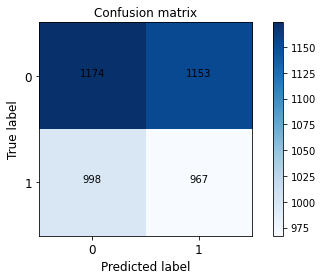

In [ ]:
cnf_matrix = confusion_matrix(y_test, predictions)
custom_plot_confusion_matrix(cnf_matrix, [0,1])

#### ii) Constant 0

In [ ]:
dc_constant_0 = DummyClassifier(strategy="constant", constant=0)
start_time = time.time()
dc_constant_0.fit(X_train, y_train)
fit_times['Constant 0'] = time.time() - start_time
start_time = time.time()
predictions = dc_constant_0.predict(X_test)
pred_times['Constant 0'] = time.time() - start_time
accuracies_opt['Constant 0'] = dc_constant_0.score(X_test,y_test)
f1_micros_opt['Constant 0'] = precision_recall_fscore_support(y_test, predictions, average='micro')[2]
f1_macros_opt['Constant 0'] = precision_recall_fscore_support(y_test, predictions, average='macro')[2]
print("F1-micro average score is: \033[1m{} %\033[0m".format(f1_micros_opt['Constant 0']*100))
print("F1-macro average score is: \033[1m{} %\033[0m".format(f1_macros_opt['Constant 0']*100))

F1-micro average score is: 54.21714818266542 %
F1-macro average score is: 35.156368031424684 %


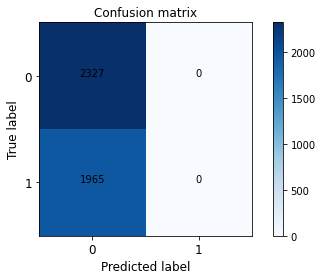

In [ ]:
cnf_matrix = confusion_matrix(y_test, predictions)
custom_plot_confusion_matrix(cnf_matrix, [0,1])

#### iii) Constant 1

In [ ]:
dc_constant_1 = DummyClassifier(strategy="constant", constant=1)
start_time = time.time()
dc_constant_1.fit(X_train, y_train)
fit_times['Constant 1'] = time.time() - start_time
start_time = time.time()
predictions = dc_constant_1.predict(X_test)
pred_times['Constant 1'] = time.time() - start_time
accuracies_opt['Constant 1'] = dc_constant_1.score(X_test,y_test)
f1_micros_opt['Constant 1'] = precision_recall_fscore_support(y_test, predictions, average='micro')[2]
f1_macros_opt['Constant 1'] = precision_recall_fscore_support(y_test, predictions, average='macro')[2]
print("F1-micro average score is: \033[1m{} %\033[0m".format(f1_micros_opt['Constant 1']*100))
print("F1-macro average score is: \033[1m{} %\033[0m".format(f1_macros_opt['Constant 1']*100))

F1-micro average score is: 45.782851817334574 %
F1-macro average score is: 31.40482659421448 %


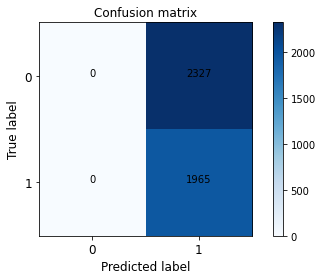

In [ ]:
cnf_matrix = confusion_matrix(y_test, predictions)
custom_plot_confusion_matrix(cnf_matrix, [0,1])

#### iv) Most frequent

In [ ]:
dc_most_frequent = DummyClassifier(strategy="most_frequent")
start_time = time.time()
dc_most_frequent.fit(X_train, y_train)
fit_times['Most frequent label'] = time.time() - start_time
start_time = time.time()
predictions = dc_most_frequent.predict(X_test)
pred_times['Most frequent label'] = time.time() - start_time
accuracies_opt['Most frequent label'] = dc_most_frequent.score(X_test,y_test)
f1_micros_opt['Most frequent label'] = precision_recall_fscore_support(y_test, predictions, average='micro')[2]
f1_macros_opt['Most frequent label'] = precision_recall_fscore_support(y_test, predictions, average='macro')[2]
print("F1-micro average score is: \033[1m{} %\033[0m".format(f1_micros_opt['Most frequent label']*100))
print("F1-macro average score is: \033[1m{} %\033[0m".format(f1_macros_opt['Most frequent label']*100))

F1-micro average score is: 54.21714818266542 %
F1-macro average score is: 35.156368031424684 %


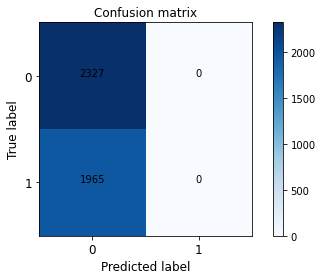

In [ ]:
cnf_matrix = confusion_matrix(y_test, predictions)
custom_plot_confusion_matrix(cnf_matrix, [0,1])

#### v) Stratified

In [ ]:
dc_stratified = DummyClassifier(strategy="stratified")
start_time = time.time()
dc_stratified.fit(X_train, y_train)
fit_times['Stratified'] = time.time() - start_time
start_time = time.time()
predictions = dc_stratified.predict(X_test)
pred_times['Stratified'] = time.time() - start_time
accuracies_opt['Stratified'] = dc_stratified.score(X_test,y_test)
f1_micros_opt['Stratified'] = precision_recall_fscore_support(y_test, predictions, average='micro')[2]
f1_macros_opt['Stratified'] = precision_recall_fscore_support(y_test, predictions, average='macro')[2]
print("F1-micro average score is: \033[1m{} %\033[0m".format(f1_micros_opt['Stratified']*100))
print("F1-macro average score is: \033[1m{} %\033[0m".format(f1_macros_opt['Stratified']*100))

F1-micro average score is: 51.374650512581546 %
F1-macro average score is: 50.98021735738647 %


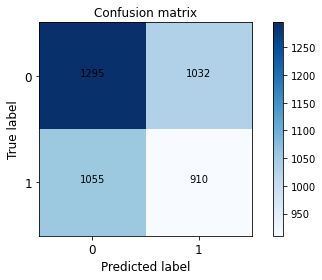

In [ ]:
cnf_matrix = confusion_matrix(y_test, predictions)
custom_plot_confusion_matrix(cnf_matrix, [0,1])

### 2) **Gaussian Naive Bayes Classifier**

In [ ]:
predictions, accuracy = evaluate_optimal_clf("GaussianNB",best_gnb_f1_micro_pipelines, best_gnb_f1_micro_parameters)
accuracies_opt['GaussianNB'] = accuracy
f1_micros_opt['GaussianNB'] = precision_recall_fscore_support(y_test, predictions, average='micro')[2]
f1_macros_opt['GaussianNB'] = precision_recall_fscore_support(y_test, predictions, average='macro')[2]
print("F1-micro average score is: \033[1m{} %\033[0m".format(f1_micros_opt['GaussianNB']*100))
print("F1-macro average score is: \033[1m{} %\033[0m".format(f1_macros_opt['GaussianNB']*100))

F1-micro average score is: 68.70922646784716 %
F1-macro average score is: 67.31974569281766 %


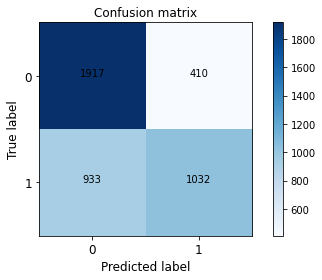

In [ ]:
cnf_matrix = confusion_matrix(y_test, predictions)
custom_plot_confusion_matrix(cnf_matrix, [0,1])

In [ ]:
 print(classification_report(y_test, predictions, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.67      0.82      0.74      2327
           1       0.72      0.53      0.61      1965

    accuracy                           0.69      4292
   macro avg       0.69      0.67      0.67      4292
weighted avg       0.69      0.69      0.68      4292





### 3) **kNN Classifier**

In [ ]:
predictions, accuracy = evaluate_optimal_clf("KNeighborsClassifier",best_knn_f1_micro_pipelines, best_knn_f1_micro_parameters)
accuracies_opt['Knn'] = accuracy
f1_micros_opt['Knn'] = precision_recall_fscore_support(y_test, predictions, average='micro')[2]
f1_macros_opt['Knn'] = precision_recall_fscore_support(y_test, predictions, average='macro')[2]
print("F1-micro average score is: \033[1m{} %\033[0m".format(f1_micros_opt['Knn']*100))
print("F1-macro average score is: \033[1m{} %\033[0m".format(f1_macros_opt['Knn']*100))

F1-micro average score is: 97.2972972972973 %
F1-macro average score is: 97.27878544473344 %


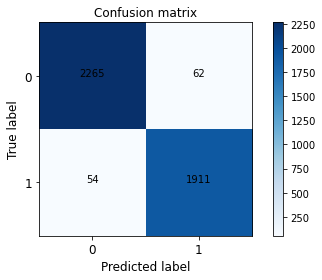

In [ ]:
cnf_matrix = confusion_matrix(y_test, predictions)
custom_plot_confusion_matrix(cnf_matrix, [0,1])

In [ ]:
 print(classification_report(y_test, predictions, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      2327
           1       0.97      0.97      0.97      1965

    accuracy                           0.97      4292
   macro avg       0.97      0.97      0.97      4292
weighted avg       0.97      0.97      0.97      4292



### 4) **MLP**

In [ ]:
predictions, accuracy = evaluate_optimal_clf("MLPClassifier",best_mlp_f1_micro_pipelines, best_mlp_f1_micro_parameters)
accuracies_opt['Mlp'] = accuracy
f1_micros_opt['Mlp'] = precision_recall_fscore_support(y_test, predictions, average='micro')[2]
f1_macros_opt['Mlp'] = precision_recall_fscore_support(y_test, predictions, average='macro')[2]
print("F1-micro average score is: \033[1m{} %\033[0m".format(f1_micros_opt['Mlp']*100))
print("F1-macro average score is: \033[1m{} %\033[0m".format(f1_macros_opt['Mlp']*100))

F1-micro average score is: 96.1323392357875 %
F1-macro average score is: 96.10338100904139 %


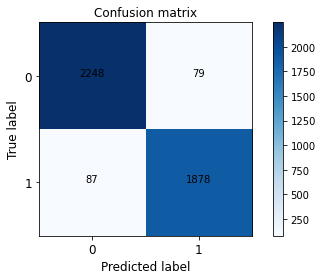

In [ ]:
cnf_matrix = confusion_matrix(y_test, predictions)
custom_plot_confusion_matrix(cnf_matrix, [0,1])

In [ ]:
 print(classification_report(y_test, predictions, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      2327
           1       0.96      0.96      0.96      1965

    accuracy                           0.96      4292
   macro avg       0.96      0.96      0.96      4292
weighted avg       0.96      0.96      0.96      4292



### 5 i) **LinearSVC**

In [ ]:
predictions, accuracy = evaluate_optimal_clf("LinearSVC",best_linearSVC_f1_micro_pipelines, best_linearSVC_f1_micro_parameters)
accuracies_opt['LinearSVC'] = accuracy
f1_micros_opt['LinearSVC'] = precision_recall_fscore_support(y_test, predictions, average='micro')[2]
f1_macros_opt['LinearSVC'] = precision_recall_fscore_support(y_test, predictions, average='macro')[2]
print("F1-micro average score is: \033[1m{} %\033[0m".format(f1_micros_opt['LinearSVC']*100))
print("F1-macro average score is: \033[1m{} %\033[0m".format(f1_macros_opt['LinearSVC']*100))

F1-micro average score is: 63.11742777260019 %
F1-macro average score is: 59.06115805899267 %


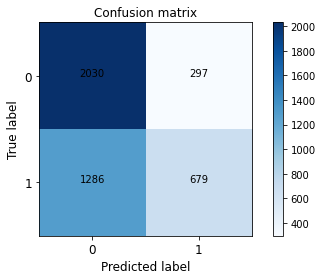

In [ ]:
cnf_matrix = confusion_matrix(y_test, predictions)
custom_plot_confusion_matrix(cnf_matrix, [0,1])

In [ ]:
 print(classification_report(y_test, predictions, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.61      0.87      0.72      2327
           1       0.70      0.35      0.46      1965

    accuracy                           0.63      4292
   macro avg       0.65      0.61      0.59      4292
weighted avg       0.65      0.63      0.60      4292



### 5 ii) **SVC**

In [ ]:
predictions, accuracy = evaluate_optimal_clf("SVC",best_SVC_f1_micro_pipelines, best_SVC_f1_micro_parameters)
accuracies_opt['SVC'] = accuracy
f1_micros_opt['SVC'] = precision_recall_fscore_support(y_test, predictions, average='micro')[2]
f1_macros_opt['SVC'] = precision_recall_fscore_support(y_test, predictions, average='macro')[2]
print("F1-micro average score is: \033[1m{} %\033[0m".format(f1_micros_opt['SVC']*100))
print("F1-macro average score is: \033[1m{} %\033[0m".format(f1_macros_opt['SVC']*100))

F1-micro average score is: 95.75955265610439 %
F1-macro average score is: 95.72883203505015 %


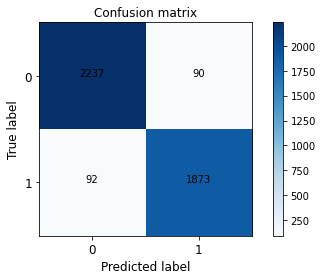

In [ ]:
cnf_matrix = confusion_matrix(y_test, predictions)
custom_plot_confusion_matrix(cnf_matrix, [0,1])

In [ ]:
 print(classification_report(y_test, predictions, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2327
           1       0.95      0.95      0.95      1965

    accuracy                           0.96      4292
   macro avg       0.96      0.96      0.96      4292
weighted avg       0.96      0.96      0.96      4292



### Bar plots σύγκρισης βέλτιστων ταξινομητών

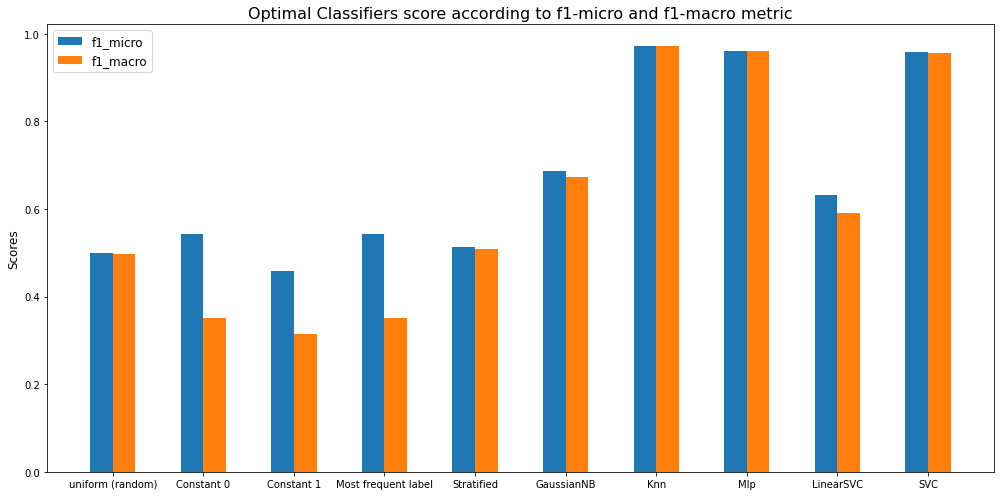

In [ ]:
classifiers = list(f1_micros_opt.keys())
x = np.arange(len(classifiers))
width = 0.25

fig, ax = plt.subplots(figsize=(14,7))
rects1 = ax.bar(x - width/2, list(f1_micros_opt.values()), width, label='f1_micro')
rects2 = ax.bar(x + width/2, list(f1_macros_opt.values()), width, label='f1_macro')

ax.set_ylabel('Scores',fontsize=12)
ax.set_title('Optimal Classifiers score according to f1-micro and f1-macro metric',fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(classifiers,fontsize=10)
ax.legend(loc='upper left',fontsize=12)

fig.tight_layout()
plt.show()

Classifier | F1-micro (%) | F1-macro (%) |
--- | :---: | :---: | 
**Knn** | **97.30** | **97.28** |
**Mlp** | **96.13** | **96.10** |
**SVC** | **95.76** | **95.73** |
GaussianNB | 68.71 | 67.32 |
LinearSVC | 63.12 | 59.06 |
Constant 0 |  54.22 | 35.16 |
Most frequent | 54.22 | 35.16 |
Stratified | 51.37 | 50.98 |
Uniform | 49.88 | 49.77 |
Constant 1 | 45.78 | 31.40 |

Παρατηρούμε ότι το μεγαλύτερο ποσοστό ακρίβειας τόσο για την μετρική f1-micro όσο και για την f1-macro λαμβάνεται με χρήση του ταξινομητή **Knn**. Αυτό μάλιστα επιτυγχάνεται χωρίς κανένα στάδιο προεπεξεργασίας των δεδομένων, γεγονός αξιοθαύμαστο δεδομένης της απλότητας του συγκεκριμένου ταξινομητή. Εξίσου αποδοτικά φαίνεται να δουλεύουν και οι **Mlp**, **SVC** οι οποίοι επιτυγχάνουν ποσοστό ορθής κατηγοριοποίησης πάνω από 95%. Μάλιστα για αυτούς τους δύο classifiers η κανονικοποίηση των δεδομένων έπαιξε καθοριστικό ρόλο στην αύξηση της επίδοσής τους.

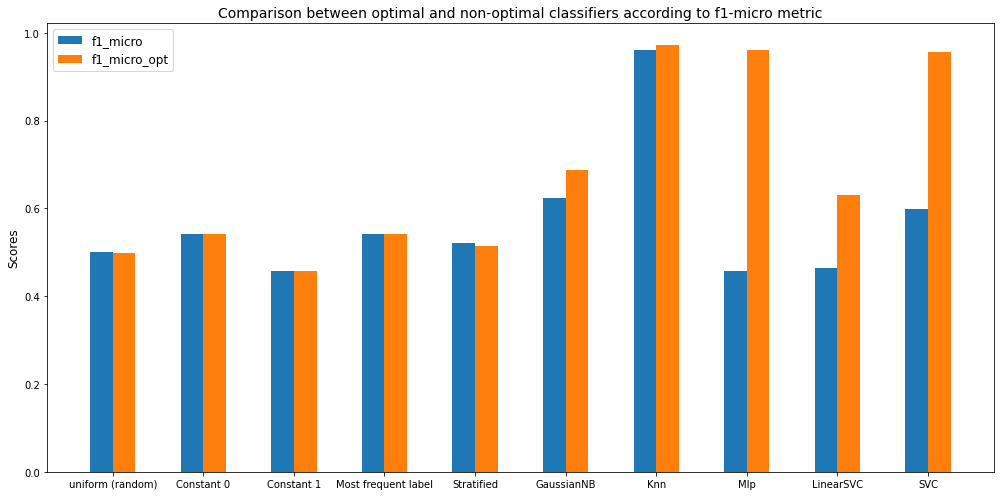

In [ ]:
classifiers = list(f1_micros_opt.keys())
x = np.arange(len(classifiers))
width = 0.25

fig, ax = plt.subplots(figsize=(14,7))
rects1 = ax.bar(x - width/2, list(f1_micros.values()), width, label='f1_micro')
rects2 = ax.bar(x + width/2, list(f1_micros_opt.values()), width, label='f1_micro_opt')

ax.set_ylabel('Scores',fontsize=12)
ax.set_title('Comparison between optimal and non-optimal classifiers according to f1-micro metric',fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(classifiers,fontsize=10)
ax.legend(loc='upper left',fontsize=12)

fig.tight_layout()
plt.show()

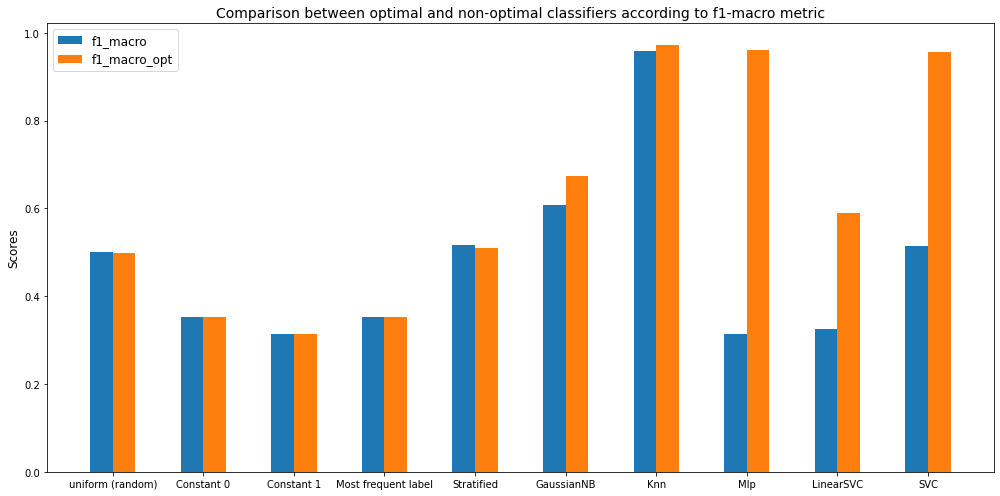

In [ ]:
classifiers = list(f1_micros_opt.keys())
x = np.arange(len(classifiers))
width = 0.25

fig, ax = plt.subplots(figsize=(14,7))
rects1 = ax.bar(x - width/2, list(f1_macros.values()), width, label='f1_macro')
rects2 = ax.bar(x + width/2, list(f1_macros_opt.values()), width, label='f1_macro_opt')

ax.set_ylabel('Scores',fontsize=12)
ax.set_title('Comparison between optimal and non-optimal classifiers according to f1-macro metric',fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(classifiers,fontsize=10)
ax.legend(loc='upper left',fontsize=12)

fig.tight_layout()
plt.show()

### Μεταβολή της επίδοσης των ταξινομητών πριν και μετά τη βελτιστοποίησή τους

In [ ]:
print("\033[1mIncrement of Accuracy between Optimal and Non-Optimal Classifiers:\n")
print("------------------------ accuracy differences ------------------------\n")
accuracy_diff = {x: accuracies_opt[x] - accuracies[x] for x in accuracies_opt if x in accuracies}
sorted_accuracy_diff = [(k, accuracy_diff[k]) for k in sorted(accuracy_diff, key=accuracy_diff.get, reverse=True)]
for k, v in sorted_accuracy_diff:
    print("\033[1m",k,":\033[0m",v*100,"%")
print()

Increment of Accuracy between Optimal and Non-Optimal Classifiers:

------------------------ accuracy differences ------------------------

 Mlp : 50.34948741845293 %
 SVC : 35.787511649580615 %
 LinearSVC : 16.775396085740912 %
 GaussianNB : 6.360671015843433 %
 Knn : 1.3047530288909703 %
 Constant 0 : 0.0 %
 Constant 1 : 0.0 %
 Most frequent label : 0.0 %
 uniform (random) : -0.6756756756756743 %
 Stratified : -1.1183597390493905 %



Classifier | Increment of Accuracy (%)
--- | :---:
**Mlp** | **50.35** 
**SVC** | **35.79**
LinearSVC | 16.78
GaussianNB | 6.36
Knn | 1.30
Constant 0 | 0.00
Constant 1 | 0.00
Most frequent | 0.00
Uniform | -0.68
Stratified | -1.12

Τη σημαντικότερη βελτίωση στην απόδοση κατά την διαδικασία του hyperparameter tuning παρουσιάζουν οι ταξινομητές **MLP** και **SVC**. Αυτό είναι αναμενόμενο, καθώς και για τους δύο εξετάσαμε τον μεγαλύτερο αριθμό υπερπαραμέτρων προς βελτιστοποίηση (6). Με εξαίρεση τους dummy classifiers, τους οποίους και δεν βελτιστοποιούμε (λόγω της αφέλειας του τρόπου λειτουργίας τους), το μικρότερο ποσοστό αύξησης στην ακρίβεια εμφανίζει ο Knn. Αυτό οφείλεται στο γεγονός ότι ο ταξινομητής από μόνος του (χωρίς χρήση μετασχηματιστών) και με τις default τιμές παραμέτρων πετυχαίνει πολύ υψηλή ακρίβεια στο πρόβλημα της κατηγοριοποίησης των δεδομένων. Τέλος, ο Gaussian Naive Bayes Classifier εξακολουθεί να παραμένει σε χαμηλά ποσοστά επίδοσης. Κάτι τέτοιο συμβαίνει λόγω της μη-ρεαλιστικής υπόθεσής του για την ανεξαρτησία των δεδομένων.

### Σύγκριση χρόνων εκτέλεσης βέλτιστων ταξινομητών για το fit και το predict

In [ ]:
print("\033[1mFit and Predict times of Optimal Classifiers in secs:\n")
print("------------------------ fit times ------------------------\n")
sorted_fit_times = [(k, fit_times[k]) for k in sorted(fit_times, key=fit_times.get, reverse=True)]
for k, v in sorted_fit_times:
  print("\033[1m",k,":\033[0m",v)
print()
print("\033[1m---------------------- predict times ----------------------\n")
sorted_pred_times = [(k, pred_times[k]) for k in sorted(pred_times, key=pred_times.get, reverse=True)]
for m, n in sorted_pred_times:
  print("\033[1m",m,":\033[0m",n)

Fit and Predict times of Optimal Classifiers in secs:

------------------------ fit times ------------------------

 MLPClassifier : 59.0370888710022
 SVC : 4.555589914321899
 LinearSVC : 0.5444235801696777
 KNeighborsClassifier : 0.01886725425720215
 GaussianNB : 0.009924650192260742
 Constant 0 : 0.002955198287963867
 uniform (random) : 0.0022559165954589844
 Constant 1 : 0.001142263412475586
 Most frequent label : 0.0011055469512939453
 Stratified : 0.0006153583526611328

---------------------- predict times ----------------------

 KNeighborsClassifier : 0.33814001083374023
 SVC : 0.2805747985839844
 MLPClassifier : 0.016350269317626953
 GaussianNB : 0.0019249916076660156
 LinearSVC : 0.0005505084991455078
 uniform (random) : 0.0005397796630859375
 Stratified : 0.0005102157592773438
 Most frequent label : 0.0003619194030761719
 Constant 0 : 0.00026988983154296875
 Constant 1 : 0.000179290771484375


Classifier | Fit times (secs) | Predicts times (secs)
--- | :---: | :---:
**Mlp** | **59.037** | 0.0164
SVC | 4.556 | 0.2806
LinearSVC | 0.544 | 0.0006
**Knn** | 0.019 | **0.3381**
GaussianNB | 0.010 | 0.0019
Constant 0 | 0.003 | 0.0002
Uniform | 0.002 | 0.0005
Constant 1 | 0.001 | 0.0001
Most frequent | 0.001 | 0.0003
Stratified | 0.001 | 0.0005

Παρατηρούμε ότι οι χρόνοι εκπαίδευσης (fit times) κάθε ταξινομητή, με εξαίρεση τον Knn, είναι μεγαλύτεροι από τους αντίστοιχους χρόνους πρόβλεψης (predict times). Αυτό είναι λογικό, καθώς εφόσον το μοντέλο εκπαιδευτεί πάνω στο μεγαλύτερο μέρος του dataset (train dataset - 70%), η φάση της εκτίμησης διαρκεί πολύ λίγο χρόνο. Τα παραπάνω δεν ισχύουν για τον Knn ο οποίος δεν πραγματοποιεί κάποια διαδικασία εκπαίδευσης αλλά αποθηκεύει απλώς όλα τα train δεδομένα στην μνήμη. Για κάθε νέο δείγμα του test set που πρόκειται να κατηγοριοποιηθεί υπολογίζει την απόστασή του από όλα τα σημεία του train, με αποτέλεσμα η διαδικασία αυτή (predict) να είναι αρκετά χρονοβόρα. Τέλος, τον μεγαλύτερο χρόνο εκπαίδευσης εμφανίζει ο ταξινομητής MLP (59 secs). Αυτό οφείλεται στις μεγάλες βέλτιστες τιμές των υπερπαραμέτρων **hidden_layer_sizes** ((400,)) και **max_iter** (450) οι οποίες σχετίζονται άμεσα με την υπολογιστική πολυπλοκότητα του αλγορίθμου.

## Αξιολόγηση βέλτιστων ταξινομητών που προέκυψαν με βάση την μετρική απόδοσης f1 macro

### 1) **Dummy Classifier**

Επειδή δεν πραγματοποιούμε βελτιστοποίηση στους Dummy Classifiers τα αποτελέσματα είναι αντίστοιχα με αυτά της ενότητας "Αξιολόγηση βέλτιστων ταξινομητών που προέκυψαν με βάση την μετρική απόδοσης f1 micro".

### 2) **Gaussian Naive Bayes Classifier**

In [ ]:
predictions, accuracy = evaluate_optimal_clf("GaussianNB",best_gnb_f1_macro_pipelines, best_gnb_f1_macro_parameters)
accuracies_opt['GaussianNB'] = accuracy
f1_micros_opt['GaussianNB'] = precision_recall_fscore_support(y_test, predictions, average='micro')[2]
f1_macros_opt['GaussianNB'] = precision_recall_fscore_support(y_test, predictions, average='macro')[2]
print("F1-micro average score is: \033[1m{} %\033[0m".format(f1_micros_opt['GaussianNB']*100))
print("F1-macro average score is: \033[1m{} %\033[0m".format(f1_macros_opt['GaussianNB']*100))

F1-micro average score is: 68.70922646784716 %
F1-macro average score is: 67.31974569281766 %


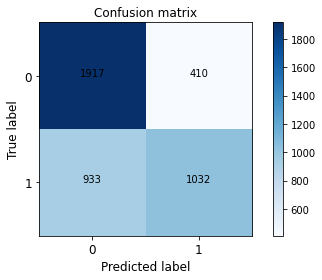

In [ ]:
cnf_matrix = confusion_matrix(y_test, predictions)
custom_plot_confusion_matrix(cnf_matrix, [0,1])

In [ ]:
 print(classification_report(y_test, predictions, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.67      0.82      0.74      2327
           1       0.72      0.53      0.61      1965

    accuracy                           0.69      4292
   macro avg       0.69      0.67      0.67      4292
weighted avg       0.69      0.69      0.68      4292



### 3) **kNN Classifier**

In [ ]:
predictions, accuracy = evaluate_optimal_clf("KNeighborsClassifier",best_knn_f1_macro_pipelines, best_knn_f1_macro_parameters)
accuracies_opt['Knn'] = accuracy
f1_micros_opt['Knn'] = precision_recall_fscore_support(y_test, predictions, average='micro')[2]
f1_macros_opt['Knn'] = precision_recall_fscore_support(y_test, predictions, average='macro')[2]
print("F1-micro average score is: \033[1m{} %\033[0m".format(f1_micros_opt['Knn']*100))
print("F1-macro average score is: \033[1m{} %\033[0m".format(f1_macros_opt['Knn']*100))

F1-micro average score is: 97.2972972972973 %
F1-macro average score is: 97.27878544473344 %


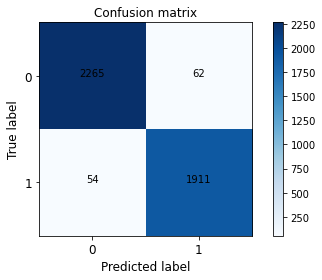

In [ ]:
cnf_matrix = confusion_matrix(y_test, predictions)
custom_plot_confusion_matrix(cnf_matrix, [0,1])

In [ ]:
 print(classification_report(y_test, predictions, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      2327
           1       0.97      0.97      0.97      1965

    accuracy                           0.97      4292
   macro avg       0.97      0.97      0.97      4292
weighted avg       0.97      0.97      0.97      4292



### 4) **MLP**

In [ ]:
predictions, accuracy = evaluate_optimal_clf("MLPClassifier",best_mlp_f1_macro_pipelines, best_mlp_f1_macro_parameters)
accuracies_opt['Mlp'] = accuracy
f1_micros_opt['Mlp'] = precision_recall_fscore_support(y_test, predictions, average='micro')[2]
f1_macros_opt['Mlp'] = precision_recall_fscore_support(y_test, predictions, average='macro')[2]
print("F1-micro average score is: \033[1m{} %\033[0m".format(f1_micros_opt['Mlp']*100))
print("F1-macro average score is: \033[1m{} %\033[0m".format(f1_macros_opt['Mlp']*100))

F1-micro average score is: 96.2022367194781 %
F1-macro average score is: 96.1808740946106 %


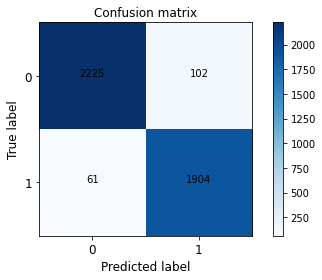

In [ ]:
cnf_matrix = confusion_matrix(y_test, predictions)
custom_plot_confusion_matrix(cnf_matrix, [0,1])

In [ ]:
 print(classification_report(y_test, predictions, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      2327
           1       0.95      0.97      0.96      1965

    accuracy                           0.96      4292
   macro avg       0.96      0.96      0.96      4292
weighted avg       0.96      0.96      0.96      4292



### 5 i) **LinearSVC**

In [ ]:
predictions, accuracy = evaluate_optimal_clf("LinearSVC",best_linearSVC_f1_macro_pipelines, best_linearSVC_f1_macro_parameters)
accuracies_opt['LinearSVC'] = accuracy
f1_micros_opt['LinearSVC'] = precision_recall_fscore_support(y_test, predictions, average='micro')[2]
f1_macros_opt['LinearSVC'] = precision_recall_fscore_support(y_test, predictions, average='macro')[2]
print("F1-micro average score is: \033[1m{} %\033[0m".format(f1_micros_opt['LinearSVC']*100))
print("F1-macro average score is: \033[1m{} %\033[0m".format(f1_macros_opt['LinearSVC']*100))

F1-micro average score is: 64.63187325256291 %
F1-macro average score is: 61.91678861778163 %


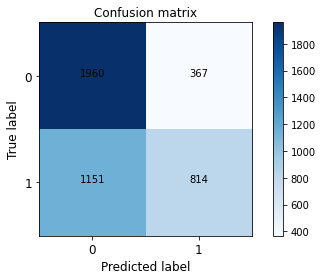

In [ ]:
cnf_matrix = confusion_matrix(y_test, predictions)
custom_plot_confusion_matrix(cnf_matrix, [0,1])

In [ ]:
 print(classification_report(y_test, predictions, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.63      0.84      0.72      2327
           1       0.69      0.41      0.52      1965

    accuracy                           0.65      4292
   macro avg       0.66      0.63      0.62      4292
weighted avg       0.66      0.65      0.63      4292



### 5 ii) **SVC**

In [ ]:
predictions, accuracy = evaluate_optimal_clf("SVC",best_SVC_f1_macro_pipelines, best_SVC_f1_macro_parameters)
accuracies_opt['SVC'] = accuracy
f1_micros_opt['SVC'] = precision_recall_fscore_support(y_test, predictions, average='micro')[2]
f1_macros_opt['SVC'] = precision_recall_fscore_support(y_test, predictions, average='macro')[2]
print("F1-micro average score is: \033[1m{} %\033[0m".format(f1_micros_opt['SVC']*100))
print("F1-macro average score is: \033[1m{} %\033[0m".format(f1_macros_opt['SVC']*100))

F1-micro average score is: 95.75955265610439 %
F1-macro average score is: 95.72883203505015 %


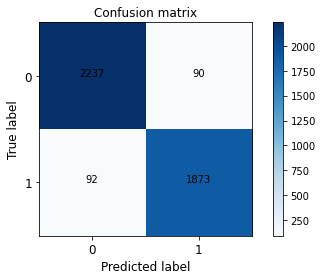

In [ ]:
cnf_matrix = confusion_matrix(y_test, predictions)
custom_plot_confusion_matrix(cnf_matrix, [0,1])

In [ ]:
 print(classification_report(y_test, predictions, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2327
           1       0.95      0.95      0.95      1965

    accuracy                           0.96      4292
   macro avg       0.96      0.96      0.96      4292
weighted avg       0.96      0.96      0.96      4292



### Bar plots σύγκρισης βέλτιστων ταξινομητών

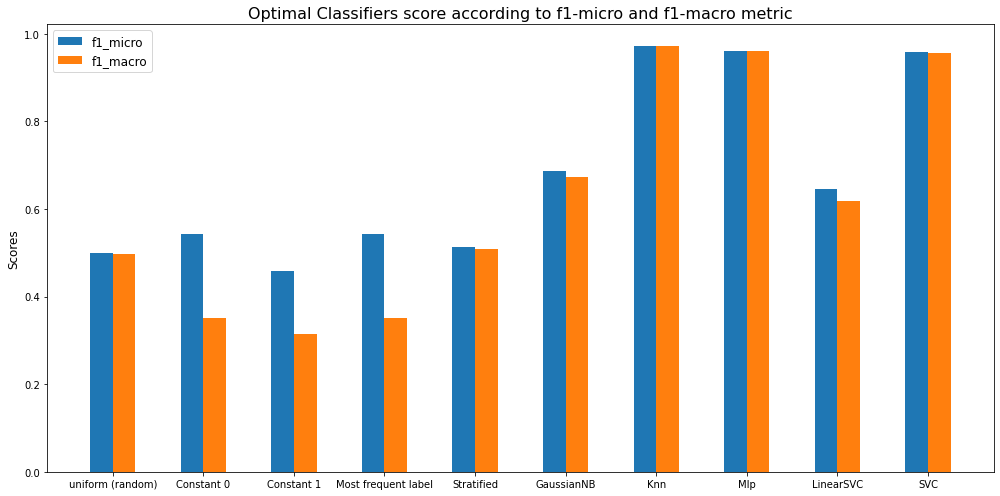

In [ ]:
classifiers = list(f1_micros_opt.keys())
x = np.arange(len(classifiers))
width = 0.25

fig, ax = plt.subplots(figsize=(14,7))
rects1 = ax.bar(x - width/2, list(f1_micros_opt.values()), width, label='f1_micro')
rects2 = ax.bar(x + width/2, list(f1_macros_opt.values()), width, label='f1_macro')

ax.set_ylabel('Scores',fontsize=12)
ax.set_title('Optimal Classifiers score according to f1-micro and f1-macro metric',fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(classifiers,fontsize=10)
ax.legend(loc='upper left',fontsize=12)

fig.tight_layout()
plt.show()

Classifier | F1-micro (%) | F1-macro (%)
--- | :---: | :--:
**Knn** | **97.30** | **97.28**
**Mlp** | **96.20** | **96.18**
**SVC** | **95.76** | **95.73**
GaussianNB | 68.71 | 67.32
LinearSVC | 64.63 | 61.92
Constant 0 |  54.22 | 35.16
Most frequent | 54.22 | 35.16
Stratified | 51.37 | 50.98
Uniform | 49.88 | 49.77
Constant 1 | 45.79 | 31.40

Τα συμπεράσματα που προκύπτουν είναι ανάλογα με αυτά της ενότητας "Αξιολόγηση βέλτιστων ταξινομητών που προέκυψαν με βάση την μετρική απόδοσης f1 micro".

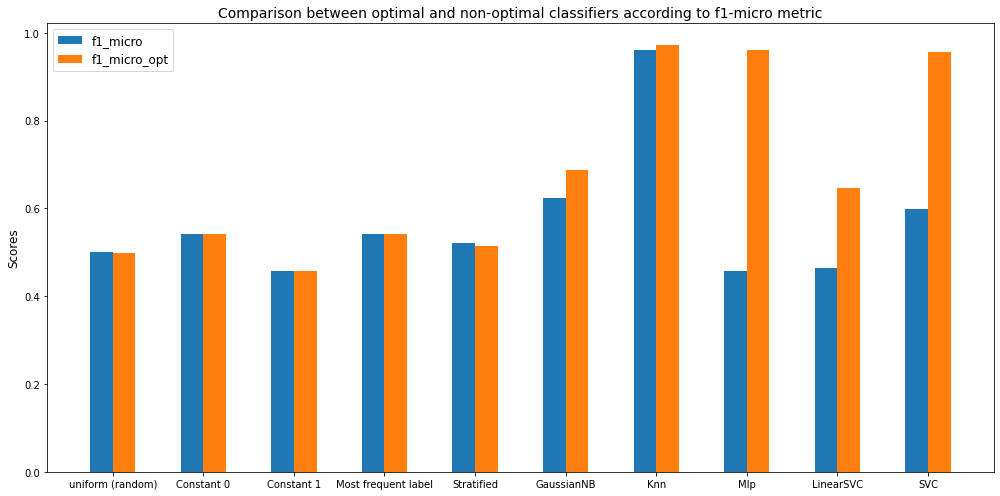

In [ ]:
classifiers = list(f1_micros_opt.keys())
x = np.arange(len(classifiers))
width = 0.25

fig, ax = plt.subplots(figsize=(14,7))
rects1 = ax.bar(x - width/2, list(f1_micros.values()), width, label='f1_micro')
rects2 = ax.bar(x + width/2, list(f1_micros_opt.values()), width, label='f1_micro_opt')

ax.set_ylabel('Scores',fontsize=12)
ax.set_title('Comparison between optimal and non-optimal classifiers according to f1-micro metric',fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(classifiers,fontsize=10)
ax.legend(loc='upper left',fontsize=12)

fig.tight_layout()
plt.show()

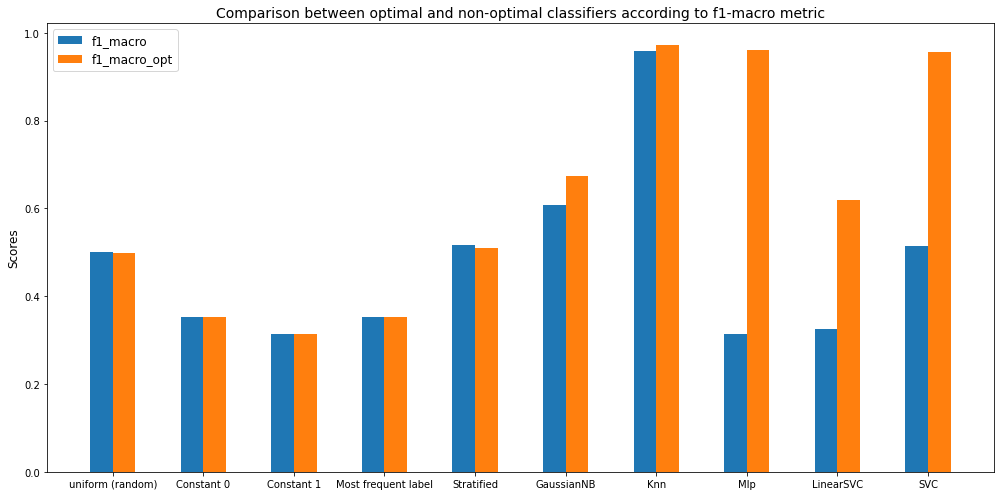

In [ ]:
classifiers = list(f1_micros_opt.keys())
x = np.arange(len(classifiers))
width = 0.25

fig, ax = plt.subplots(figsize=(14,7))
rects1 = ax.bar(x - width/2, list(f1_macros.values()), width, label='f1_macro')
rects2 = ax.bar(x + width/2, list(f1_macros_opt.values()), width, label='f1_macro_opt')

ax.set_ylabel('Scores',fontsize=12)
ax.set_title('Comparison between optimal and non-optimal classifiers according to f1-macro metric',fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(classifiers,fontsize=10)
ax.legend(loc='upper left',fontsize=12)

fig.tight_layout()
plt.show()

### Μεταβολή της επίδοσης των ταξινομητών πριν και μετά τη βελτιστοποίησή τους

In [ ]:
print("\033[1mIncrement of Accuracy between Optimal and Non-Optimal Classifiers:\n")
print("------------------------ accuracy differences ------------------------\n")
accuracy_diff = {x: accuracies_opt[x] - accuracies[x] for x in accuracies_opt if x in accuracies}
sorted_accuracy_diff = [(k, accuracy_diff[k]) for k in sorted(accuracy_diff, key=accuracy_diff.get, reverse=True)]
for k, v in sorted_accuracy_diff:
    print("\033[1m",k,":\033[0m",v*100,"%")
print()

Increment of Accuracy between Optimal and Non-Optimal Classifiers:

------------------------ accuracy differences ------------------------

 Mlp : 50.41938490214353 %
 SVC : 35.787511649580615 %
 LinearSVC : 18.289841565703636 %
 GaussianNB : 6.360671015843433 %
 Knn : 1.3047530288909703 %
 Constant 0 : 0.0 %
 Constant 1 : 0.0 %
 Most frequent label : 0.0 %
 uniform (random) : -0.6756756756756743 %
 Stratified : -1.1183597390493905 %



Classifier | Increment of Accuracy (%)
--- | :---:
**Mlp** | **50.42** 
**SVC** | **35.79**
LinearSVC | 18.29
GaussianNB | 6.36
Knn | 1.30
Constant 0 | 0.00
Constant 1 | 0.00
Most frequent | 0.00
Uniform | -0.68
Stratified | -1.12

Τα συμπεράσματα που προκύπτουν είναι ανάλογα με αυτά της ενότητας "Αξιολόγηση βέλτιστων ταξινομητών που προέκυψαν με βάση την μετρική απόδοσης f1 micro".

### Σύγκριση χρόνων εκτέλεσης βέλτιστων ταξινομητών για το fit και το predict

In [ ]:
print("\033[1mFit and Predict times of Optimal Classifiers in secs:\n")
print("------------------------ fit times ------------------------\n")
sorted_fit_times = [(k, fit_times[k]) for k in sorted(fit_times, key=fit_times.get, reverse=True)]
for k, v in sorted_fit_times:
  print("\033[1m",k,":\033[0m",v)
print()
print("\033[1m---------------------- predict times ----------------------\n")
sorted_pred_times = [(k, pred_times[k]) for k in sorted(pred_times, key=pred_times.get, reverse=True)]
for m, n in sorted_pred_times:
  print("\033[1m",m,":\033[0m",n)

Fit and Predict times of Optimal Classifiers in secs:

------------------------ fit times ------------------------

 MLPClassifier : 57.31219172477722
 SVC : 4.5012617111206055
 LinearSVC : 0.5104610919952393
 KNeighborsClassifier : 0.02392864227294922
 GaussianNB : 0.008550167083740234
 Constant 0 : 0.002955198287963867
 uniform (random) : 0.0022559165954589844
 Constant 1 : 0.001142263412475586
 Most frequent label : 0.0011055469512939453
 Stratified : 0.0006153583526611328

---------------------- predict times ----------------------

 KNeighborsClassifier : 0.3214859962463379
 SVC : 0.2840697765350342
 MLPClassifier : 0.013798713684082031
 GaussianNB : 0.0018644332885742188
 uniform (random) : 0.0005397796630859375
 Stratified : 0.0005102157592773438
 LinearSVC : 0.00046062469482421875
 Most frequent label : 0.0003619194030761719
 Constant 0 : 0.00026988983154296875
 Constant 1 : 0.000179290771484375


Classifier | Fit times (secs) | Predict times (secs)
--- | :---: | :--:
**Mlp** | **57.312** | 0.0138
SVC | 4.501 | 0.2841
LinearSVC | 0.510 | 0.0005
**Knn** | 0.024 | **0.3215**
GaussianNB | 0.009 | 0.0019 
Constant 0 | 0.003 | 0.0003
Uniform | 0.002 | 0.0005
Constant 1 | 0.001 | 0.0002
Most frequent | 0.001 | 0.0004
Stratified | 0.001 | 0.0005

Τα συμπεράσματα που προκύπτουν είναι ανάλογα με αυτά της ενότητας "Αξιολόγηση βέλτιστων ταξινομητών που προέκυψαν με βάση την μετρική απόδοσης f1 micro".

**Σημείωση**: Επειδή δεν προσδιορίσαμε κάποιο **random_state** κατά την κλήση της συνάρτησης **train_test_split** τα αποτελέσματα που παρουσιάζονται στο τρέχον notebook αφορούν έναν **τυχαίο διαμοιρασμό του αρχικού dataset** και ενδέχεται να διαφέρουν από εκτέλεση σε εκτέλεση.